# Inicialización


In [108]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from itertools import cycle
from pathlib import Path
import joblib
import htm
import stumpy
from matplotlib.patches import Rectangle

# Selección

### Carga y descripción de datos

In [109]:
df_NAVARRA_16_FP = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\Pere y Angel.csv', header=2, skiprows=[4])
df_NAVARRA_16_Q_1 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\Pere (Stint 1).csv', header=2, skiprows=[4])
df_NAVARRA_16_Q_2 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\Angel (Stint 2).csv', header=2, skiprows=[4])
df_VALENCIA25_68_AM_1= pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\AM3 Henrique y Lucas.csv', header=2, skiprows=[4])
df_VALENCIA25_68_PM_1 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\PM3 Henrique y Lucas.csv', header=2, skiprows=[4])
df_VALENCIA25_68_AM_2 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\AM4 Lucas y Henrique.csv', header=2, skiprows=[4])
df_VALENCIA25_68_PM_2 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\PM4 Lucas y Henrique.csv', header=2, skiprows=[4])

C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\1798453139.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,53,54,55,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,89,90,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,111,112,115,116,117,118,119,120,121,122,123,124,125,126,129,130,131,135,136,137,138,139,140,143,144,145,146,147,148,149,150,151,152,154,155,156,157,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NAVARRA_16_FP = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\Pere y Angel.csv', header=2, skiprows=[4])
C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\1798453139.py:2: DtypeWarning: Columns (2,3,4,5,6,7,9,10,11,12,13,14,

In [110]:
#Estructura de cada dataset
df_NAVARRA_16_FP.head()

Time   LAP  Clim_On  CockpitLightSw  DVOLANT_R12  DashSw_1_R10  \
0  0.02  0.02        0               0            0           192   
1  0.04  0.04        0               0            0           192   
2  0.06  0.06        0               0            0           192   
3  0.08  0.08        0               0            0           192   
4  0.10  0.10        0               0            0           192   

   DashSw_2_R11  Fan_On  FlashSw_R25  FuelPump  ...  vvt2InDuty  vvt2InErr  \
0           -32       0            0         0  ...         0.0        0.0   
1           -32       0            0         0  ...         0.0        0.0   
2           -32       0            0         0  ...         0.0        0.0   
3           -32       0            0         0  ...         0.0        0.0   
4           -32       0            0         0  ...         0.0        0.0   

   vvt2InI  vvt2InP  vvt2InRaw  vvtExBase  vvtExTarg  vvtInBase  vvtInTarg  \
0      0.0      0.0      422.5        0.0        0.0        0.0        0.0   
1      0.0      0.0      422.5        0.0        0.0        0.0        0.0   
2      0.0      0.0       63.5        0.0        0.0        0.0        0.0   
3      0.0      0.0       63.5        0.0        0.0        0.0        0.0   
4      0.0      0.0       63.5        0.0        0.0        0.0        0.0   

    vvtState  
0   DISABLED  
1   DISABLED  
2   DISABLED  
3   DISABLED  
4   DISABLED  

[5 rows x 199 columns]

In [111]:
df_NAVARRA_16_FP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199774 entries, 0 to 199773
Columns: 199 entries, Time to  vvtState
dtypes: float64(3), int64(1), object(195)
memory usage: 303.3+ MB


Se cargan los dos datasets correspondientes a las sesiones en las que se produjo la explosión del radiador de aceite de la caja de cambios, que se utilizarán para la evaluación del modelo.

In [112]:
df_NAVARRA_16_R_1 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\F1. Explosión radiador aceite caja cambios\Salida a parrilla.csv', header=2, skiprows=[4])
df_NAVARRA_16_R_2 = pd.read_csv(r'C:\Users\Bella\05_master VIU\3. TFM\codigo\F1. Explosión radiador aceite caja cambios\Salida tras cambio radiador.csv', header=2, skiprows=[4])

### Variables del dataset

Cada csv tiene 199 variables. Algunas de ellas no se encuentran en la tabla de canales proporcionada por Ligier y algunas de las que están en esa tabla, no aparecen en el csv. No obstante, gracias a notación estandar, se pueden identificar cada una de ellas.


1. N **Time**  Tiempo total
2. N **LAP**  Tiempo/vuelta  
3. **Clim_On**. quitar
4. **CockpitLightSw**. quitar
5. **DVOLANT_R12**. quitar
6. **DashSw_1_R10**. quitar
7. **DashSw_2_R11**. quitar
8. **Fan_On**. quitar
9. **FlashSw_R25**. quitar
10. **FuelPump**. Interruptor de la bomba de combustible (cálculo matemático)  quitar?
11. **IgnSw**. Interruptor de encendido (cálculo matemático)  quitar?
12. **LeftLightSw**. quitar  
13. **LightSw**. quitar
14. **PBX13_Alt_R07**. Canal alternador en PowerBox  
15. N **PBX31_InjEv_R01**. Control inyección en PowerBox
16. N **PBX32_LamCam_R02**.  Control cámara lambda o control de levas en PowerBox
17. **PBX41_FP_R16**. PowerBox canal bomba de combustible  
18. **PBX43_Start_R18**. PowerBox canal arranque  
19. **PBX44_Coils_R19**. PowerBox canal bobinas  
20. **PBX45_GSP_R20**. PowerBox canal presión del cambio de marchas  
21. **Page_SW_R09**. quitar
22. **RainLightSw**. quitar
23. **RightLightSw**. quitar
24. N **Spare_Re_04_U03**. Canal libre o de reserva   ESTÁ EN 016. Quitar esta variable, y las correspondientes en los coches 068 (swa_U03) y 078 (T_Env_Comp_U03)
25. **WiperSw_R13**. quitar
26. **act1**. Temperatura del aire del cambio del motor
27. **bap**. Presión barométrica  
28. **bpf**. Presión de freno del eje delantero  
29. **bpr**. Presión de freno del eje trasero  
30. **calSelect**. quitar?
31. N **calSwitch**. quitar  
32. N **camRaw**. Señal en bruto del sensor de árbol de levas  
33. N **ccp1**. Presión del embrague  
34. N **ccp1Trip**. Activación de corte por CCP  
35. **cllEnable**. Estado del lazo lambda cerrado (Closed Loop Lambda)    
36. N **cllError1**. Errores del lazo lambda cerrado 1
37. N **cllError2**. Errores del lazo lambda cerrado 2  
38. **cllI1**. Lazo lambda cerrado 1  
39. **cllI2**. Lazo lambda cerrado 2  
40. **cllTarg1**. Objetivo del lazo lambda cerrado 1  
41. N **cllTarg2**. Objetivo del lazo lambda cerrado 1  
42. N **cllTargAddEct1**. Ajuste al objetivo lambda por temperatura  
43. N **cycleCount**. Contador de ciclos de la ECU (reinicios o eventos de encendido)  
44. **cyl01Knock**. Detección de picado en cilindro 1  (arrojan un fallo directo)
45. **cyl02Knock**. Detección de picado en cilindro 2   
46. **cyl03Knock**. Detección de picado en cilindro 3   
47. **cyl04Knock**. Detección de picado en cilindro 4   
48. **cyl05Knock**. Detección de picado en cilindro 5   
49. **cyl06Knock**. Detección de picado en cilindro 6   
50. **cylinderCount**. Recuento del número de cilindros  
51. **ect1**. Temperatura del refrigerante del motor   
52. N **enableSwitch**. Permiso general de encendido/sistema quitar  
53. **engineEnable**. quitar
54. **eop1**. Presión de aceite del motor  
55. N **eop1TripThresh**. Umbral de presión de aceite para activación de evento  
56. **eot**. Temperatura del aceite del motor  
57. **fcyLimitActive**. Estado del limitador en FCY  
58. N **fcySwitch**. Selector de modo de ciclo quitar
59. **flDamper**  Estado del amortiguador delantero izquierdo
60. **flSpeed**. Velocidad de la rueda delantera izquierda  
61. **fp1**. Presión de suministro de la bomba de combustible  
62. **fp1V**. Voltaje de la presión de la bomba de combustible  
63. **frDamper**. Estado del amortiguador delantero derecho  
64. **frSpeed**. Velocidad de la rueda delantera derecha  
65. N **fuelBase1**. Inyección base 1 (sin correcciones)  
66. N **fuelBase2**. Inyección base 2 (sin correcciones)  
67. **fuelConsVol**  
68. N **fuelFinalPri1**. Inyección final con correcciones 1  
69. N **fuelFinalPri2**. Inyección final con correcciones 2  
70. N **fuelFinalPriCyl01**. Inyección final cilindro 1  
71. N **fuelFinalPriCyl02**. Inyección final cilindro 2  
72. N **fuelFinalPriCyl03**. Inyección final cilindro 3  
73. N **fuelFinalPriCyl04**. Inyección final cilindro 4  
74. N **fuelFinalPriCyl05**. Inyección final cilindro 5  
75. N **fuelFinalPriCyl06**. Inyección final cilindro 6  
76. N **fuelMltAct1**. Multiplicador activo de combustible   
77. N **fuelMltCll1**. Corrección por lazo cerrado lambda 1  
78. N **fuelMltCll2**. Corrección por lazo cerrado lambda 2   
79. N **fuelMltCrank1**. Corrección al arrancar (cracking) 1  
80. N **fuelMltCrank2**. Corrección al arrancar (cracking) 2  
81. N **fuelMltEct1**. Corrección por temperatura del refrigerante  
82. N **fuelMltIdle**. Corrección en ralentí  
83. N **fuelMltRelFp1**. Corrección por presión relativa de combustible  
84. N **fuelPreInj**. Preinyección de combustible  
85. **gear**. Marcha actual  
86. **gearDownshiftOutput**. Estado de salida para reducción de marcha  
87. **gearShiftDecision**. Estado de la decisión de cambio de marcha  
88. N **gearShiftState**.  Estado del cambio de marchas
89. **gearUpshiftOutput**. Estado de salida para subida de marcha  
90. **gearV**. Voltaje de la posición de marcha  
91. **gsp**. Presión del sistema de cambio de marchas  
92. **gspControl**  
93. **gspV**. Voltaje de la presión del sistema de cambio de marchas  
94. N **idleError**.  Error respecto al objetivo de ralentí
95. N **idleTarget**. Objetivo de RPM en ralentí
96. N **ignAddAct1**. Avance de encendido adicional activo  
97. N **ignAddBap**.  Corrección de encendido por presión barométrica
98. N **ignAddEct1**. Corrección por temperatura del refrigerante (ECT)  
99. N **ignAddEot**.  Corrección por temperatura del aceite (EOT)
100. N **ignAddIdle**. Ajuste de encendido en ralentí  
101. N **ignAddKnockEnable**. Habilitación de corrección por knock  
102. N **ignBase1**. Mapa base de encendido 1  
103. N **ignBase2**. Mapa base de encendido 2  
104. N **ignCharge**. Tiempo de carga de bobinas   
105. N **ignDuty**. Ciclo de trabajo (duty) de la ignición
106. N **ignFinalPri1**. Encendido final aplicado al Banco 1  
107. N **ignFinalPri2**. Encendido final aplicado al Banco 2
108. N **ignFinalPriCyl01**. Encendido final cilindro 1  
109. N **ignFinalPriCyl02**. Encendido final cilindro 2  
110. N **ignFinalPriCyl03**. Encendido final cilindro 3  
111. N **ignFinalPriCyl04**. Encendido final cilindro 4  
112. N **ignFinalPriCyl05**. Encendido final cilindro 5  
113. N **ignFinalPriCyl06**. Encendido final cilindro 6  
114. N **knockDetectActive**. Si está activa o no la detección de picado  
115. N **knockStatus**. Estado de detección de picado   
116. **lam1**. Relación aire/combustible (lambda 1)  si la mezcla es muy fina (sobre todo esta) o muy gorda es que hay poca gasolina para el aire, entonces lo que pasa dentro de la combustion es que no es correcta y puede fundirse, pq la temperatura de los gases cuando entra la gasolina se enfría y ayuda a evaporarse la gasolina
117. **lam1V**. Voltaje de lambda 1  
118. **lam2**. Relación aire/combustible (lambda 2)  
119. **lam2V**. Voltaje de lambda 2  
120. **lapCount**. Contador de vueltas
121. **lapDistance**. Distancia de la vuelta  quizás quitar
122. **lapTime**. Tiempo de la vuelta   quizás quitar
123. N **lapTimeDelta**. Diferencia respecto al mejor tiempo de vuelta  
124. **lapTimePred**. Tiempo de vuelta predicho  quizas quitar
125. N **lapTimeRef**. Tiempo de vuelta de referencia  
126. **lastLapTime**  
127. **latG**. Fuerza G lateral  
128. **limpMode**. Estado del modo de emergencia (limp mode)  
129. N **limpSwitch**. Interruptor o modo de emergencia quitar  
130. **longG**. Fuerza G longitudinal  
131. **map1**. Presión del colector de admisión (MAP 1)  
132. N **map1A**. Presión absoluta del múltiple de admisión   
133. **paddleSwitch**  
134. **pitLimitActive**. quitar
135. **pitSwitch**. quitar
136. N **pitch**. Ángulo de cabeceo del vehículo  
137. **ppsA**. Sensor principal de posición del pedal de aceleración   
138. **ppsAV**. Voltaje del sensor principal de posición del pedal de aceleración  
139. N **ppsB**. Sensor de validación de la posición del pedal de aceleración
140. N **ppsBV**. Voltaje de posición del pedal   
141. N **relFp1**. Presión relativa de combustible  
142. **revCutActive**  
143. **revLimitActive**  
144. N **revLimitLimp**. Limitador de revoluciones en modo emergencia  
145. **rlDamper**. Estado del amortiguador trasero izquierdo  
146. **rlSpeed**. Velocidad de la rueda trasera izquierda  
147. N **roll**. ángulo balanceo del vehículo   
148. **rpm**  
149. N **rpmAvg**. Revoluciones medias por minuto quitar  
150. **rrDamper**. Estado del amortiguador trasero derecho
151. **rrSpeed**. Velocidad de la rueda trasera derecha  
152. **swa**. Ángulo del volante  no va a predecir un fallo futuro (es algo muy concreto), sobre todo es para telemetría
153. **swaV**. Voltaje del ángulo del volante  
154. N **syncFault**.  Falta de sincronización del motor (entre sensores CKP/CMP)
155. N **syncState**.   Estado de sincronización actual del motor
156. **tps1**. Posición del acelerador  
157. N **tps1A**. Posición del pedal del acelerador (mariposa) Estas dos variables se comparan y si difieren mucho se considera fallo y se activaría el modo emergencia
158. N **tps1B**. Posición del pedal del acelerador (mariposa)
159. N **tps1Fault**.  Falla en el sensor de la mariposa
160. N **tpsClosed**.  Confirmación de mariposa cerrada
161. N **tpsLow**. Estado de señal baja del TPS quitar?  
162. N **trRpm**.  RPM de la rueda
163. N **trqFuelMlt**. Corrección del par vía combustible   
164. N **trqFuelSev**. Corrección del par vía combustible   
165. N **trqIgnMax**.  Límites de par por ignición
166. N **trqIgnRtd**.  Límites de par por ignición  
167. N **trqIgnSev**.  Límites de par por ignición  
168. **tyreTypeTcSw**. Tipo de neumático  
169. **vbat**. Voltaje de batería del motor  
170. **vertG**. Fuerza G vertical  
171. **vvt1Ex**. Distribución variable del escape (banco 1) el motor lleva una leva (pieza mecánica) que abre y cierra las válvulas (compuertas) que tiene el motor (la cámara de combustión) para expulsar los gases o entrar la gasolina. En altas revoluciones se abre más rápido. Mejora eficiencia.
172. **vvt1ExDuty**. Ciclo de trabajo del escape (banco 1)  
173. **vvt1ExErr**. Error en la distribución variable del escape (banco 1)  
174. N **vvt1ExI**. VVT escape banco 1 ideal  
175. N **vvt1ExP**. VVT escape banco 1 posición  
176. N **vvt1ExRaw**. VVT escape banco 1 crudo  
177. **vvt1In**. Distribución variable de admisión (banco 1)  
178. **vvt1InDuty**. Ciclo de trabajo de la admisión (banco 1)  
179. **vvt1InErr**. Error en la distribución variable de admisión (banco 1)  
180. N **vvt1InI**. VVT admisión banco 1 ideal   
181. N **vvt1InP**. VVT admisión banco 1 posición
182. N **vvt1InRaw**. VVT admisión banco 1 crudo  
183. **vvt2Ex**. Distribución variable del escape (banco 2)  
184. **vvt2ExDuty**. Ciclo de trabajo del escape (banco 2)  
185. **vvt2ExErr**. Error en la distribución variable del escape (banco 2)  
186. N **vvt2ExI**. VVT escape banco 2 ideal    
187. N **vvt2ExP**. VVT escape banco 2 posición  
188. N **vvt2ExRaw**. VVT escape banco 2 crudo  
189. **vvt2In**. Distribución variable de admisión (banco 2)  
190. **vvt2InDuty**. Ciclo de trabajo de la admisión (banco 2)  
191. **vvt2InErr**. Error en la distribución variable de admisión (banco 2)  
192. N **vvt2InI**. VVT admisión banco 2 ideal  
193. N **vvt2InP**. VVT admisión banco 2 posición  
194. N **vvt2InRaw**. VVT admisión banco 2 crudo  
195. **vvtExBase**. Valor base del VVT escape  
196. **vvtExTarg**. Valor objetivo del VVT escape  
197. **vvtInBase**. Valor base del VVT admisión  
198. **vvtInTarg**. Valor objetivo del VVT admisión  
199. **vvtState**. Estado general del sistema VVT
Estas últimas se pueden ir comparando y si tienen mucha diferencia es que está ocurriendo algún fallo

### Selección de las variables relevantes

El fallo que se pretende detectar es la explosión del radiador del aceite de la caja de cambios. Por tanto, entre las 199 variables que hay en el csv, se han seleccionado las que, según conocimiento experto, ayudarán a predecir o identificar el fallo. Las variables finales son las que siguen:

1.**Time**. Tiempo  

2.**Lap**. Tiempo/vuelta

28.**bpf**. Presión del líquido de frenos eje trasero

29.**bpr**. Presión del líquido de frenos eje delantero

33.**ccp1**. Presión del embrague

54.**eop1**. Presión del aceite del motor

56.**eot**. Temperatura del aceite del motor

85.**gear**. Número de marcha

86.**gearDownShiftOutput**. Estado de salida para reducción de marcha

87.**gearShiftDecision**. Estado de decisión del cambio de marcha

88.**gearShiftState**. Estado del cambio de marcha

89.**gearUpShiftOutput**. Estado de subida para el cambio de marcha

90.**gearV**. Voltaje de posición de marcha

91.**gsp**. Presión del aceite de cambio de marchas

92.**gspControl**. Control de la presión del sistema de cambio

93.**gspV**. Voltaje de la presión del sistema de cambio

120.**lapcount**. Contador de vueltas

134.**PitLimitActive**. Limitador de pit stop

137.**ppsA**. sensor pedal aceleración

148.**rpm**. Revoluciones por minuto

156.**tps1**. Posición posición aceleración

157.**tps1A**. Posición del pedal del acelerador (mariposa). Estas dos variables se comparan y si difieren mucho se considera fallo y se activaría el modo emergencia

158.**tps1B**. Posición del pedal del acelerador (mariposa)



In [113]:
# limpiamos los nombres de las columnas para que no haya fallo al quedarnos con
# las variables seleccionadas
df_NAVARRA_16_FP.columns = df_NAVARRA_16_FP.columns.str.strip()
df_NAVARRA_16_FP.columns = df_NAVARRA_16_FP.columns.str.replace('\r','').str.replace('\t','')

df_NAVARRA_16_Q_1.columns = df_NAVARRA_16_Q_1.columns.str.strip()
df_NAVARRA_16_Q_1.columns = df_NAVARRA_16_Q_1.columns.str.replace('\r','').str.replace('\t','')

df_NAVARRA_16_Q_2.columns = df_NAVARRA_16_Q_2.columns.str.strip()
df_NAVARRA_16_Q_2.columns = df_NAVARRA_16_Q_2.columns.str.replace('\r','').str.replace('\t','')

df_VALENCIA25_68_AM_1.columns = df_VALENCIA25_68_AM_1.columns.str.strip()
df_VALENCIA25_68_AM_1.columns = df_VALENCIA25_68_AM_1.columns.str.replace('\r','').str.replace('\t','')

df_VALENCIA25_68_AM_2.columns = df_VALENCIA25_68_AM_2.columns.str.strip()
df_VALENCIA25_68_AM_2.columns = df_VALENCIA25_68_AM_2.columns.str.replace('\r','').str.replace('\t','')

df_VALENCIA25_68_PM_1.columns = df_VALENCIA25_68_PM_1.columns.str.strip()
df_VALENCIA25_68_PM_1.columns = df_VALENCIA25_68_PM_1.columns.str.replace('\r','').str.replace('\t','')

df_VALENCIA25_68_PM_2.columns = df_VALENCIA25_68_PM_2.columns.str.strip()
df_VALENCIA25_68_PM_2.columns = df_VALENCIA25_68_PM_2.columns.str.replace('\r','').str.replace('\t','')

df_NAVARRA_16_R_1.columns = df_NAVARRA_16_R_1.columns.str.strip()
df_NAVARRA_16_R_1.columns = df_NAVARRA_16_R_1.columns.str.replace('\r','').str.replace('\t','')

df_NAVARRA_16_R_2.columns = df_NAVARRA_16_R_2.columns.str.strip()
df_NAVARRA_16_R_2.columns = df_NAVARRA_16_R_2.columns.str.replace('\r','').str.replace('\t','')

In [114]:
var = ['Time', 'LAP', 'bpf', 'bpr', 'ccp1', 'eop1', 'eot', 'gear', 'gearDownshiftOutput',
       'gearShiftDecision', 'gearShiftState', 'gearUpshiftOutput', 'gearV', 'gsp', 'gspControl',
       'gspV', 'lapCount', 'pitLimitActive', 'ppsA', 'rpm', 'tps1', 'tps1A', 'tps1B' ]

In [115]:
df_NAVARRA_16_FP = df_NAVARRA_16_FP[var]
df_NAVARRA_16_Q_1 = df_NAVARRA_16_Q_1[var]
df_NAVARRA_16_Q_2 = df_NAVARRA_16_Q_2[var]
df_VALENCIA25_68_AM_1 = df_VALENCIA25_68_AM_1[var]
df_VALENCIA25_68_AM_2 = df_VALENCIA25_68_AM_2[var]
df_VALENCIA25_68_PM_1 = df_VALENCIA25_68_PM_1[var]
df_VALENCIA25_68_PM_2 = df_VALENCIA25_68_PM_2[var]
df_NAVARRA_16_R_1 = df_NAVARRA_16_R_1[var]
df_NAVARRA_16_R_2 = df_NAVARRA_16_R_2[var]

df_NAVARRA_16_FP[50000:50020]

Time    LAP   bpf   bpr ccp1  eop1    eot     gear  \
50000   999.989  65.42  0.41   0.3    0  3444  109.0   SECOND   
50001  1000.009  65.44  0.49   0.3    0  3391  109.0   SECOND   
50002  1000.029  65.46  0.48  0.31    0  3391  109.0   SECOND   
50003  1000.049  65.48  0.43  0.33    0  3249  109.0   SECOND   
50004  1000.069  65.50  0.45  0.29    0  3249  109.0   SECOND   
50005  1000.089  65.52  0.44   0.3    0  3272  109.0   SECOND   
50006  1000.109  65.54  0.38  0.28    0  3272  109.0   SECOND   
50007  1000.129  65.56  0.47  0.25    0  3236  109.0   SECOND   
50008  1000.149  65.58  0.45  0.29    0  3236  109.0   SECOND   
50009  1000.169  65.60  0.55   0.3    0  3208  109.0   SECOND   
50010  1000.189  65.62  0.49  0.34    0  3208  109.0   SECOND   
50011  1000.209  65.64  0.44  0.33    0  3292  103.2   SECOND   
50012  1000.229  65.66  0.51  0.34    0  3292  103.2   SECOND   
50013  1000.249  65.68  0.42  0.36    0  3235  103.2   SECOND   
50014  1000.269  65.70  0.43  0.33    0  3235  103.2   SECOND   
50015  1000.289  65.72  0.54  0.33    0  3241  103.2   SECOND   
50016  1000.309  65.74  0.48   0.3    0  3241  103.2   SECOND   
50017  1000.329  65.76  0.57  0.35    0  3272  103.2   SECOND   
50018  1000.349  65.78  0.49  0.34    0  3272  103.2   SECOND   
50019  1000.369  65.80  0.49  0.35    0  3276  103.2   SECOND   

      gearDownshiftOutput gearShiftDecision  ...   gsp gspControl   gspV  \
50000                 OFF                OK  ...  6962         ON  3.485   
50001                 OFF                OK  ...  6970         ON  3.504   
50002                 OFF                OK  ...  6970         ON  3.504   
50003                 OFF                OK  ...  6970         ON  3.504   
50004                 OFF                OK  ...  6970        OFF  3.504   
50005                 OFF                OK  ...  6970        OFF  3.504   
50006                 OFF                OK  ...  7010        OFF  3.504   
50007                 OFF                OK  ...  7010        OFF  3.504   
50008                 OFF                OK  ...  7010        OFF  3.504   
50009                 OFF                OK  ...  7010        OFF  3.504   
50010                 OFF                OK  ...  7010        OFF  3.504   
50011                 OFF                OK  ...  7026        OFF  3.519   
50012                 OFF                OK  ...  7026        OFF  3.519   
50013                 OFF                OK  ...  7026        OFF  3.519   
50014                 OFF                OK  ...  7026        OFF  3.519   
50015                 OFF                OK  ...  7026        OFF  3.519   
50016                 OFF                OK  ...  7032        OFF  3.519   
50017                 OFF                OK  ...  7032        OFF  3.519   
50018                 OFF                OK  ...  7032        OFF  3.519   
50019                 OFF                OK  ...  7032        OFF  3.519   

      lapCount pitLimitActive  ppsA   rpm  tps1 tps1A tps1B  
50000        4           IDLE  23.1  3990  19.8  19.8  20.1  
50001        4           IDLE  27.5  4016  20.0  20.0  19.9  
50002        4           IDLE  27.5  4063  20.0  20.0  19.9  
50003        4           IDLE  27.5  4110  24.3  24.3  24.3  
50004        4           IDLE  30.1  4112  24.3  24.3  24.3  
50005        4           IDLE  30.1  4090  25.6  25.6  25.8  
50006        4           IDLE  26.0  4057  25.6  25.6  25.8  
50007        4           IDLE  26.0  4018  23.8  23.8  23.9  
50008        4           IDLE  26.0  3988  23.8  23.8  23.9  
50009        4           IDLE  25.9  3995  22.4  22.4  22.5  
50010        4           IDLE  25.9  4047  22.4  22.4  22.5  
50011        4           IDLE  29.9  4115  23.8  23.8  24.1  
50012        4           IDLE  29.9  4151  23.8  23.8  24.1  
50013        4           IDLE  29.9  4137  25.5  25.5  25.9  
50014        4           IDLE  27.1  4102  25.5  25.5  25.9  
50015        4           IDLE  27.1  4063  23.4  23.4  2

# Preprocesamiento

### Unificación temporal

Vamos a concatenar los 7 csv importados en un único dataset con los valores normales para entrenar a los modelos.

In [116]:
dfs = [df_NAVARRA_16_FP, df_NAVARRA_16_Q_1, df_NAVARRA_16_Q_2, df_VALENCIA25_68_AM_1,
       df_VALENCIA25_68_AM_2, df_VALENCIA25_68_PM_1, df_VALENCIA25_68_PM_2]

# añadimos una columna identificando cada sesión
for i, df in enumerate(dfs, start=1):
    df["session_id"] = i


offset = 0    # para que el dataset resultante tenga una variable temporal que sea continua a lo largo de todo el csv,
              # no que se reinicie cada vez que se concatene un csv necesitamos el valor final del tiempo de cada csv
df_corregidos = []

for df in dfs:
    df = df.copy()
    # Ajustamos el tiempo añadiendo el offset de la sesión anterior
    df["Time"] = df["Time"] + offset
    # Nos quedamos con el último valor de Time de la sesión para añadir a la siguiente sesión
    offset = df["Time"].iloc[-1]
    df_corregidos.append(df)    #guardamos en una lista de df todos los datasets corregidos

# Luego concatenas todos con el tiempo corregido
df_train = pd.concat(df_corregidos, ignore_index=True)


In [117]:
df_train[199770:199780]
#Aquí vemos que aunque se produce el cambio de csv la variable Time no vuelve a 0

Time     LAP   bpf   bpr ccp1 eop1   eot      gear  \
199770  3995.213  220.24  0.33  0.38    0    0  96.2   NEUTRAL   
199771  3995.233  220.26  0.32   0.4    0    0  96.2   NEUTRAL   
199772  3995.253  220.28   0.3   0.4    0    0  96.2   NEUTRAL   
199773  3995.273  220.30  0.32  0.43    0    0  96.2   NEUTRAL   
199774  3995.293    0.02  0.89  0.98    0  506  90.1   NEUTRAL   
199775  3995.313    0.04  0.84  0.99    0  506  90.1   NEUTRAL   
199776  3995.333    0.06  0.89  0.97    0  584  90.1   NEUTRAL   
199777  3995.353    0.08  0.81  0.98    0  584  90.1   NEUTRAL   
199778  3995.373    0.10  0.89  1.03    0  658  90.1   NEUTRAL   
199779  3995.393    0.12  0.86  1.04    0  658  90.1   NEUTRAL   

       gearDownshiftOutput gearShiftDecision  ... gspControl   gspV lapCount  \
199770                 OFF                OK  ...        OFF  3.377       22   
199771                 OFF                OK  ...        OFF  3.377       22   
199772                 OFF                OK  ...        OFF  3.377       22   
199773                 OFF                OK  ...        OFF  3.377       22   
199774                 OFF                OK  ...        OFF   3.46        0   
199775                 OFF                OK  ...        OFF   3.46        0   
199776                 OFF                OK  ...        OFF   3.46        0   
199777                 OFF                OK  ...        OFF   3.46        0   
199778                 OFF                OK  ...        OFF   3.46        0   
199779                 OFF                OK  ...        OFF   3.46        0   

       pitLimitActive ppsA   rpm  tps1 tps1A tps1B session_id  
199770           IDLE  0.0     0  10.2  10.2   9.9          1  
199771           IDLE  0.0     0  10.2  10.2   9.9          1  
199772           IDLE  0.0     0  10.1  10.1   9.9          1  
199773           IDLE  0.0     0  10.1  10.1   9.9          1  
199774      ACTIVE_IN  0.0  1460   9.3   9.3   9.1          2  
199775      ACTIVE_IN  0.0  1609   9.3   9.3   9.1          2  
199776      ACTIVE_IN  0.0  1707   9.3   9.3   9.1          2  
199777      ACTIVE_IN  0.0  1762   9.3   9.3   9.1          2  
199778      ACTIVE_IN  0.0  1804   8.9   8.9   8.8          2  
199779      ACTIVE_IN  0.0  1859   8.9   8.9   8.8          2  

[10 rows x 24 columns]

In [118]:
df_train.shape

(1036603, 24)

In [119]:
df_train["session_id"].value_counts()

session_id
1    199774
4    192993
5    170912
6    170219
7    141337
2     82867
3     78501
Name: count, dtype: int64

In [120]:
#guardamos a csv el archivo generado
df_train.to_csv(r"C:\Users\Bella\05_master VIU\3. TFM\codigo\CSV sin fallos\train.csv", index=False)


Ahora, concatenamos los dos csv del fallo

In [121]:
dfs = [df_NAVARRA_16_R_1, df_NAVARRA_16_R_2]

# añadimos una columna identificando cada sesión
for i, df in enumerate(dfs, start=1):
    df["session_id"] = i


offset = 0    # para que el dataset resultante tenga una variable temporal que sea continua a lo largo de todo el csv,
              # no que se reinicie cada vez que se concatene un csv necesitamos el valor final del tiempo de cada csv
df_corregidos = []

for df in dfs:
    df = df.copy()
    # Ajustamos el tiempo añadiendo el offset de la sesión anterior
    df["Time"] = df["Time"] + offset
    # Nos quedamos con el último valor de Time de la sesión para añadir a la siguiente sesión
    offset = df["Time"].iloc[-1]
    df_corregidos.append(df)    #guardamos en una lista de df todos los datasets corregidos

# Luego concatenas todos con el tiempo corregido
df_test = pd.concat(df_corregidos, ignore_index=True)

In [122]:
df_test.shape

(60713, 24)

In [123]:
df_test["session_id"].value_counts()

session_id
1    43010
2    17703
Name: count, dtype: int64

In [124]:
df_test[43005:43015]

Time    LAP   bpf   bpr  ccp1  eop1   eot      gear  \
43005  860.12   ####  0.75  0.56     0  3339  99.4   NEUTRAL   
43006  860.14   ####  0.78  0.57     0  2988  99.4   NEUTRAL   
43007  860.16   ####  0.81  0.58     0  2988  99.4   NEUTRAL   
43008  860.18   ####  0.78  0.52     0  3196  99.4   NEUTRAL   
43009  860.20   ####  0.76  0.54     0  3196  99.4   NEUTRAL   
43010  860.22   ####  0.05  0.40     0    17  74.1   NEUTRAL   
43011  860.24   #### -0.03  0.36     0    17  74.1   NEUTRAL   
43012  860.26   #### -0.06  0.35     0    15  74.1   NEUTRAL   
43013  860.28   #### -0.05  0.25     0    15  74.1   NEUTRAL   
43014  860.30   #### -0.02  0.35     0    43  74.1   NEUTRAL   

      gearDownshiftOutput gearShiftDecision  ... gspControl   gspV  lapCount  \
43005                 OFF                OK  ...        OFF  3.568         1   
43006                 OFF                OK  ...        OFF  3.568         1   
43007                 OFF                OK  ...        OFF  3.568         1   
43008                 OFF                OK  ...        OFF  3.568         1   
43009                 OFF                OK  ...        OFF  3.568         1   
43010                 OFF                OK  ...        OFF  3.470         1   
43011                 OFF                OK  ...        OFF  3.470         1   
43012                 OFF                OK  ...        OFF  3.470         1   
43013                 OFF                OK  ...        OFF  3.470         1   
43014                 OFF                OK  ...        OFF  3.470         1   

       pitLimitActive ppsA   rpm  tps1 tps1A  tps1B  session_id  
43005            IDLE  0.0   556   6.1   6.1    5.8           1  
43006            IDLE  0.0   514   6.0   6.0    5.8           1  
43007            IDLE  0.0   496   6.0   6.0    5.8           1  
43008            IDLE  0.0   450   6.1   6.1    5.8           1  
43009            IDLE  0.0   421   6.1   6.1    5.8           1  
43010            IDLE  0.0   869   9.8   9.8    9.5           2  
43011            IDLE  0.0  1142   9.8   9.8    9.5           2  
43012            IDLE  0.0  1309   9.6   9.6    9.5           2  
43013            IDLE  0.0  1456   9.6   9.6    9.5           2  
43014            IDLE  0.0  1573   9.7   9.7    9.5           2  

[10 rows x 24 columns]

In [125]:
#guardamos a csv el archivo generado
df_train.to_csv(r"C:\Users\Bella\05_master VIU\3. TFM\codigo\F1. Explosión radiador aceite caja cambios\test.csv", index=False)


### Identificación del tipo de las variables

Hay muchas variables que son cuantitativas pero se identifican como object porque, por ejemplo, los errores aparecen como ' ####'. Vamos a convertir las cuantitativas a float o int para poder trabajar bien con los datos

In [126]:
df_train.dtypes

Time                   float64
LAP                    float64
bpf                     object
bpr                     object
ccp1                    object
eop1                    object
eot                     object
gear                    object
gearDownshiftOutput     object
gearShiftDecision       object
gearShiftState          object
gearUpshiftOutput       object
gearV                   object
gsp                     object
gspControl              object
gspV                    object
lapCount                object
pitLimitActive          object
ppsA                    object
rpm                     object
tps1                    object
tps1A                   object
tps1B                   object
session_id               int64
dtype: object

In [127]:
def conversion_numerica(df):
    df = df.copy()

    #Cambiamos el código de error #### por NaN
    df.replace(['####', ' ####', '#### '], np.nan, inplace=True)

    # Columnas object que realmente son numéricas
    obj_cols = ['bpf', 'bpr', 'ccp1', 'eop1', 'eot', 'gearV', 'gsp', 'gspV', 'lapCount', 'ppsA', 'rpm', 'tps1', 'tps1A', 'tps1B' ]

    # Quitamos espacios, unificamos coma del decimal
    for c in obj_cols:
        s = df[c].astype(str)
        s = s.str.strip()
        s = s.replace({'': np.nan})
        s = s.str.replace(',', '.', regex=False)
        s = s.str.replace('\u00A0', '', regex=False)
        s = s.str.replace(' ', '', regex=False)

        # si hay algún otro error, intenta convertir igualmente
        s_num = pd.to_numeric(s, errors='coerce')
        df[c] = s_num

    return df

df_train = conversion_numerica(df_train)
df_test  = conversion_numerica(df_test)

df_train.dtypes


C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\2593217233.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['####', ' ####', '#### '], np.nan, inplace=True)


Time                   float64
LAP                    float64
bpf                    float64
bpr                    float64
ccp1                   float64
eop1                   float64
eot                    float64
gear                    object
gearDownshiftOutput     object
gearShiftDecision       object
gearShiftState          object
gearUpshiftOutput       object
gearV                  float64
gsp                    float64
gspControl              object
gspV                   float64
lapCount               float64
pitLimitActive          object
ppsA                   float64
rpm                    float64
tps1                   float64
tps1A                  float64
tps1B                  float64
session_id               int64
dtype: object

### Tratamiento de valores faltantes
En primer lugar, anotamos las variables que tengan valores faltantes. En este caso, aparecen como ' ####', aunque ya se han convertido esos valores en NaN

In [128]:
df_train.isna().sum().sort_values(ascending=False).head(23)

lapCount               95
bpr                    63
rpm                    63
bpf                    63
tps1A                  31
tps1                   31
eop1                   31
tps1B                  31
ppsA                   27
ccp1                   11
gsp                    10
gearV                  10
gearShiftState          6
gspV                    5
eot                     5
gearUpshiftOutput       3
gearDownshiftOutput     3
gspControl              1
LAP                     0
Time                    0
gear                    0
gearShiftDecision       0
pitLimitActive          0
dtype: int64

Como no hay muchos valores faltantes, lo que haremos será interpolar para no perder la continuidad temporal del dataset

In [129]:
df_train.replace(['####', ' ####', '#### '], np.nan, inplace=True)

#Interpolamos los valores numéricos
df_train = df_train.interpolate(method='linear')

#Con las variables categóricas sustituimos por el valor anterior o por el siguiente
df_train = df_train.fillna(method='bfill').fillna(method='ffill')

#Comprobamos que ya no hay valores faltantes en las variables numéricas
df_train.isna().sum().sort_values(ascending=False).head(23)

C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\3390629434.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_train = df_train.interpolate(method='linear')
C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\3390629434.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='bfill').fillna(method='ffill')


Time                   0
LAP                    0
bpf                    0
bpr                    0
ccp1                   0
eop1                   0
eot                    0
gear                   0
gearDownshiftOutput    0
gearShiftDecision      0
gearShiftState         0
gearUpshiftOutput      0
gearV                  0
gsp                    0
gspControl             0
gspV                   0
lapCount               0
pitLimitActive         0
ppsA                   0
rpm                    0
tps1                   0
tps1A                  0
tps1B                  0
dtype: int64

In [130]:
#ahora vemos los valores faltantes del dataset de prueba
df_test.isna().sum().sort_values(ascending=False).head(23)

LAP                    60713
Time                       0
bpf                        0
bpr                        0
ccp1                       0
eop1                       0
eot                        0
gear                       0
gearDownshiftOutput        0
gearShiftDecision          0
gearShiftState             0
gearUpshiftOutput          0
gearV                      0
gsp                        0
gspControl                 0
gspV                       0
lapCount                   0
pitLimitActive             0
ppsA                       0
rpm                        0
tps1                       0
tps1A                      0
tps1B                      0
dtype: int64

Los únicos valores faltantes se encuentran en la variable LAP y faltan todos los valores de la columna, por lo que la eliminamos directamente

In [131]:
df_test = df_test.drop(columns=['LAP'])
df_train = df_train.drop(columns=['LAP'])

### Codificación de variables categóricas

In [132]:
df_train.dtypes

Time                   float64
bpf                    float64
bpr                    float64
ccp1                   float64
eop1                   float64
eot                    float64
gear                    object
gearDownshiftOutput     object
gearShiftDecision       object
gearShiftState          object
gearUpshiftOutput       object
gearV                  float64
gsp                    float64
gspControl              object
gspV                   float64
lapCount               float64
pitLimitActive          object
ppsA                   float64
rpm                    float64
tps1                   float64
tps1A                  float64
tps1B                  float64
session_id               int64
dtype: object

Primero, vemos qué valores toma cada variable cualitativa para ver cómo podemos mapearla

In [133]:
print( df_train['gear'].unique(), '\n' ,
      df_train['gearDownshiftOutput'].unique(), '\n',
       df_train['gearShiftDecision'].unique(), '\n',
       df_train['gearShiftState'].unique(), '\n',
       df_train['gearUpshiftOutput'].unique(), '\n',
       df_train['gspControl'].unique(), '\n',
       df_train['pitLimitActive'].unique(),
       )
print('-------------')
print( df_test['gear'].unique(), '\n' ,
      df_test['gearDownshiftOutput'].unique(), '\n',
       df_test['gearShiftDecision'].unique(), '\n',
       df_test['gearShiftState'].unique(), '\n',
       df_test['gearUpshiftOutput'].unique(), '\n',
       df_test['gspControl'].unique(), '\n',
       df_test['pitLimitActive'].unique(),
       )

[' NEUTRAL' ' FIRST' ' SECOND' ' THIRD' ' FOURTH' ' FIFTH' ' SIXTH'] 
 [' OFF' ' ON'] 
 [' OK' ' RPM TOO HIGH' ' TPS TOO HIGH' ' REQ CLUTCH FROM 1 AT HIGH RPM'] 
 [' AUTO IDLE' ' AUTO UPSHIFT' ' AUTO POSITIVE RETURN' ' AUTO MASKED'
 ' AUTO DOWNSHIFT' ' AUTO CLEARING' ' AUTO DOWNSHIFT STACKED'] 
 [' OFF' ' ON'] 
 [' OFF' ' RELIEF' ' ON'] 
 [' IDLE' ' ACTIVE_IN']
-------------
[' NEUTRAL' ' FIRST' ' SECOND' ' THIRD' ' FOURTH' ' FIFTH'] 
 [' OFF' ' ON'] 
 [' OK' ' VEHICLE SPEED TOO HIGH'] 
 [' AUTO IDLE' ' AUTO UPSHIFT' ' AUTO MASKED' ' AUTO CLEARING'
 ' AUTO POSITIVE RETURN' ' AUTO DOWNSHIFT' ' AUTO DOWNSHIFT STACKED'] 
 [' OFF' ' ON'] 
 [' OFF' ' RELIEF' ' ON'] 
 [' ACTIVE_IN' ' IDLE']


In [134]:
# 'gear' representa la marcha actual del coche donde neutral es punto muerto
df_train['gear'] = df_train['gear'].map({
    ' NEUTRAL': 0,
    ' FIRST': 1,
    ' SECOND': 2,
    ' THIRD': 3,
    ' FOURTH': 4,
    ' FIFTH': 5,
    ' SIXTH': 6
})

df_test['gear'] = df_test['gear'].map({
    ' NEUTRAL': 0,
    ' FIRST': 1,
    ' SECOND': 2,
    ' THIRD': 3,
    ' FOURTH': 4,
    ' FIFTH': 5,
    ' SIXTH': 6
})

In [135]:
#'gearDownshiftOutput'  indica si se está accionando la leva que baja de marcha
df_train['gearDownshiftOutput'] = df_train['gearDownshiftOutput'].map({
    ' OFF': 0,
    ' ON': 1
})

df_test['gearDownshiftOutput'] = df_test['gearDownshiftOutput'].map({
    ' OFF': 0,
    ' ON': 1
})

In [136]:
# 'gearShiftDecision' indica el estado del cambio. Esta variable es útil debido a que
# el cambio es eléctrico, el piloto simplemente acciona las levas, no pisa un
# embrague, salvo al salir desde parado.
# OK: se puede realizar el cambio
# RPM TOO HIGH: Revoluciones demasiado altas. No permite cambiar porque el motor está girando a un régimen demasiado elevado.
# TPS TOO HIGH: Acelerador demasiado abierto (Throttle Position Sensor). Indica que se está acelerando demasiado y no es seguro cambiar en ese momento.
# REQ CLUTCH FROM 1 AT HIGH RPM: Requiere accionar el embrague para cambiar desde primera a alta RPM. El sistema exige intervención del embrague porque el régimen es alto y el cambio no puede hacerse automáticamente.
# VEHICLE SPEED TOO HIGH: velocidad del vehículo demasiado alta para efectuar el cambio. 

#Decido mapear OK-> 0; FALLO-> 1-3

df_train['gearShiftDecision'] = df_train['gearShiftDecision'].map({
    ' OK': 0,
    ' RPM TOO HIGH': 1,
    ' TPS TOO HIGH': 2,
    ' REQ CLUTCH FROM 1 AT HIGH RPM': 3, 
    ' VEHICLE SPEED TOO HIGH': 4
})

df_test['gearShiftDecision'] = df_test['gearShiftDecision'].map({
    ' OK': 0,
    ' RPM TOO HIGH': 1,
    ' TPS TOO HIGH': 2,
    ' REQ CLUTCH FROM 1 AT HIGH RPM': 3,
    ' VEHICLE SPEED TOO HIGH': 4
})


In [137]:
# gearShiftState escribe el estado interno del sistema de control automático
# del cambio de marchas, es decir, en qué fase del proceso de cambio se
# encuentra la ECU (Electronic Control Unit)

#AUTO-IDLE: Sistema en reposo. No se está realizando ningún cambio, el actuador está inactivo.
#AUTO UPSHIFT: Subida de marcha automática
#AUTO POSITIVE RETURN: Retorno positivo del actuador.
#AUTO MASKED: Estado temporal bloqueado. El cambio no acepta nuevas órdenes hasta completar el ciclo anterior.
#AUTO DOWNSHIFT: Reducción de marcha automática. La ECU está ejecutando una bajada de marcha.
#AUTO CLEARING: Limpieza de estado interno. El sistema está reseteando las variables de control tras un cambio.
#AUTO DOWNSHIFT STACKED: Reducción múltiple. Se han solicitado varias reducciones consecutivas y están en cola.

df_train['gearShiftState'] = df_train['gearShiftState'].map({
    ' AUTO IDLE': 0,
    ' AUTO UPSHIFT': 1,
    ' AUTO POSITIVE RETURN': 2,
    ' AUTO MASKED': 3,
    ' AUTO DOWNSHIFT': 4,
    ' AUTO CLEARING': 5,
    ' AUTO DOWNSHIFT STACKED': 6
})

df_test['gearShiftState'] = df_test['gearShiftState'].map({
    ' AUTO IDLE': 0,
    ' AUTO UPSHIFT': 1,
    ' AUTO POSITIVE RETURN': 2,
    ' AUTO MASKED': 3,
    ' AUTO DOWNSHIFT': 4,
    ' AUTO CLEARING': 5,
    ' AUTO DOWNSHIFT STACKED': 6
})

In [138]:
# 'gearUpshiftOutput' indica si se está accionando la leva que sube de marcha
df_train['gearUpshiftOutput'] = df_train['gearUpshiftOutput'].map({
    ' OFF': 0,
    ' ON': 1
})

df_test['gearUpshiftOutput'] = df_test['gearUpshiftOutput'].map({
    ' OFF': 0,
    ' ON': 1
})

In [139]:
#'gspControl' indica la lógica de control sobre el actuador hidráulico del cambio
#OFF: sistema inactivo, sin control de presión
#RELIEF: modo de descarga de presión tras un cambio
#ON: sistema aplicando presión para realizar un cambio
df_train['gspControl'] = df_train['gspControl'].map({
    ' OFF': 0,
    ' RELIEF': -1,
    ' ON': 1
})

df_test['gspControl'] = df_test['gspControl'].map({
    ' OFF': 0,
    ' RELIEF': -1,
    ' ON': 1
})


In [140]:
#'pitLimitActive' indica si el limitador de velocidad al pasar por el pit lane está activo o
# no. Este limitador se usa para cumplir con la velocidad máxima permitida en
# boxes
#IDLE: Limitador inactivo
#ACTIVE_IN: Limitador activado, se limita el régimen del motor para no sobrepasar la velocidad de pit
df_train['pitLimitActive'] = df_train['pitLimitActive'].map({
    ' IDLE': 0,
    ' ACTIVE_IN': 1
})

df_test['pitLimitActive'] = df_test['pitLimitActive'].map({
    ' IDLE': 0,
    ' ACTIVE_IN': 1
})

In [141]:
#En efecto, tanto train como test debería tener todas las variables cuantitativas
df_train.dtypes
#df_test.dtypes

Time                   float64
bpf                    float64
bpr                    float64
ccp1                   float64
eop1                   float64
eot                    float64
gear                     int64
gearDownshiftOutput      int64
gearShiftDecision        int64
gearShiftState           int64
gearUpshiftOutput        int64
gearV                  float64
gsp                    float64
gspControl               int64
gspV                   float64
lapCount               float64
pitLimitActive           int64
ppsA                   float64
rpm                    float64
tps1                   float64
tps1A                  float64
tps1B                  float64
session_id               int64
dtype: object

### Resumen por sesión

In [142]:
def resumen_sesiones(df, time_col="Time", sesion="session_id", lap_col="lapCount",pit_col="pitLimitActive", rpm_col="rpm") -> pd.DataFrame:
  """
  Devuelve un resumen por sesión con:
  - duración (s y hh:mm:ss)
  - nº muestras
  - nº vueltas
  - % tiempo con pit limiter activo
  - rpm media (opcional)
  """

  g = df.groupby(sesion, sort=True)   #agrupamos por sesion

  resultado = pd.DataFrame({
      "n_muestras": g.size(),
      "t_0": g[time_col].min(),
      "t_f": g[time_col].max(),
      "vueltas": g[lap_col].max().astype(int) - g[lap_col].min().astype(int),
      "pitlimitactive": (df.groupby(sesion))[pit_col].sum() / df.groupby(sesion).size() * 100,
      "rpm": g[rpm_col].mean(),
  }).reset_index()

  # Duración en segundos y formato hhmmss
  resultado["duracion"] = (resultado["t_f"] - resultado["t_0"]).astype(float)
  resultado["duracion_hhmmss"] = pd.to_timedelta(resultado["duracion"], unit="s")

  #Ordenamos las columnas a nuestro gusto
  resultado = resultado[
      [sesion, "t_0", "t_f", "duracion_hhmmss",
        "n_muestras", "vueltas", "pitlimitactive", "rpm"]
  ].sort_values(sesion).reset_index(drop=True)

  return resultado

In [143]:
resumen_sesiones(df_train)

session_id        t_0        t_f        duracion_hhmmss  n_muestras  \
0           1      0.020   3995.273 0 days 01:06:35.253000      199774   
1           2   3995.293   5652.541 0 days 00:27:37.248000       82867   
2           3   5652.561   7222.527 0 days 00:26:09.966000       78501   
3           4   7222.547  11082.105 0 days 01:04:19.558000      192993   
4           5  11082.125  14500.147 0 days 00:56:58.022000      170912   
5           6  14500.167  17904.321 0 days 00:56:44.154000      170219   
6           7  17904.341  20730.869 0 days 00:47:06.528000      141337   

   vueltas  pitlimitactive          rpm  
0       22        8.677806  4958.340980  
1        6       41.015121  3407.319886  
2        3       15.756487  4295.740952  
3       25        9.020016  4690.049662  
4       23       16.379189  5027.231722  
5       19        6.740728  4002.136871  
6       20       18.245046  4921.359867

### Información estadística de las variables

Es importante, en primer lugar, conocer qué rango de valores toma cada variable, qué media tienen, qué desviación típica, etc.

In [144]:
df_train.describe().T


count          mean          std       min       25%  \
Time                 1036603.0  10365.500227  5984.494713     0.020  5182.794   
bpf                  1036603.0      4.384495     8.207825    -1.080     0.710   
bpr                  1036603.0      3.739954     6.906556     0.110     0.640   
ccp1                 1036603.0      0.000000     0.000000     0.000     0.000   
eop1                 1036603.0   4293.169845   883.787075     0.000  3742.000   
eot                  1036603.0    113.903723    13.437508    52.200   104.600   
gear                 1036603.0      2.552357     1.624651     0.000     2.000   
gearDownshiftOutput  1036603.0      0.010588     0.102354     0.000     0.000   
gearShiftDecision    1036603.0      0.003375     0.093360     0.000     0.000   
gearShiftState       1036603.0      0.130525     0.628208     0.000     0.000   
gearUpshiftOutput    1036603.0      0.010633     0.102566     0.000     0.000   
gearV                1036603.0      2.440903     0.797010     1.080     2.160   
gsp                  1036603.0   6849.979148   173.721325  6052.000  6752.000   
gspControl           1036603.0      0.164055     0.465891    -1.000     0.000   
gspV                 1036603.0      3.449864     0.070155     3.133     3.412   
lapCount             1036603.0     29.792557    25.899576     0.000     7.000   
pitLimitActive       1036603.0      0.141188     0.348216     0.000     0.000   
ppsA                 1036603.0     44.871790    44.653749     0.000     0.000   
rpm                  1036603.0   4583.522242  1870.286495     0.000  3872.000   
tps1                 1036603.0     44.339671    35.173434     0.000    15.800   
tps1A                1036603.0     44.339671    35.173434     0.000    15.800   
tps1B                1036603.0     33.438343    21.569934    -7.600    16.200   
session_id           1036603.0      4.088562     2.042293     1.000     2.000   

                           50%        75%        max  
Time                 10365.501  15548.257  20730.869  
bpf                      0.920      2.140     63.290  
bpr                      0.850      1.850     56.780  
ccp1                     0.000      0.000      0.000  
eop1                  4464.000   4915.000   7103.000  
eot                    113.400    126.300    132.900  
gear                     3.000      4.000      6.000  
gearDownshiftOutput      0.000      0.000      1.000  
gearShiftDecision        0.000      0.000      3.000  
gearShiftState           0.000      0.000      6.000  
gearUpshiftOutput        0.000      0.000      1.000  
gearV                    2.649      3.143      4.208  
gsp                   6840.000   7014.000   7194.000  
gspControl               0.000      0.000      1.000  
gspV                     3.446      3.514      3.627  
lapCount                21.000     48.000     87.000  
pitLimitActive           0.000      0.000      1.000  
ppsA                    30.300    100.000    100.000  
rpm                   5270.000   5979.000   7265.000  
tps1                    26.300     88.200    107.500  
tps1A                   26.300     88.200    107.500  
tps1B                   27.200     58.100     58.600  
session_id               4.000      6.000      7.000

Las presiones medidas se presentan en escalas distintas. Mientras que los valores las presiones de los circuitos de freno delantero y trasero están expresados directamente en bares, las variables de presión del aceite del motor y presión del aceite de la caja de cambios muestran valores entre 4000 y 7000. Estos rangos coinciden con los valores entre 4 y 7 bar, esperados en ambos sistemas, por lo que se asume que los datos se registraron en $bar \cdot 1000$. Ambas variables se han convertido a bar dividendo sus valores por 1000.

In [145]:
df_train['eop1'] = df_train['eop1'] / 1000
df_train['gsp'] = df_train['gsp'] / 1000

El mínimo negativo en la variable tps1B revela offset de calibración (sensor mal ajustado o con ruido). Además, el hecho de que tps1 y tps1A superen 100 % indica una ligera sobrelectura por calibración o error de sensor. Ajustamos estos errores cambiando valores negativos por 0 y valores mayores a 100 por 100.

In [146]:
# Ajustamos estos errores cambiando valores negativos por 0 y valores mayores a 100 por 100.
df_train['tps1B'] = df_train['tps1B'].clip(lower=0)
df_train['tps1'] = df_train['tps1'].clip(upper=100)
df_train['tps1A'] = df_train['tps1A'].clip(upper=100)
df_train['tps1'] = df_train['tps1'].clip(lower=0) # Clip negative values in tps1 to 0

In [147]:
# Comprobamos que todo está bien
df_train['tps1A'].describe().T

count    1.036603e+06
mean     4.433966e+01
std      3.517341e+01
min      0.000000e+00
25%      1.580000e+01
50%      2.630000e+01
75%      8.820000e+01
max      1.000000e+02
Name: tps1A, dtype: float64

Lo de arriba (train) son los valores que toman normalmente las variables. Veamos si encontramos valores que se pasen de esos máximos en el csv del fallo (test)

In [148]:
df_test.describe().T

count         mean          std       min       25%  \
Time                 60713.0   607.140000   350.529556     0.020   303.580   
bpf                  60713.0     2.239516     3.563866    -1.080     0.340   
bpr                  60713.0     2.231041     3.219639     0.120     0.480   
ccp1                 60713.0     0.000000     0.000000     0.000     0.000   
eop1                 60713.0  4046.999835   990.549126     0.000  3121.000   
eot                  60713.0    96.734184     5.322635    73.400    93.700   
gear                 60713.0     1.102449     1.256180     0.000     0.000   
gearDownshiftOutput  60713.0     0.002586     0.050787     0.000     0.000   
gearShiftDecision    60713.0     0.009948     0.199237     0.000     0.000   
gearShiftState       60713.0     0.035824     0.348724     0.000     0.000   
gearUpshiftOutput    60713.0     0.002882     0.053611     0.000     0.000   
gearV                60713.0     1.719921     0.618143     1.124     1.183   
gsp                  60713.0  6892.685306   113.544029  6435.000  6840.000   
gspControl           60713.0     0.035709     0.238056    -1.000     0.000   
gspV                 60713.0     3.466916     0.046400     3.270     3.446   
lapCount             60713.0     0.308665     0.461947     0.000     0.000   
pitLimitActive       60713.0     0.555202     0.496947     0.000     0.000   
ppsA                 60713.0    12.767012    21.180441     0.000     0.000   
rpm                  60713.0  2653.315567  1680.397514   421.000  1144.000   
tps1                 60713.0    15.197192    15.322618     0.200     6.100   
tps1A                60713.0    15.197192    15.322618     0.200     6.100   
tps1B                60713.0    14.490262    12.686657     0.200     5.900   
session_id           60713.0     1.291585     0.454496     1.000     1.000   

                          50%       75%       max  
Time                  607.140   910.700  1214.260  
bpf                     0.570     2.290    24.690  
bpr                     0.600     2.260    20.980  
ccp1                    0.000     0.000     0.000  
eop1                 3597.000  4991.000  6808.000  
eot                    98.300   101.000   104.600  
gear                    1.000     2.000     5.000  
gearDownshiftOutput     0.000     0.000     1.000  
gearShiftDecision       0.000     0.000     4.000  
gearShiftState          0.000     0.000     6.000  
gearUpshiftOutput       0.000     0.000     1.000  
gearV                   1.491     2.170     3.646  
gsp                  6894.000  6934.000  7194.000  
gspControl              0.000     0.000     1.000  
gspV                    3.465     3.485     3.597  
lapCount                0.000     1.000     1.000  
pitLimitActive          1.000     1.000     1.000  
ppsA                    0.000    24.100   100.000  
rpm                  1204.000  4263.000  7119.000  
tps1                    6.400    18.700    89.400  
tps1A                   6.400    18.700    89.400  
tps1B                   6.100    18.800    58.300  
session_id              1.000     2.000     2.000

In [149]:
#Encontramos el mismo inconveniente con el valor de las presiones, por lo que
# realizamos la misma transformación
df_test['gsp'] = df_test['gsp'] / 1000
df_test['eop1'] = df_test['eop1'] / 1000

La variable ccp1 siempre es 0, por lo que la vamos a eliminar

In [150]:
df_train.drop(columns=['ccp1'], inplace=True)
df_test.drop(columns=['ccp1'], inplace=True)

Representamos los histogramas de las variables enteras y las reales las representamos vía series temporales para ver cómo evolucionan a lo largo de las sesiones

In [151]:
def formato_hhmmss(x, pos):
    m, s = divmod(float(x), 60.0)
    h, m = divmod(int(m), 60)
    return f'{h:02d}:{m:02d}:{s:06.3f}'

def graficar_serie_temporal(df, var, t0, t1, columna_temporal='Time', max_puntos=5000):
    if isinstance(var, str):
        vars_list = [var]
    else:
        vars_list = list(var)

    mask = (df[columna_temporal] >= t0) & (df[columna_temporal] <= t1)
    d = df.loc[mask, [columna_temporal] + vars_list].dropna()
    if len(d) == 0:
        print('ventana vacía')
        return

    if len(d) > max_puntos:
        idx = np.linspace(0, len(d) - 1, max_puntos).astype(int)
        d = d.iloc[idx]

    fig, eje = plt.subplots(figsize=(12, 4))
    for col in vars_list:
        eje.plot(d[columna_temporal], d[col], linewidth=0.9, label=col)

    titulo_vars = ', '.join(vars_list)
    eje.set_title(f'{titulo_vars}  [{t0:.3f}s → {t1:.3f}s]')
    eje.set_xlabel(columna_temporal)
    eje.set_ylabel('valor')
    if columna_temporal == 'Time':
        eje.xaxis.set_major_formatter(mtick.FuncFormatter(formato_hhmmss))
    if len(vars_list) > 1:
        eje.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def graficar_serie_temporal_dos_ejes(df, var_izq, var_dcha, t0, t1, columna_temporal='Time', max_points=5000, titulo=None):
    columnas = var_izq + var_dcha
    mask = (df[columna_temporal] >= t0) & (df[columna_temporal] <= t1)
    d = df.loc[mask, [columna_temporal] + columnas].dropna()

    if len(d) == 0:
        print('ventana vacía')
        return
    if len(d) > max_points:
        idx = np.linspace(0, len(d) - 1, max_points).astype(int)
        d = d.iloc[idx]

    fig, eje1 = plt.subplots(figsize=(12, 4))
    x = d[columna_temporal]

    for v in var_izq:
        eje1.plot(x, d[v].to_numpy(), linewidth=0.9, label=v)
    eje1.set_xlabel(columna_temporal)
    eje1.set_ylabel(', '.join(var_izq))
    if columna_temporal == 'Time':
        eje1.xaxis.set_major_formatter(mtick.FuncFormatter(formato_hhmmss))

    eje2 = eje1.twinx()
    for v in var_dcha:
        eje2.plot(x, d[v].to_numpy(), linewidth=0.9, linestyle='--', label=v, color='green')
    eje2.set_ylabel(', '.join(var_dcha))

    lineas, etiquetas = eje1.get_legend_handles_labels()
    lineas2, etiquetas2 = eje2.get_legend_handles_labels()
    eje1.legend(lineas + lineas2, etiquetas + etiquetas2, loc='upper right')

    eje1.set_title(titulo or f'[{t0:.3f}s → {t1:.3f}s]')
    plt.tight_layout()
    plt.show()



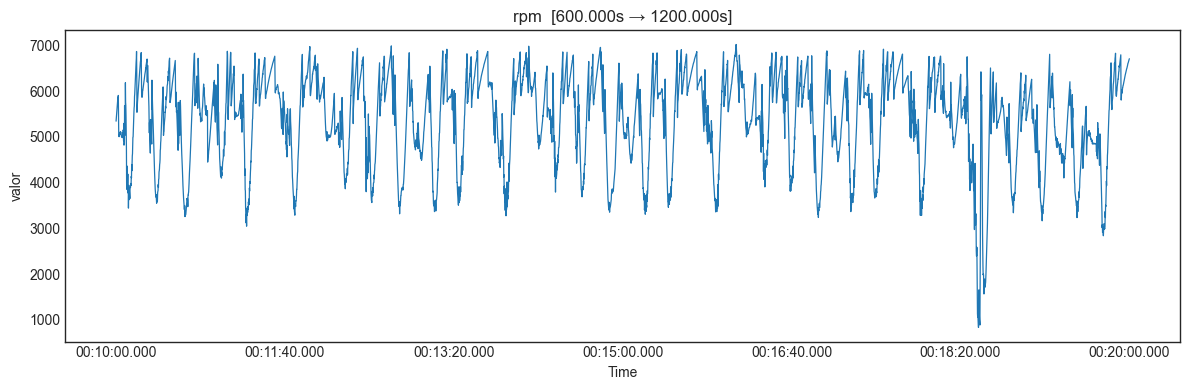

In [152]:
#Graficamos las revoluciones por minuto del motor
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_train, ['rpm'], t0, t1, columna_temporal='Time')

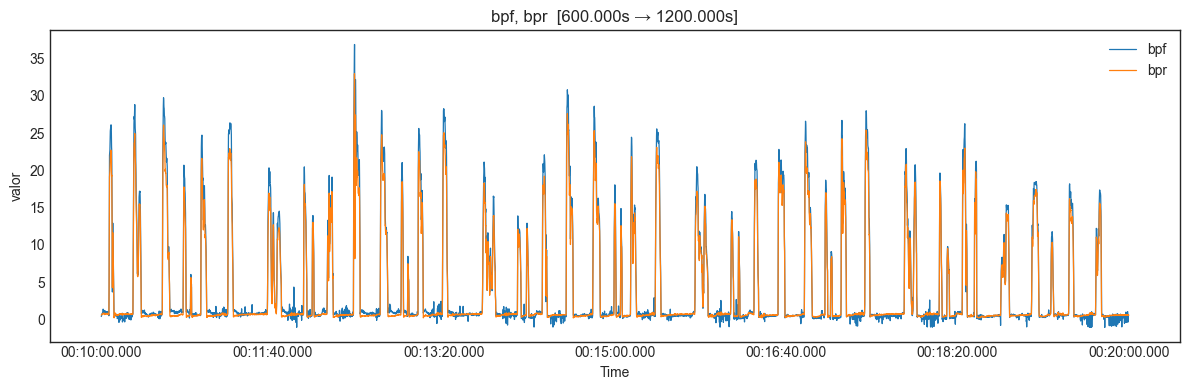

In [153]:
#Graficamos la presión de líquidos de ferenos delantero y trasero
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_train, ['bpf', 'bpr'], t0, t1, columna_temporal='Time')

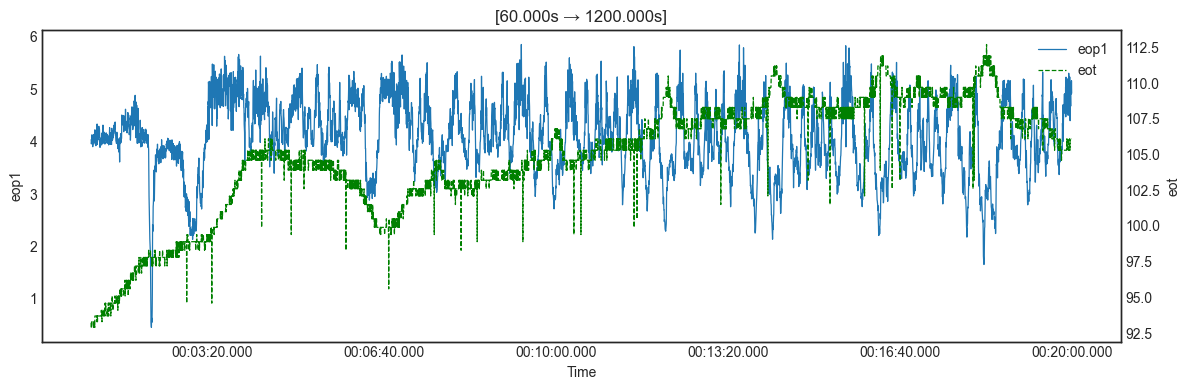

In [154]:
#Graficamos la temperatura y presión del aceite del motor
t0 = 60*1            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal_dos_ejes(df_train, ['eop1'], ['eot'], t0, t1, columna_temporal='Time')

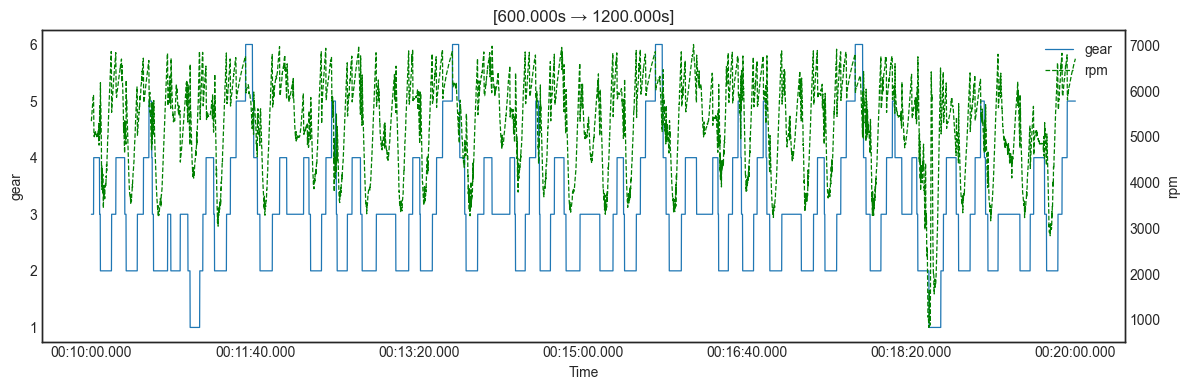

In [155]:
#Graficamos la marcha y las rpm
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal_dos_ejes(df_train, ['gear'] , ['rpm'], t0, t1, columna_temporal='Time')

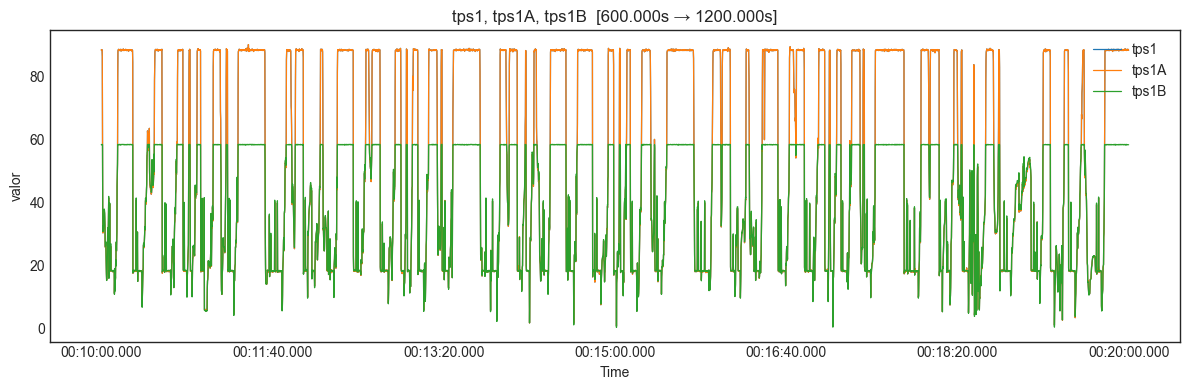

In [156]:
#Graficamos el porcentaje de apertura de la mariposa
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_train, ['tps1', 'tps1A', 'tps1B'], t0, t1, columna_temporal='Time')

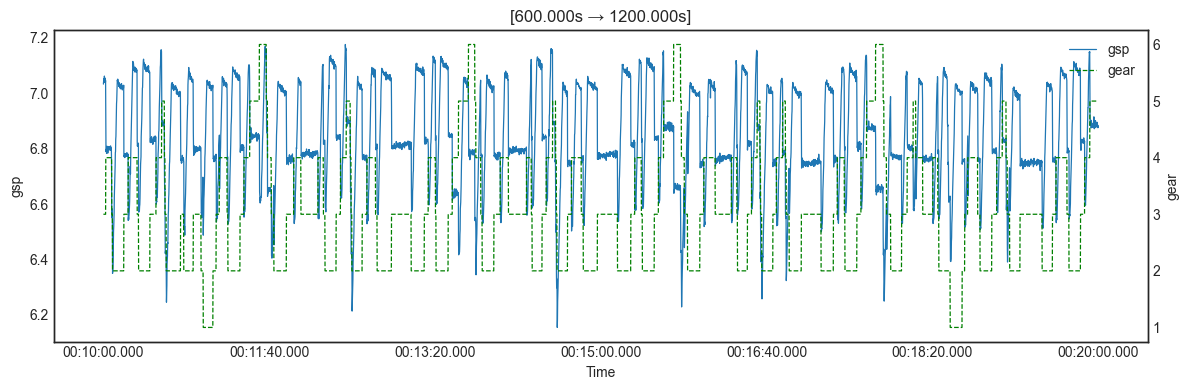

In [157]:
#Graficamos la presión del aceite del cambio de marchas y la marcha
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal_dos_ejes(df_train, ['gsp'],['gear'], t0, t1, columna_temporal='Time')

Graficamos las mismas variables pero la media hora del dataset del fallo, a ver si a primera vista observamos algo distinto

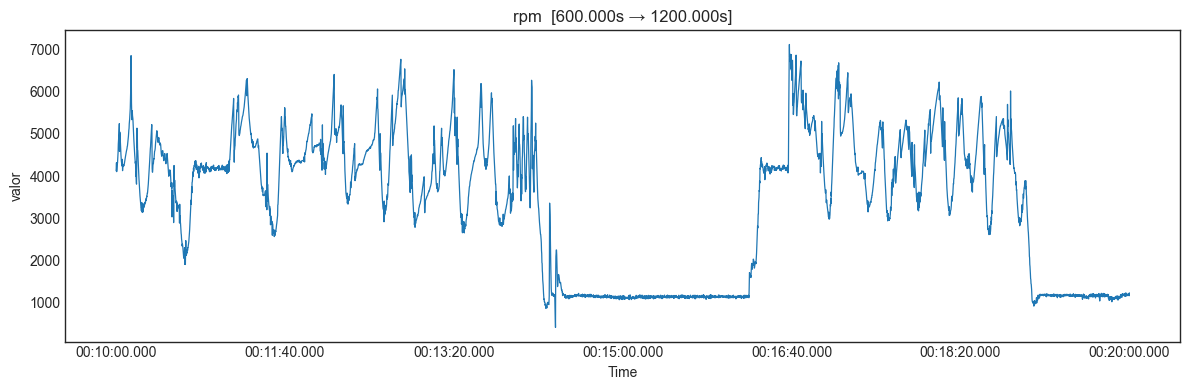

In [158]:
#Graficamos las revoluciones por minuto del motor
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_test, ['rpm'], t0, t1, columna_temporal='Time')

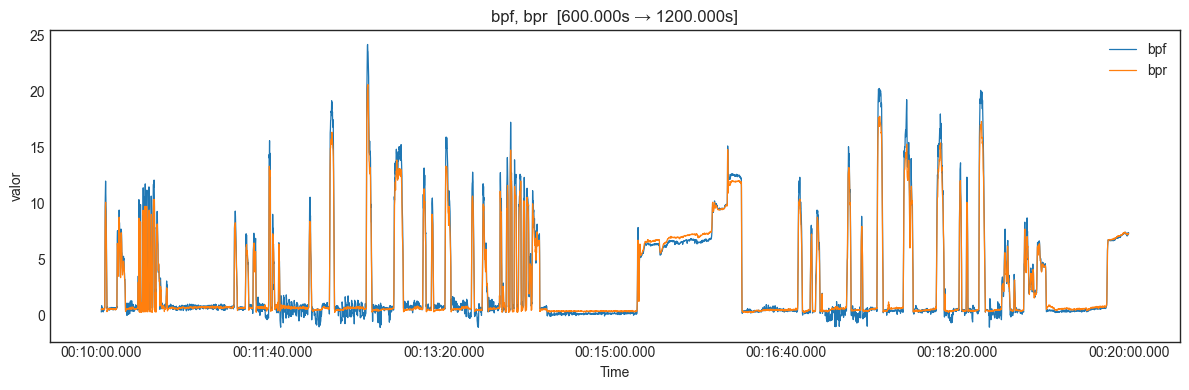

In [159]:
#Graficamos la presión de líquidos de ferenos delantero y trasero
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_test, ['bpf', 'bpr'], t0, t1, columna_temporal='Time')

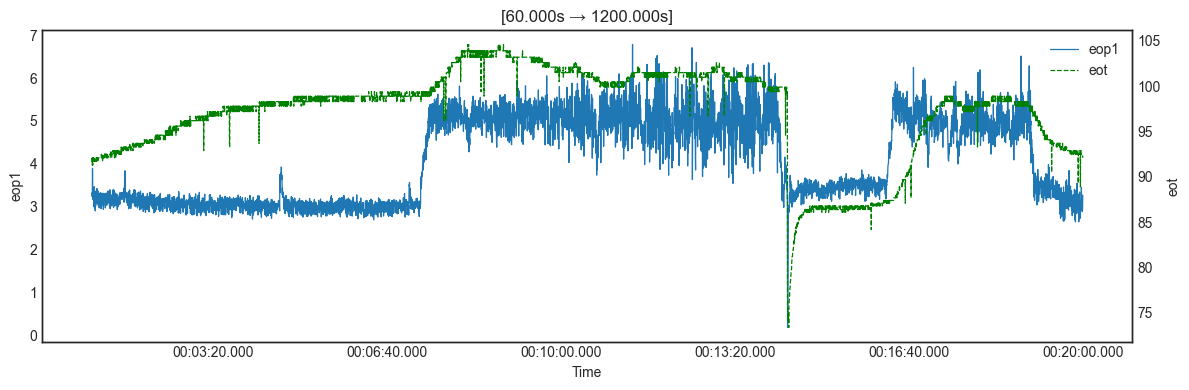

In [160]:
#Graficamos la temperatura y presión del aceite del motor
t0 = 60*1            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal_dos_ejes(df_test, ['eop1'], ['eot'], t0, t1, columna_temporal='Time')

En esta gráfica temperatura aceite motor Vs presión aceite motor se observa un comportamiento distinto que en *df_train*, la temperatura del aceite no pasa de 100ºC, mientras que en train no bajan de 100ºC. Además, la presión sí alcanza valores cerca de 7000, y en train no pasa de 6000.

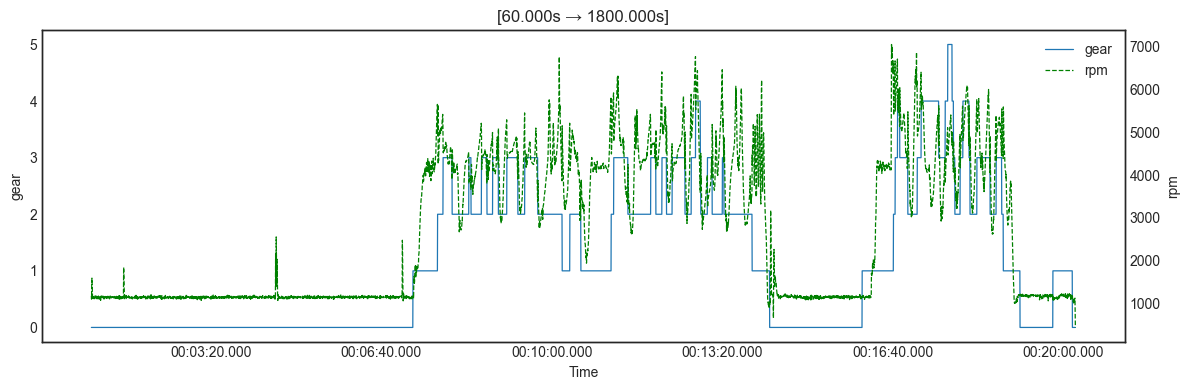

In [161]:
#Graficamos las rpm y gear
t0 = 60*1            # 10 minutos
t1 = 60*30            # 20 minutos
graficar_serie_temporal_dos_ejes(df_test, ['gear'] , ['rpm'], t0, t1, columna_temporal='Time')

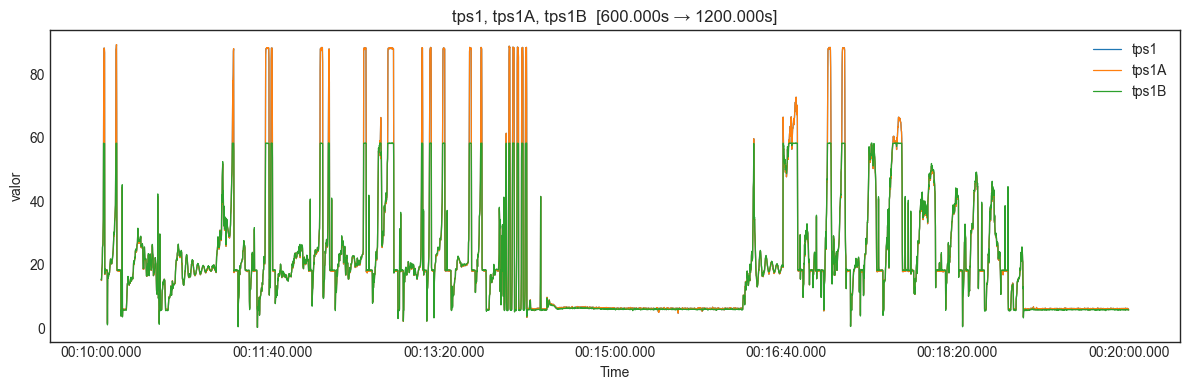

In [162]:
#Graficamos el porcentaje de la apertura de la mariposa
t0 = 60*10            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal(df_test, ['tps1', 'tps1A', 'tps1B'], t0, t1, columna_temporal='Time')

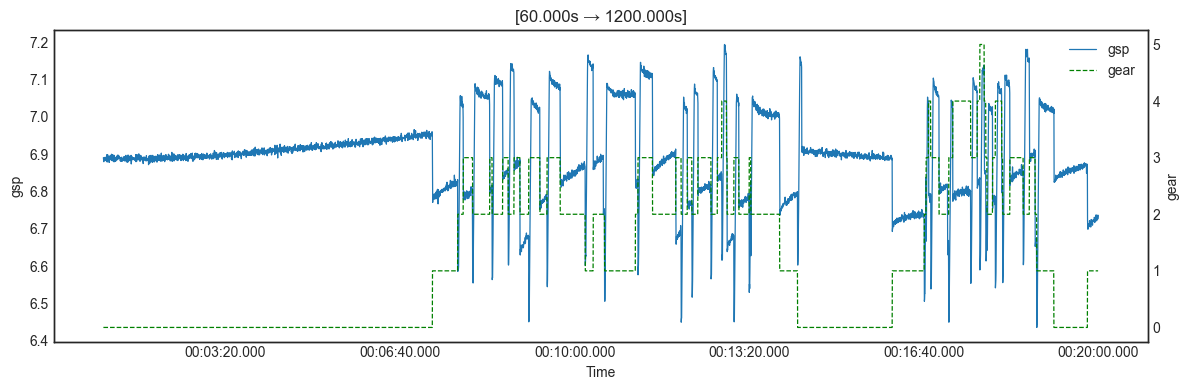

In [163]:
#Graficamos la presión del aceite del cambio de marchas y la marcha
t0 = 60*1            # 10 minutos
t1 = 60*20            # 20 minutos
graficar_serie_temporal_dos_ejes(df_test, ['gsp'],['gear'], t0, t1, columna_temporal='Time')

Ahora veamos los gráficos de barras de las variables enteras

In [164]:
def diagramas_barras(df, variables_int, bins=30):
    plt.style.use('seaborn-v0_8-whitegrid')

    n = len(variables_int)
    filas = math.ceil(n / 2)

    fig, axs = plt.subplots(filas, 2, figsize=(12, 4 * filas))
    axs = axs.flatten()  # convierte a lista para indexar fácilmente

    for i, col in enumerate(variables_int):
        axs[i].hist(df[col].dropna(), bins=bins, color='steelblue', edgecolor='black')
        axs[i].set_title(f'Diagrama de barras: {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frecuencia')

    # Si hay subplots vacíos (por número impar de variables)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


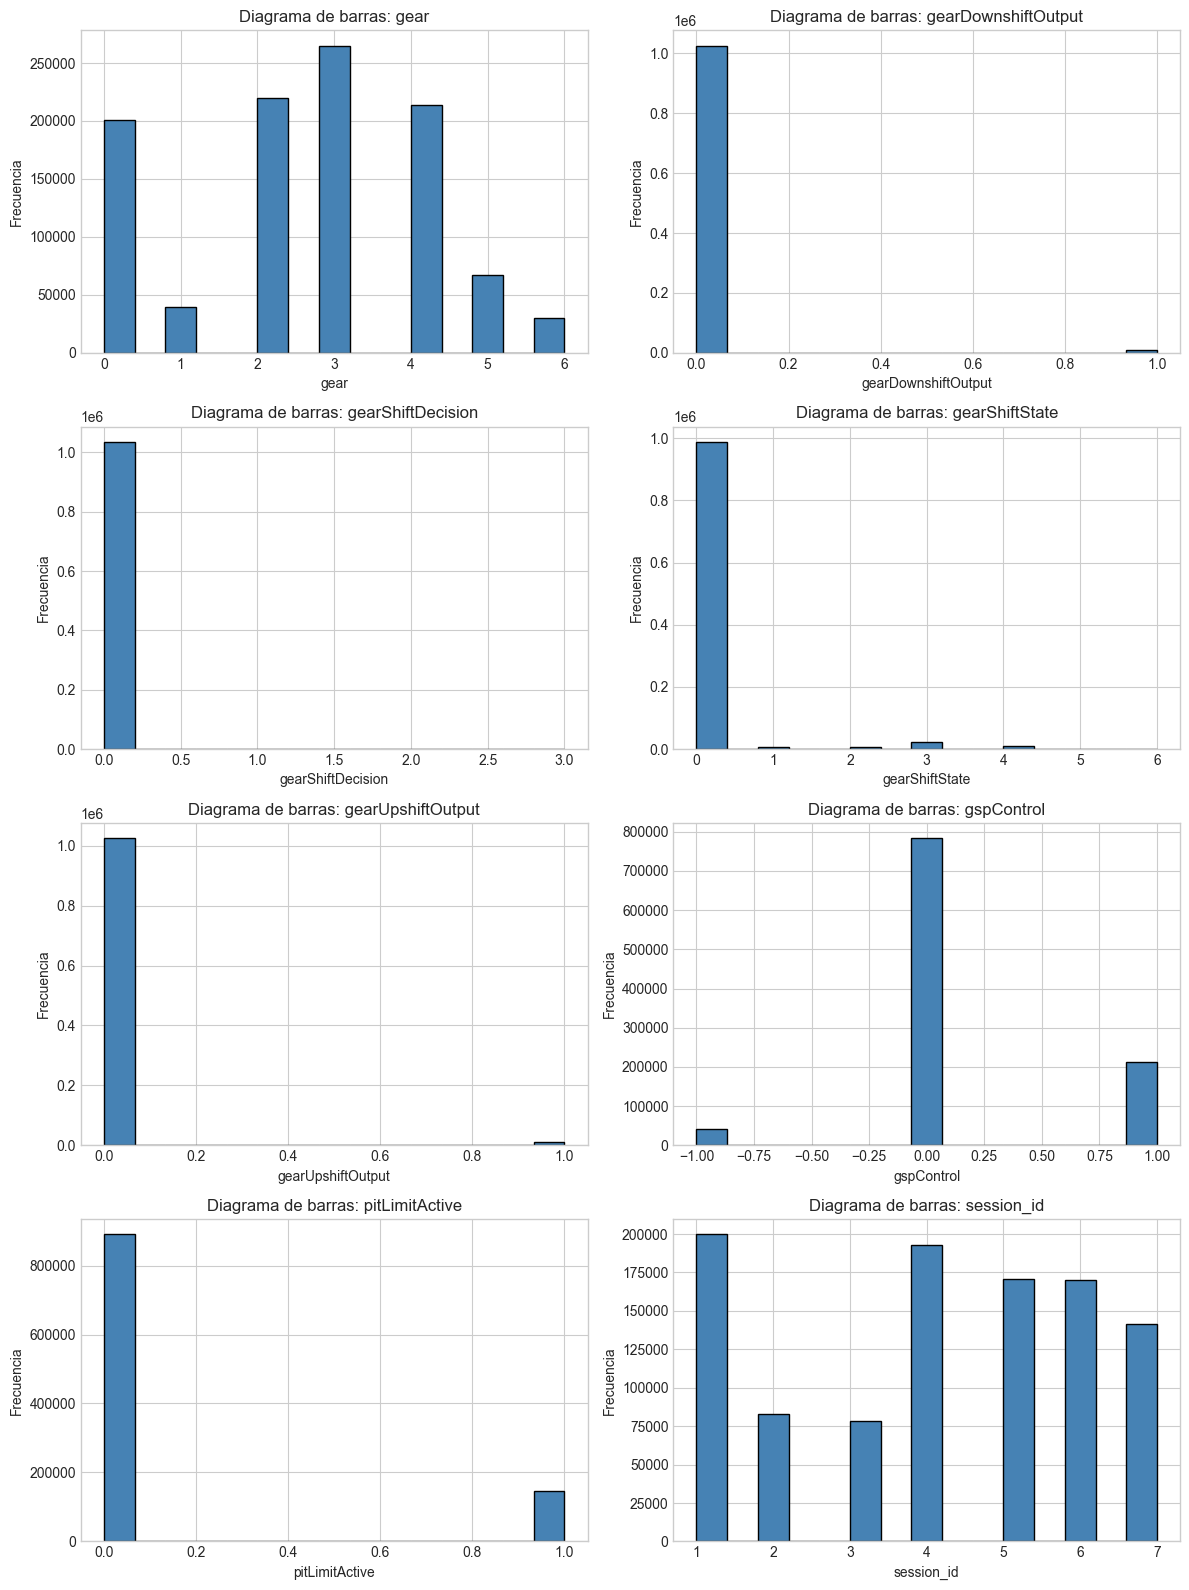

In [165]:
variables_int = [
    'gear', 'gearDownshiftOutput', 'gearShiftDecision', 'gearShiftState',
    'gearUpshiftOutput', 'gspControl', 'pitLimitActive', 'session_id']

diagramas_barras(df_train, variables_int, bins=15)


Los histogramas obtenidos reflejan comportamientos coherentes con la dinámica de conducción y del sistema de adquisición de datos:

* `gear`. Las marchas más bajas (como la 1ª) aparecen con menor frecuencia, ya que solo se utilizan en la salida o en zonas muy lentas. Las marchas altas (5ª y 6ª) se emplean únicamente en las rectas, por lo que también presentan menos ocurrencias. Las marchas intermedias (2ª, 3ª y 4ª) son las más comunes, pues se usan durante la mayor parte de la vuelta.

* `session_id`.Se observa que las sesiones 2 y 3 contienen menos datos, probablemente por su menor duración o por interrupciones en la adquisición. El resto de sesiones tienen un volumen de datos homogéneo, lo que indica una adquisición estable.

* `pitLimitActive`. La mayoría de los datos corresponden al valor 0 (limitador desactivado). Esto es completamente esperable, ya que el piloto pasa mucho más tiempo en pista que dentro del pit lane, donde el limitador de velocidad está activo (valor 1).

* `gearDownshiftOutput` y `gearUpshiftOutput`. Ambas variables solo toman los valores 0 y 1. El valor 1 representa el instante en que el piloto acciona la leva para cambiar de marcha. Dado que este pulso dura solo unos milisegundos, es lógico que el valor 1 aparezca con una frecuencia ínfima frente al 0.

* `gearShiftDecision`. Solo presenta el valor 0 con frecuencia significativa, que indica una condición normal. Los valores 1, 2 y 3 son códigos de fallo (por ejemplo, RPM demasiado altas para permitir un cambio), y su baja aparición confirma que el sistema ha funcionado correctamente durante toda la sesión.

* `gearShiftState`. El valor 0 ("AUTO IDLE") domina claramente, indicando que el sistema de control del cambio está en reposo la mayor parte del tiempo.
Los valores 1 ("AUTO UPSHIFT") y 4 ("AUTO DOWNSHIFT") aparecen en menor medida, correspondientes a las fases activas de cambio de marcha.
Otros estados (2, 3, 5 y 6) están asociados a transiciones internas o situaciones específicas (bloqueo temporal, retorno del actuador, limpieza del estado o reducciones encadenadas), y su baja frecuencia indica un funcionamiento normal del sistema.

En conjunto, las distribuciones observadas son coherentes con el comportamiento esperado del vehículo y del piloto, sin indicios de fallos o incoherencias en la adquisición.

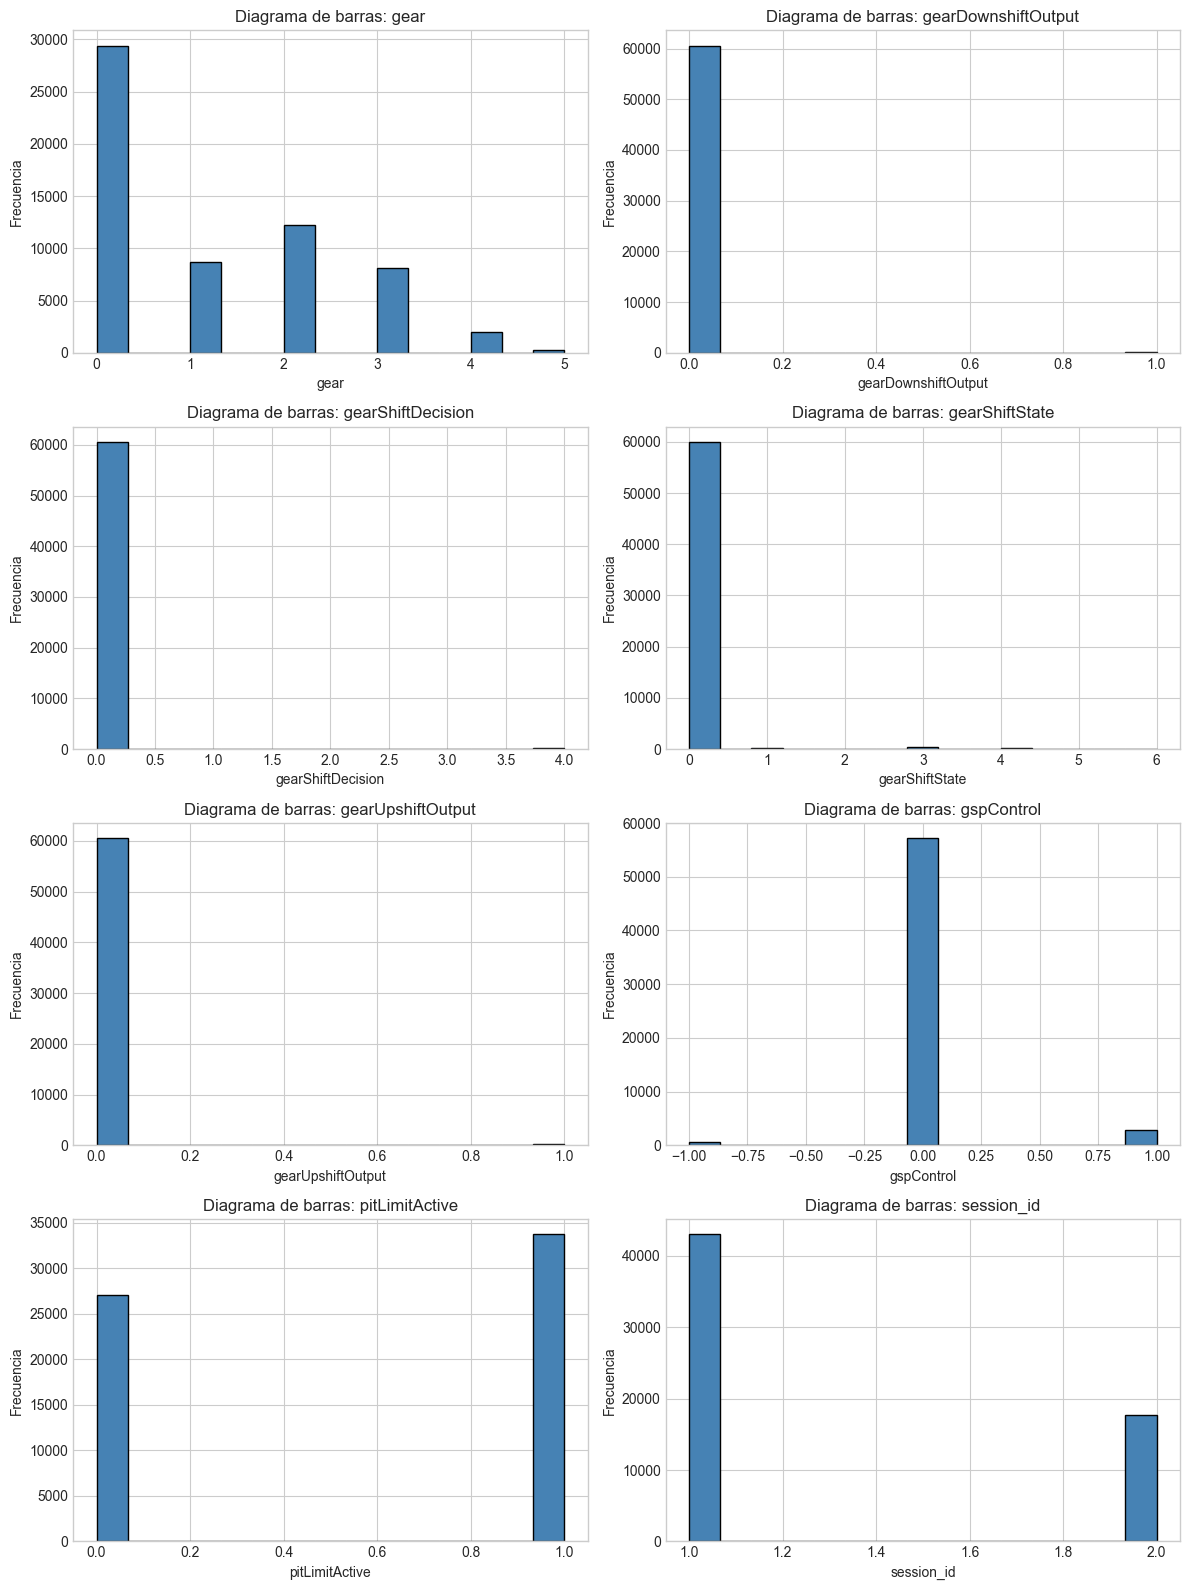

In [166]:
variables_int = [
    'gear', 'gearDownshiftOutput', 'gearShiftDecision', 'gearShiftState',
    'gearUpshiftOutput', 'gspControl', 'pitLimitActive', 'session_id']

diagramas_barras(df_test, variables_int, bins=15)

Las variables `gearDownshiftOutput` y `gearUpshiftOutput` contienen información redundante respecto a `gearShiftState`.
Ambas solo indican si se ha activado una leva de cambio (subida o bajada), mientras que `gearShiftState` refleja ese mismo evento con un nivel de detalle superior, incluyendo los estados de transición y reposo del sistema de control.
Dado que el propósito del análisis es estudiar el comportamiento del cambio y sus anomalías, se considera más informativo conservar únicamente `gearShiftState` y eliminar las señales binarias `gearDownshiftOutput` y `gearUpshiftOutput`.

In [167]:
df_train.drop(['gearDownshiftOutput', 'gearUpshiftOutput'], axis=1, inplace=True)
df_test.drop(['gearDownshiftOutput', 'gearUpshiftOutput'], axis=1, inplace=True)

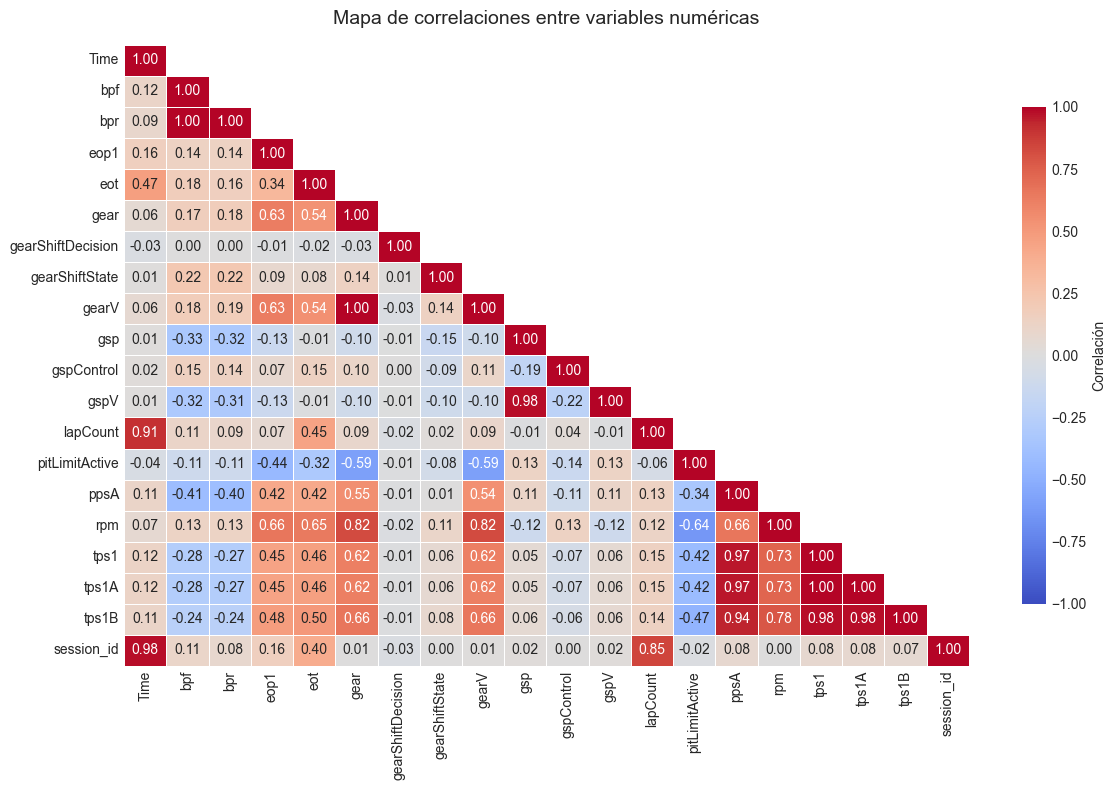

In [168]:
# Calculamos la matriz de correlaciones
corr = df_train.select_dtypes(include=['float64', 'int64']).corr()

#Sólo quiero ver el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

#quitamos la cuadricula
sns.set_style('white')

#Dibujamos el mapa de calor
sns.heatmap(
    corr,
    mask=mask,
    annot=True,           # mostramos los coeficientes de correlación
    fmt='.2f',            # formato de los valores
    cmap='coolwarm',      # paleta de colores
    vmin=-1, vmax=1,
    square=False,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'}
)

plt.title('Mapa de correlaciones entre variables numéricas', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Observamos que hay variables completamente correlacionadas con otras, por lo que podemos eliminar varias y simplificaremos el posterior análisis.
* La variable `gspV` es completamente proporcional a `gsp`, eliminamos por ello `gspV`, que es la que no tiene las unidades reales de presión.
*   Del mismo modo, también se puede eliminar `gearV` por estar completamente correlacionada con la variable `gear`.
*   `bpf` y `bpr` también están completamente correlacionadas. Como se puede ver en la gráfica de la evolución temporal, la variable `bpf` tiene más ruido, por lo que puede afectar a los modelos. Por ello, nos quedamos con `bpr`.
* Aunque las variables `lapCount` y `session_Id` estén muy correlacionadas con time, no las vamos a eliminar porque nos da información sobre las sesiones.
* Las variables `ppsA`, `tps1`, `tps1A` y `tps1B` están muy correlacionadas todas entre sí. Es lo más lógico porque todas miden lo mismo, el nivel de aceleración. De hecho, `tps1A` y `tps1B` son variables redundantes que comprueban el correcto funcionamiento de `tps1`. Estas dos últimas, claramente, deben eliminarse. Entre `ppsA` y `tps1` nos quedamos con `tps1` pues representa lo que se abre la mariposa, que es un parámetro que trabaja directamente con el motor, por lo que pierde menos información.




In [169]:
df_train.drop(['gspV', 'gearV', 'bpf', 'ppsA', 'tps1A', 'tps1B'], axis=1, inplace=True)
df_test.drop(['gspV', 'gearV', 'bpf', 'ppsA', 'tps1A', 'tps1B'], axis=1, inplace=True)

In [170]:
# Ahora nos hemos quedado con 15 variables, las cuales todas aportan
# información relevante y ninguna es redundante
df_train.head()

Time   bpr   eop1   eot  gear  gearShiftDecision  gearShiftState    gsp  \
0  0.02  0.52  0.214  83.5     0                  0               0  6.944   
1  0.04  0.59  0.214  83.5     0                  0               0  6.944   
2  0.06  0.57  0.320  83.5     0                  0               0  6.944   
3  0.08  0.49  0.320  83.5     0                  0               0  6.944   
4  0.10  0.51  0.455  83.5     0                  0               0  6.944   

   gspControl  lapCount  pitLimitActive     rpm  tps1  session_id  
0           0       0.0               0  1473.0   9.2           1  
1           0       0.0               0  1597.0   9.2           1  
2           0       0.0               0  1720.0   9.4           1  
3           0       0.0               0  1826.0   9.4           1  
4           0       0.0               0  1867.0   9.2           1

# Transformación

### Tratamiento de outliers

En este punto del preprocesamiento se realiza un tratamiento superficial de valores atípicos, ya que no se pretende eliminar información potencialmente útil para el entrenamiento de los modelos de detección de anomalías.

Concretamente, se consideran outliers aquellos instantes en los que el vehículo se encuentra detenido (o entrando) en el pit lane, pues durante estos períodos las variables registradas presentan un comportamiento al registrado cuando el coche rueda por el circuito (rpm bajas, presiones reducidas, etc).

Además, como no se desea romper la continuidad temporal del conjunto de datos, en lugar de eliminar las observaciones correspondientes, se sustituirán por otros valores. No todas las variables serán tratadas, simplemente las físicas: `bpr`, `eop1`, `eot`, `gsp`, `rpm` y `tps1`.

In [171]:
# primero identificamos en qué sesiones y qué vueltas hubo paradas en el
# pitlane (pitlimitactive==1)

#filtramos los valores correspondientes a paradas en pit
pit_data = df_train[df_train['pitLimitActive'] == 1].copy()

resumen_pit = (
    pit_data.groupby(['session_id', 'lapCount'])
    .agg(
        n_muestras=('Time', 'count'),
        t_inicio=('Time', 'min'),
        t_fin=('Time', 'max')
    )
    .reset_index()
    .sort_values(['session_id', 'lapCount'])
)

# le aplicamos la función que transforma segundos en formato hhmmss para
# facilitar la lectura
resumen_pit['t_inicio_fmt'] = resumen_pit['t_inicio'].astype(float).apply(lambda x: formato_hhmmss(x, 0))
resumen_pit['t_fin_fmt']    = resumen_pit['t_fin'].astype(float).apply(lambda x: formato_hhmmss(x, 0))


print('Resumen de paradas en pitlane:')
display(resumen_pit[['session_id','lapCount','n_muestras','t_inicio_fmt','t_fin_fmt']])

Resumen de paradas en pitlane:


session_id  lapCount  n_muestras  t_inicio_fmt     t_fin_fmt
0            1       0.0       11868  00:00:13.340  00:06:51.620
1            1      11.0        1650  00:31:58.987  00:34:35.267
2            1      22.0        3818  01:05:14.693  01:06:31.033
3            2       0.0       32178  01:06:35.293  01:17:18.833
4            2       6.0        1810  01:33:36.361  01:34:12.541
5            3       6.0       11713  01:34:12.561  01:38:10.501
6            3       9.0         656  02:00:04.567  02:00:17.667
7            4       0.0        3083  02:02:05.707  02:11:48.047
8            4      13.0       12497  02:36:51.255  02:41:03.235
9            4      25.0        1828  03:04:05.565  03:04:42.105
10           5      25.0        7456  03:04:42.125  03:07:11.665
11           5      32.0       11700  03:23:41.896  03:27:35.876
12           5      35.0        6532  03:34:35.445  03:36:46.065
13           5      48.0        2306  04:00:54.047  04:01:40.147
14           6      48.0         480  04:19:02.887  04:19:12.467
15           6      57.0        8353  04:37:12.778  04:39:59.818
16           6      66.0         569  04:57:31.540  04:57:42.900
17           6      66.5           1  04:57:42.901  04:57:42.901
18           6      67.0        2071  04:57:42.921  04:58:24.321
19           7      67.0       17311  04:58:24.341  05:04:10.541
20           7      76.0        6837  05:21:59.363  05:24:16.083
21           7      87.0        1639  05:44:58.109  05:45:30.869

Se ha parado 22 veces en total a lo largo de todas las sesiones. Realmente todas las sesiones deben tener al menos dos "paradas", pues se empieza en el pit y se acaba en el pit. Veamos la representación entera de las `rpm` (se ve muy claro) y observemos los puntos más bajos coincide cuando está en el pit.

Para evitar que los segmentos correspondientes al pitlane presenten valores excesivamente planos, se conserva la variación original de las variables físicas alrededor de su media local. Este procedimiento mantiene la forma de la señal real, sin alterar la continuidad temporal.

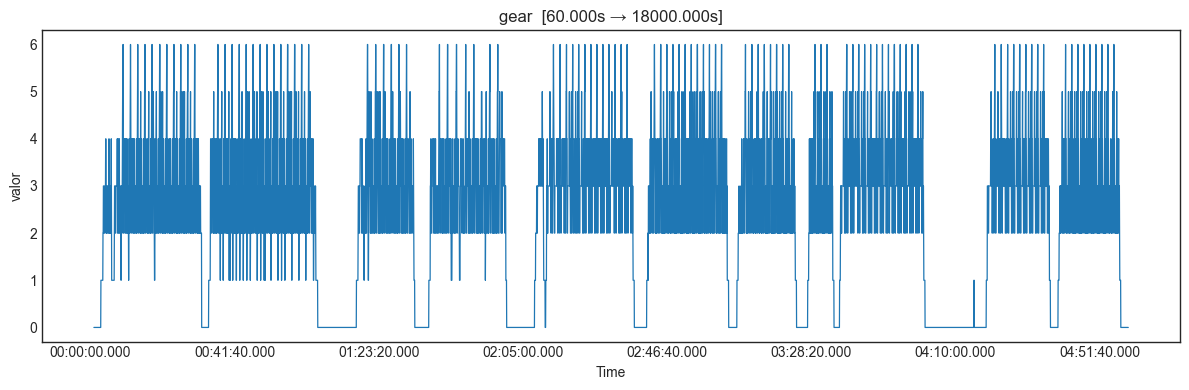

In [172]:
# Es fácil darse cuenta que justo los períodos de parada en el pitlane,
# coinciden con los momentos en los que la marcha engranada es neutral (cero)
graficar_serie_temporal(df_train, ['gear'], 60*1, 60*60*5, columna_temporal='Time')

In [173]:
# Copiamos para mantener el original y seguimos trabajando con train
df_tr_pit = df_train.copy()

variables_fisicas = ['bpr', 'eop1', 'eot', 'gsp', 'rpm', 'tps1']

condicion_pit = (df_tr_pit['pitLimitActive'] == 1) | (df_tr_pit['gear']==0)
media_global= df_tr_pit[variables_fisicas].mean()

for col in variables_fisicas:
    media_pit = df_tr_pit.loc[condicion_pit, col].mean()
    df_tr_pit.loc[condicion_pit, col] = media_global[col] + (df_tr_pit.loc[condicion_pit, col] - media_pit)

# Metemos clip para controlar que al sumarle la diferencia tampoco se conviertan en valores demasiado atípicos
for col in variables_fisicas:
    lo, hi = df_tr_pit[df_tr_pit['pitLimitActive'] == 0][col].quantile([0.01, 0.99])    #cogemos percentil 1% y 99% de los valores cuando el coche está en pista
    df_tr_pit[col] = np.clip(df_tr_pit[col], lo, hi)                                    # si algún valor resultante esta por encima del lowest o del highest los fija a esos valores

In [174]:
#hacemos lo mismo con test, pues estos no son los outliers que nos interesa detectar
df_tst_pit = df_test.copy()

variables_fisicas = ['bpr', 'eop1', 'eot', 'gsp', 'rpm', 'tps1']

condicion_pit = (df_tst_pit['pitLimitActive'] == 1) | (df_tst_pit['gear']==0)
media_global= df_tst_pit[variables_fisicas].mean()

for col in variables_fisicas:
    media_pit = df_tst_pit.loc[condicion_pit, col].mean()
    df_tst_pit.loc[condicion_pit, col] = media_global[col] + (df_tst_pit.loc[condicion_pit, col] - media_pit)

# Metemos clip para controlar que al sumarle la diferencia tampoco se conviertan en valores demasiado atípicos
for col in variables_fisicas:
    lo, hi = df_tst_pit[df_tr_pit['pitLimitActive'] == 0][col].quantile([0.01, 0.99])    #cogemos percentil 1% y 99% de los valores cuando el coche está en pista
    df_tst_pit[col] = np.clip(df_tst_pit[col], lo, hi)  

C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\622572211.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2156.3129445 2332.3129445 2511.3129445 ... 1709.3129445 1667.3129445
 1641.3129445]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tst_pit.loc[condicion_pit, col] = media_global[col] + (df_tst_pit.loc[condicion_pit, col] - media_pit)
C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\622572211.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lo, hi = df_tst_pit[df_tr_pit['pitLimitActive'] == 0][col].quantile([0.01, 0.99])    #cogemos percentil 1% y 99% de los valores cuando el coche está en pista
C:\Users\Bella\AppData\Local\Temp\ipykernel_43496\622572211.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lo, hi = df_tst_pit[df_tr_pit['pitLimitActive'] == 0][col].quantile([0.01, 

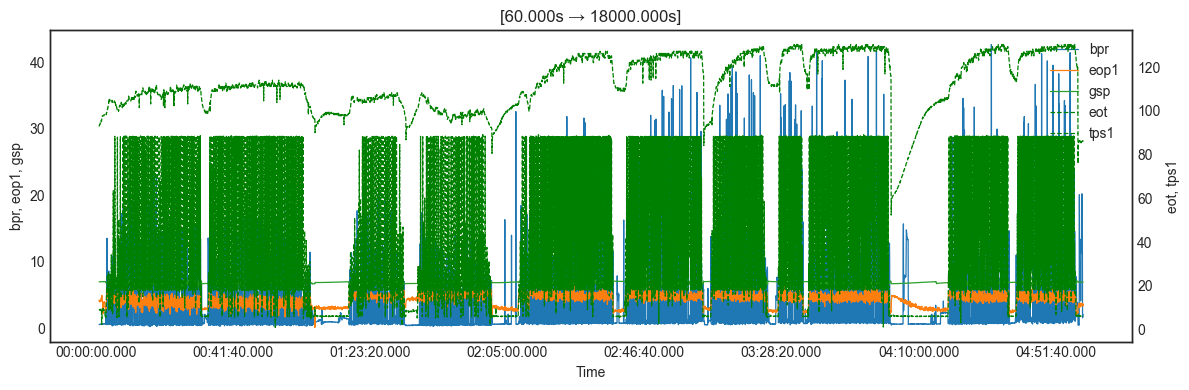

In [175]:
variables_fisicas = ['bpr', 'eop1', 'eot', 'gsp', 'rpm', 'tps1']

graficar_serie_temporal_dos_ejes(df_train, ['bpr', 'eop1', 'gsp'], ['eot', 'tps1'], 60*1, 60*60*5, columna_temporal='Time')

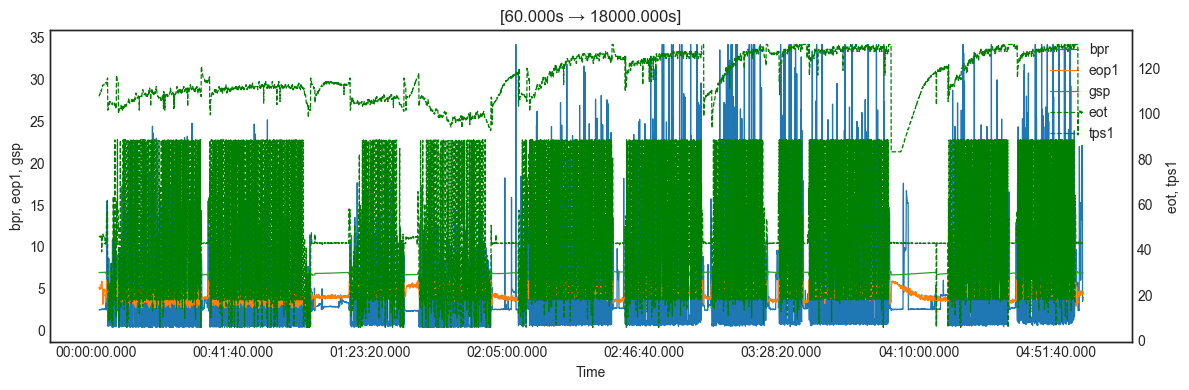

In [176]:
graficar_serie_temporal_dos_ejes(df_tr_pit, ['bpr', 'eop1', 'gsp'], ['eot', 'tps1'], 60*1, 60*60*5, columna_temporal='Time')

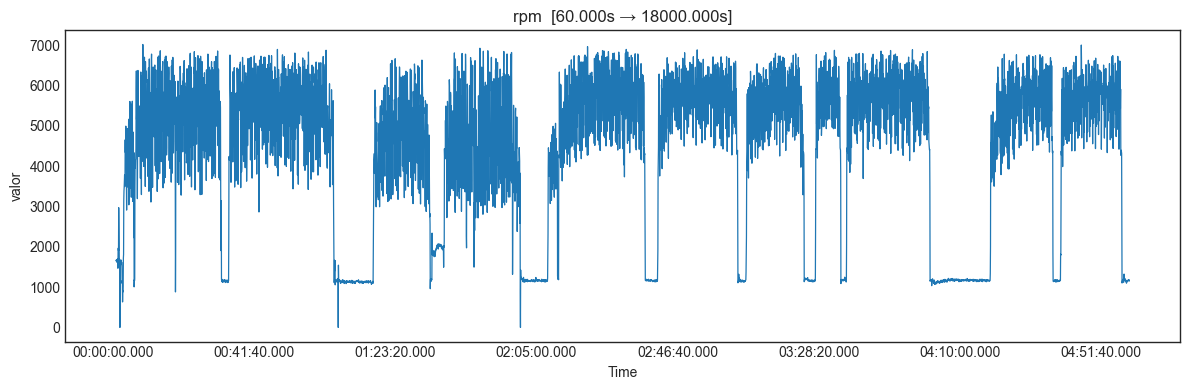

In [177]:
graficar_serie_temporal(df_train, ['rpm'], 60*1, 60*60*5, columna_temporal='Time')

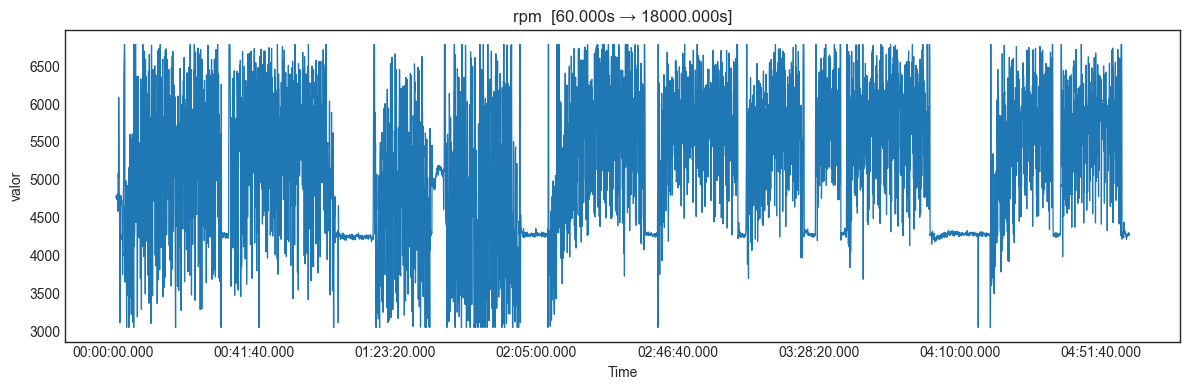

In [178]:
graficar_serie_temporal(df_tr_pit, ['rpm'], 60*1, 60*60*5, columna_temporal='Time')

### Normalización

Se normalizan únicamente las variables físicas continuas (`bpr`, `eop1`, `eot`, `gsp`, `rpm`, `tps1`) con el objetivo de homogeneizar sus escalas antes del modelado. Las variables discretas o de estado (`gear`, `gearShiftState`, `gearShiftDecision`, `gspControl`) se mantienen sin transformar, ya que su magnitud no tiene interpretación proporcional. De este modo se preserva la coherencia física de los datos, manteniendo la interpretabilidad de las variables originales. Se realizarán dos normalizaciones para poder usar la más adecuada para cada uno de los distintos modelos.

In [179]:
from sklearn import preprocessing

df_mm  = df_tr_pit.copy()
df_mm.drop(['Time','lapCount', 'pitLimitActive'], axis=1, inplace=True)
#sessions_to_use = [1, 2, 3]
#df_mm = df_mm[df_mm["session_id"].isin(sessions_to_use)].copy()
df_std = df_tr_pit.copy()

scaler_mm  = preprocessing.MinMaxScaler()
scaler_std = StandardScaler()


x = df_mm.values
x_scaled = scaler_mm.fit_transform(x)
df_mm = pd.DataFrame(x_scaled)


#df_mm[variables_fisicas]  = scaler_mm.fit_transform(df_mm[variables_fisicas])


df_std[variables_fisicas] = scaler_std.fit_transform(df_std[variables_fisicas])


# Para las variables lógicas simplemente reescalamos a [0,1]
#variables_contexto = ['gear', 'gearShiftDecision', 'gearShiftState', 'gspControl']
#for col in variables_contexto:
#    mn, mx = df_tr_pit[col].min(), df_tr_pit[col].max()
#    rng = (mx - mn) if mx != mn else 1.0
#    df_mm[col]  = (df_tr_pit[col] - mn) / rng
#    df_std[col] = (df_tr_pit[col] - mn) / rng

# Guardamos para luego aplicar a validación
#SAVE_DIR = Path(r"C:\Users\Bella\05_master VIU\3. TFM\codigo\models")
#SAVE_DIR.mkdir(parents=True, exist_ok=True)

#joblib.dump(scaler_mm, SAVE_DIR / "scaler_minmax.pkl")
#joblib.dump(scaler_std, SAVE_DIR / "scaler_standard.pkl")



In [180]:
df_mm.tail()

0         1    2    3    4    5         6    7         8   \
1036598  0.066619  0.097873  1.0  0.0  0.0  0.0  0.547896  0.5  0.179701   
1036599  0.066619  0.090874  1.0  0.0  0.0  0.0  0.547896  0.5  0.169246   
1036600  0.068098  0.090874  1.0  0.0  0.0  0.0  0.555668  0.5  0.159326   
1036601  0.066028  0.064398  1.0  0.0  0.0  0.0  0.555668  0.5  0.152892   
1036602  0.067506  0.064398  1.0  0.0  0.0  0.0  0.555668  0.5  0.140023   

               9    10  
1036598  0.451615  1.0  
1036599  0.451615  1.0  
1036600  0.451615  1.0  
1036601  0.452824  1.0  
1036602  0.452824  1.0

In [181]:
#scaler_mm = joblib.load(SAVE_DIR / "scaler_minmax.pkl")
#scaler_std = joblib.load(SAVE_DIR / "scaler_standard.pkl")
df_test_mm= df_tst_pit.copy()

df_test_mm.drop(['Time','lapCount', 'pitLimitActive'], axis=1, inplace=True)
df_test_std= df_tst_pit.copy()

x = df_test_mm.values 
x_scaled = scaler_mm.transform(x)
df_test_mm = pd.DataFrame(x_scaled)

#df_test_mm[variables_fisicas] = scaler_mm.transform(df_test[variables_fisicas])
df_test_std[variables_fisicas] = scaler_std.transform(df_test[variables_fisicas])

# Para las variables lógicas simplemente reescalamos a [0,1]
#variables_contexto = ['gear', 'gearShiftDecision', 'gearShiftState', 'gspControl']
#for col in variables_contexto:
#    mn, mx = df_test[col].min(), df_test[col].max()
#    rng = (mx - mn) if mx != mn else 1.0
#    df_test_mm[col]  = (df_test[col] - mn) / rng
#    df_test_std[col] = (df_test[col] - mn) / rng

In [182]:
df_test_mm.head()

0         1         2    3    4    5         6    7         8   \
0  0.043765  0.214018  0.008104  0.0  0.0  0.0  0.705444  0.5 -0.210104   
1  0.044061  0.214018  0.008104  0.0  0.0  0.0  0.705444  0.5 -0.193750   
2  0.042878  0.214018  0.008104  0.0  0.0  0.0  0.705444  0.5 -0.145761   
3  0.044652  0.214018  0.008104  0.0  0.0  0.0  0.705444  0.5 -0.104206   
4  0.042878  0.214018  0.008104  0.0  0.0  0.0  0.705444  0.5 -0.072838   

         9    10  
0  0.128719  0.0  
1  0.128719  0.0  
2  0.132347  0.0  
3  0.132347  0.0  
4  0.132347  0.0

# Minería de datos

En esta sección se entrenan los distintos modelos de aprendizaje automático no supervisado seleccionados con el conjunto de entrenamiento. Dichos modelos son:

* **NuPIC**. Es un modelo clásico de series temporales clásico, neuroinspirado, detecta outliers puntuales.
* **Matrix Profile**. Otro modelo clásico de series temporales, que detecta subsecuencias de outliers en las series.
* **USAD**. Un modelo más moderno, muy utilizado, con una buena librería. Basado en Deep Learning no supervisado.
* **CAD**. Modelo más reciente y complejo. Estudia la relación de las variables con la anomalía.

Para importar los modelos desde los repositorios de GitHub me he ayudado de ChatGPT, pues es una tarea que nunca antes había realizado

### Matrix Profile

Matrix Profile es una técnica de series temporales univariantes que sirve para detectar patrones repetidos (motifs), detectar anomalías (discords) y medir la similitud local entre subsecuencias. 
Este modelo toma una serie temporal $T$ y una ventana de longitud $m$. Luego, compara todas las subsecuencias de longitud $m$ entre sí utilizando la distancia euclídea y guarda, para cada posición, la distancia mínima a otra subsecuencia. El resultado es la **Matrix Profile**, una matriz de las msmas dimensiones que la serie, que te dice lo "normal" o "rara" que es cada subsecuencia. 

In [78]:
from scipy.signal import find_peaks
import stumpy

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

Este modelo no tiene fase de entrenamiento, simplemente compara las distancias. Por ello, concatenaré el dataset de train y validación. Además, como el modelo se basa en cálculo de distancia con la euclídea normalizada, es útil normalizar usando Z-score. 

In [79]:
#Vamos a concatenar entonces df_std y df_test_std al igual que hicimos al principio 
dfs = [df_std, df_test]

offset = 0    # para que el dataset resultante tenga una variable temporal que sea continua a lo largo de todo el csv,
              # no que se reinicie cada vez que se concatene un csv necesitamos el valor final del tiempo de cada csv
df_corregidos = []

for df in dfs:
    df = df.copy()
    # Ajustamos el tiempo añadiendo el offset de la sesión anterior
    df["Time"] = df["Time"] + offset
    # Nos quedamos con el último valor de Time de la sesión para añadir a la siguiente sesión
    offset = df["Time"].iloc[-1]
    df_corregidos.append(df)    #guardamos en una lista de df todos los datasets corregidos

# Luego se concatena todo con el tiempo corregido
df_MP = pd.concat(df_corregidos, ignore_index=True)

df_MP.head()

Time       bpr      eop1       eot  gear  gearShiftDecision  \
0  0.02 -0.252537 -2.551218 -1.760995     0                  0   
1  0.04 -0.241977 -2.551218 -1.760995     0                  0   
2  0.06 -0.244994 -2.551218 -1.760995     0                  0   
3  0.08 -0.257062 -2.551218 -1.760995     0                  0   
4  0.10 -0.254045 -2.551218 -1.760995     0                  0   

   gearShiftState       gsp  gspControl  lapCount  pitLimitActive       rpm  \
0               0  0.432884           0       0.0               0 -0.750777   
1               0  0.432884           0       0.0               0 -0.613280   
2               0  0.432884           0       0.0               0 -0.476892   
3               0  0.432884           0       0.0               0 -0.359354   
4               0  0.432884           0       0.0               0 -0.313892   

       tps1  session_id  
0 -0.218310           1  
1 -0.218310           1  
2 -0.211526           1  
3 -0.211526           1  
4 -0.218310           1

In [79]:
# El primer paso es calcular la matrix profile para cada variable. Calcularemos solo la matriz para las variables físicas
variables_fisicas

['bpr', 'eop1', 'eot', 'gsp', 'rpm', 'tps1']

Fijamos la ventana en $m=150$, pues cuanto menor sea $m$, menor es el tiempo de cómputo. Aunque haya más ventanas posibles porque caben más en la serie, la clave es que cada distancia se calcula con menos puntos y los algoritmos de este tipo están optimizados con FFT. 

In [80]:
mp_bpr= stumpy.stump(df_MP['bpr'], m=150)

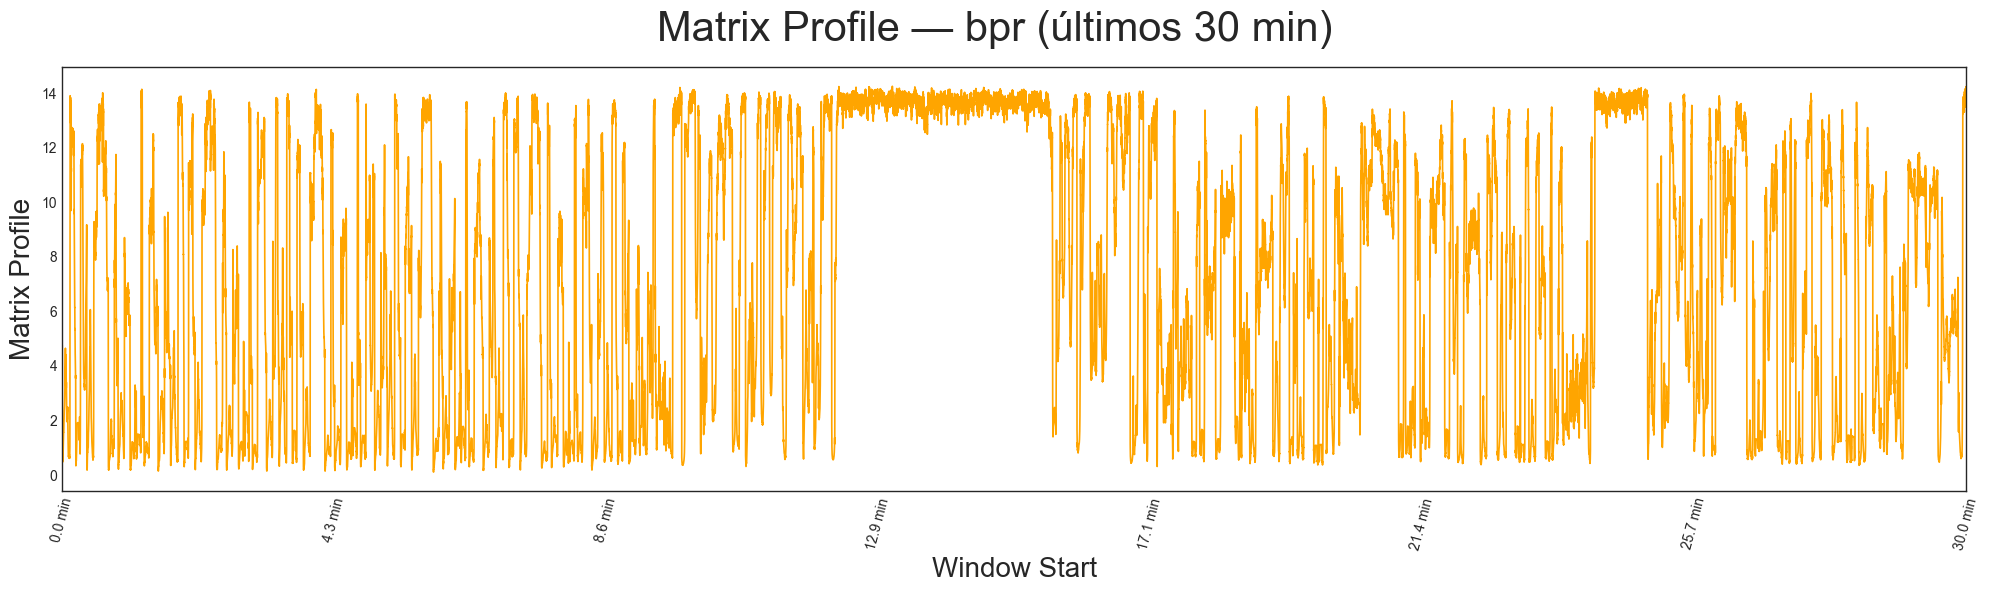

In [ ]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_bpr[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — bpr (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()


In [84]:
# --- motif + vecino más cercano ---
signal = df_MP['bpr'].to_numpy()
motif_idx = int(np.argsort(mp_bpr[:, 0])[0])
nearest_neighbor_idx = int(mp_bpr[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")



The motif is located at index 846219
The nearest neighbor is located at index 638799


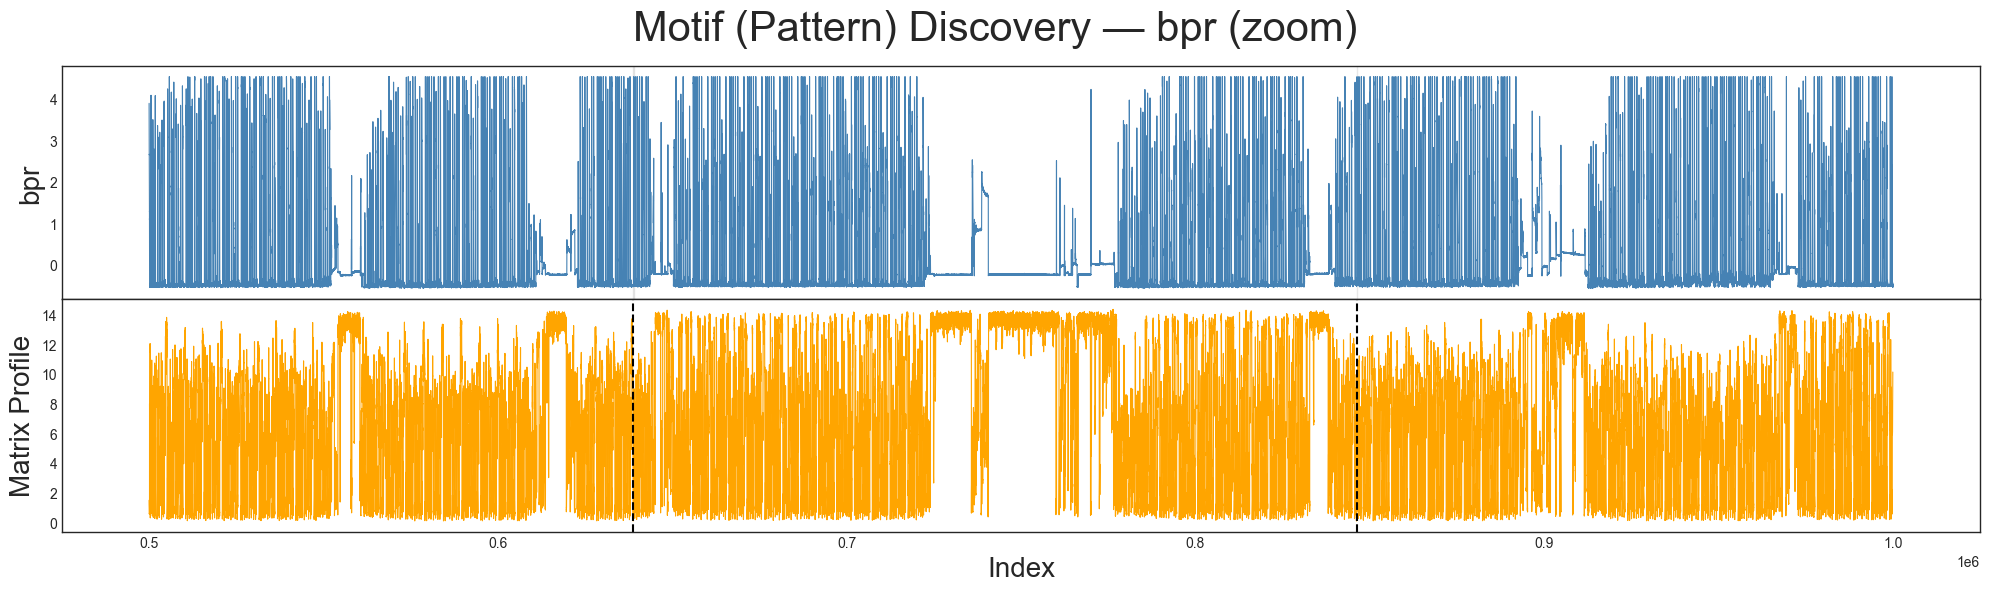

In [87]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — bpr (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('bpr', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_bpr[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [101]:
serie = df_MP['bpr'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_bpr[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [102]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_bpr[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1046411
The nearest neighbor subsequence to this discord is 14.2541 units away


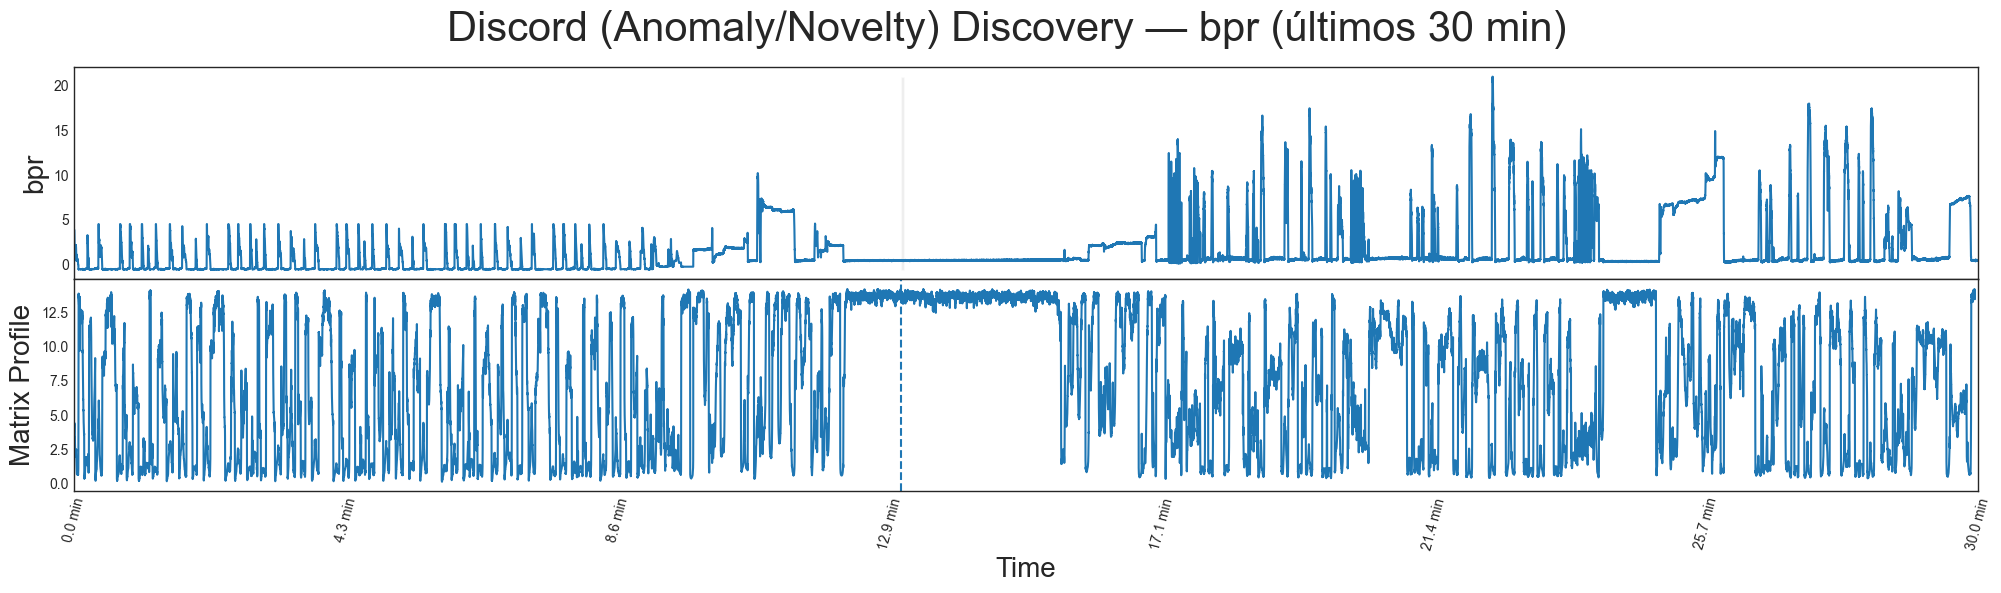

In [103]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — bpr (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('bpr', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [87]:
mp_eop= stumpy.stump(df_MP['eop1'], m=150)

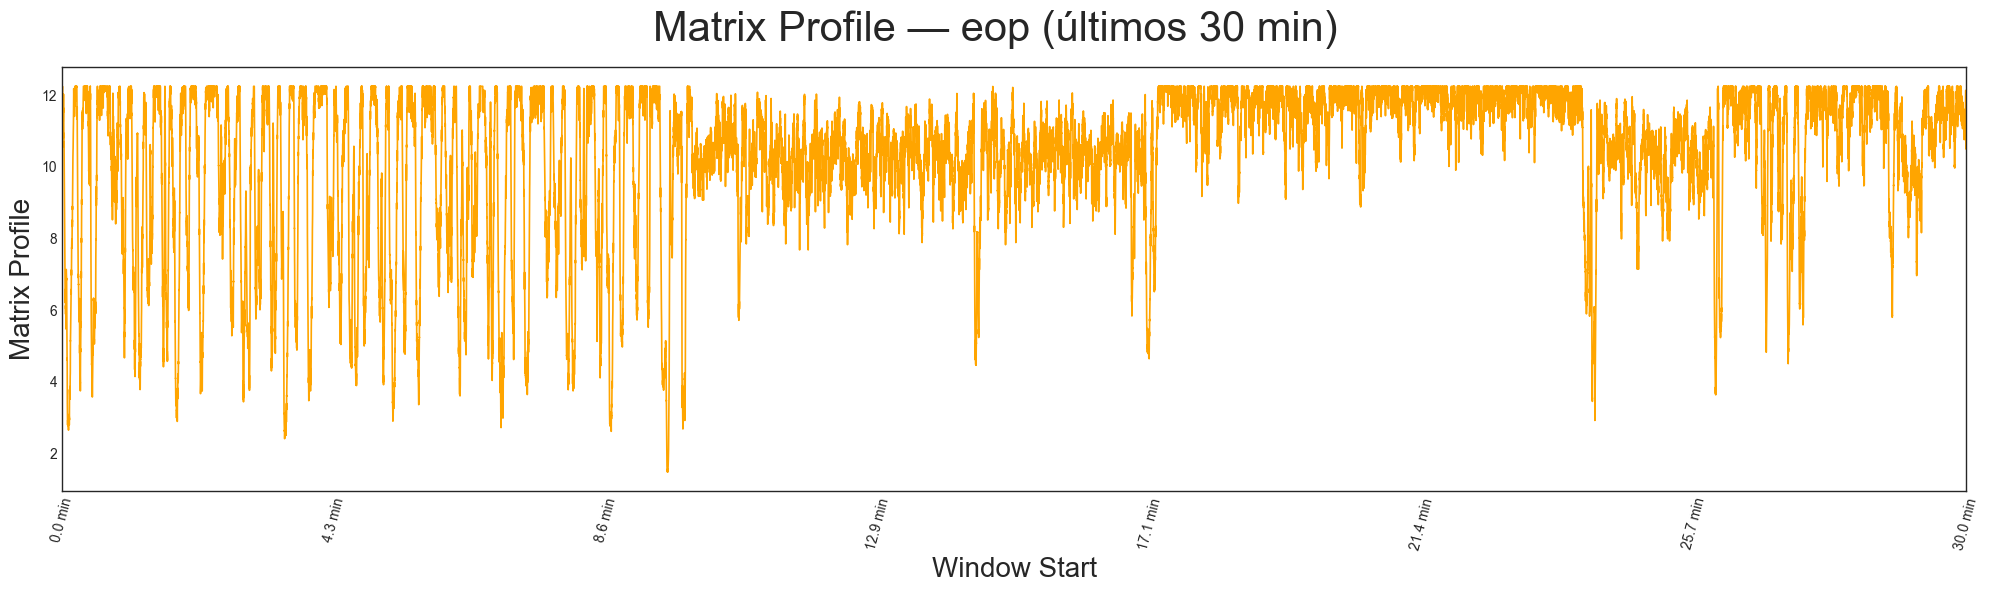

In [88]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_eop[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — eop (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [89]:
# --- motif + vecino más cercano ---
signal = df_MP['eop1'].to_numpy()
motif_idx = int(np.argsort(mp_eop[:, 0])[0])
nearest_neighbor_idx = int(mp_eop[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")


The motif is located at index 178662
The nearest neighbor is located at index 178701


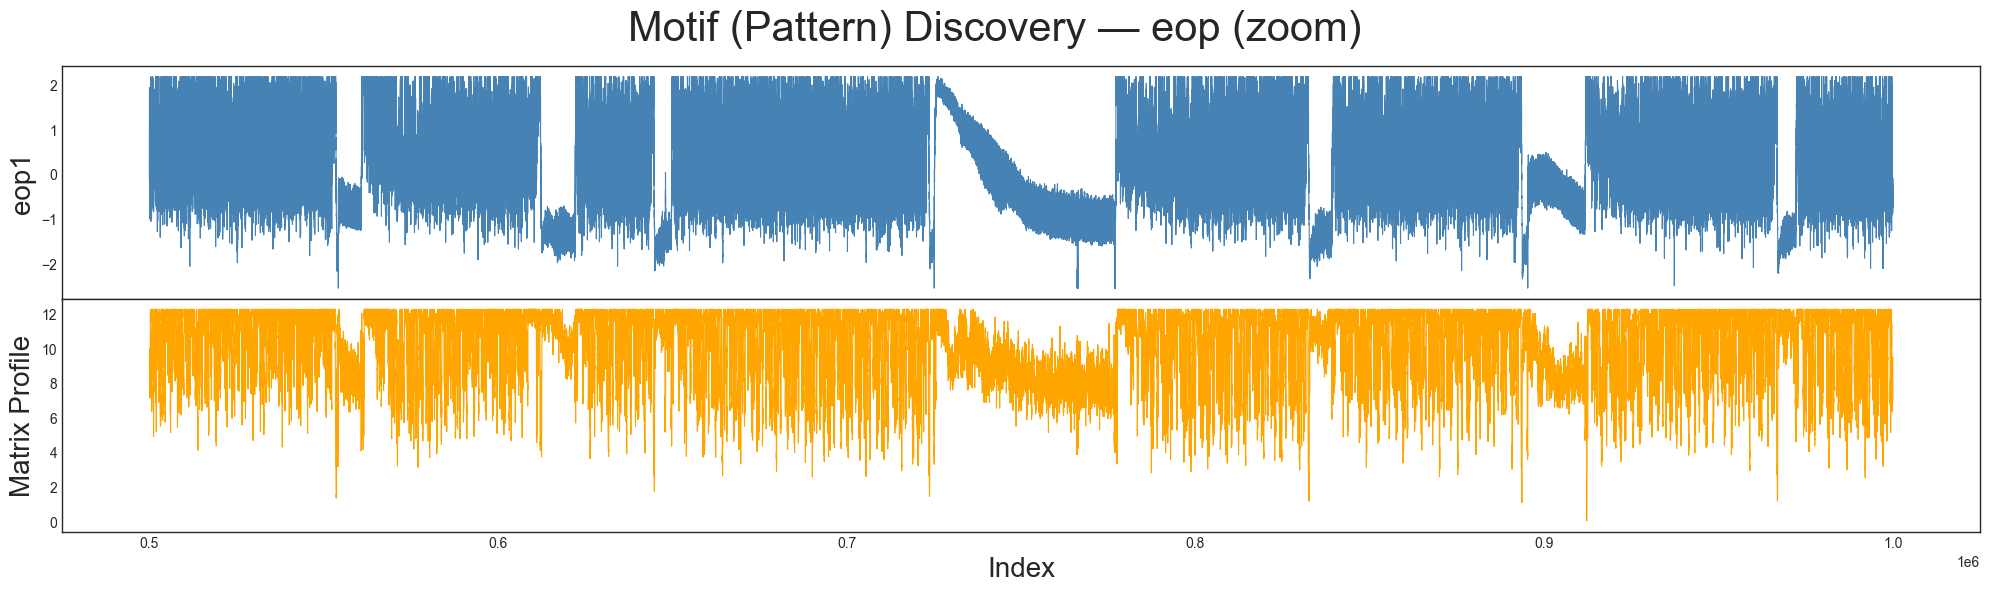

In [90]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — eop (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('eop1', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_eop[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [91]:
serie = df_MP['eop1'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_eop[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [92]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_eop[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1007781
The nearest neighbor subsequence to this discord is 12.2474 units away


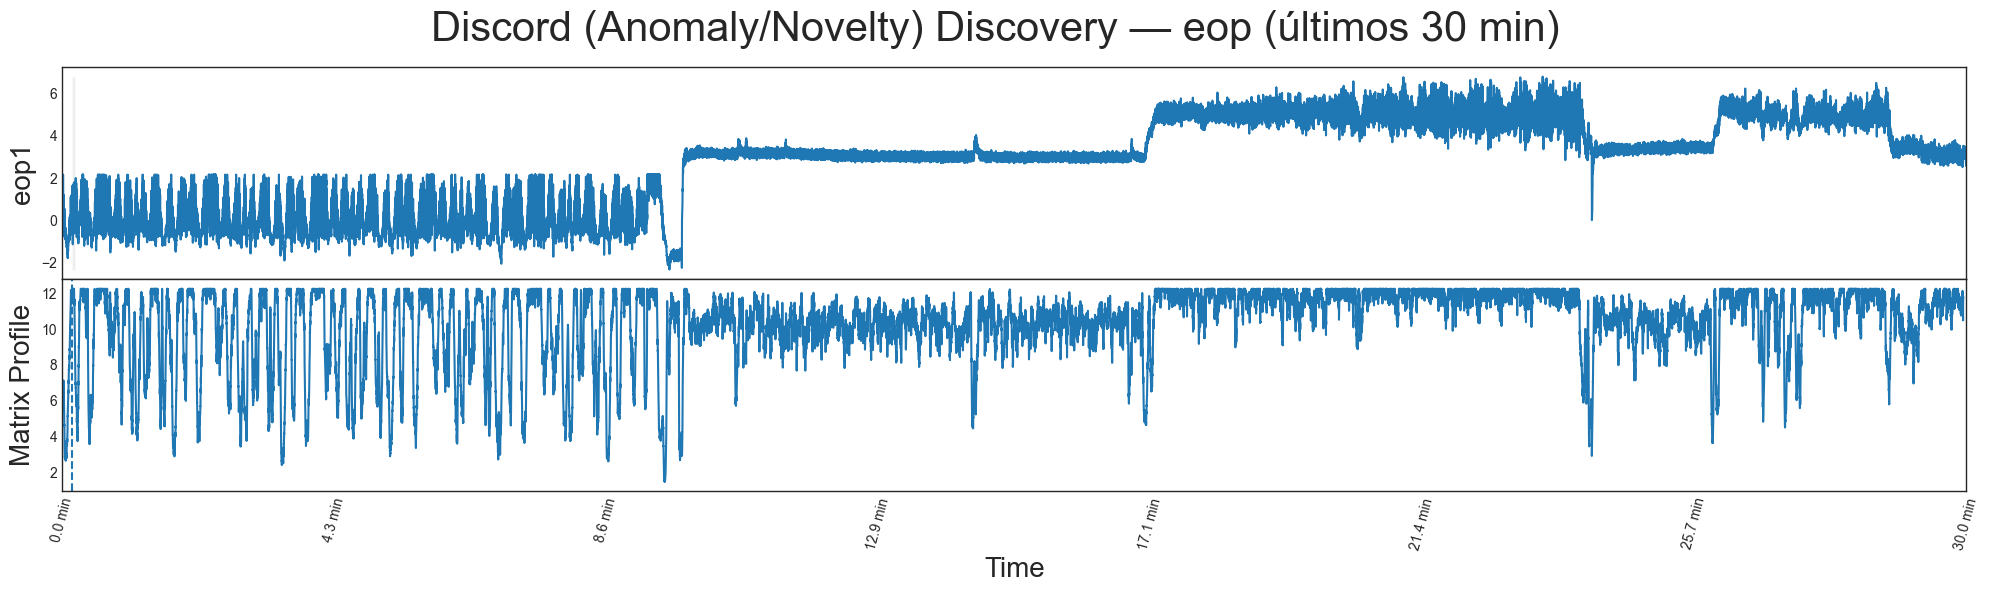

In [93]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — eop (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('eop1', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [77]:
mp_eot= stumpy.stump(df_MP['eot'], m=150)

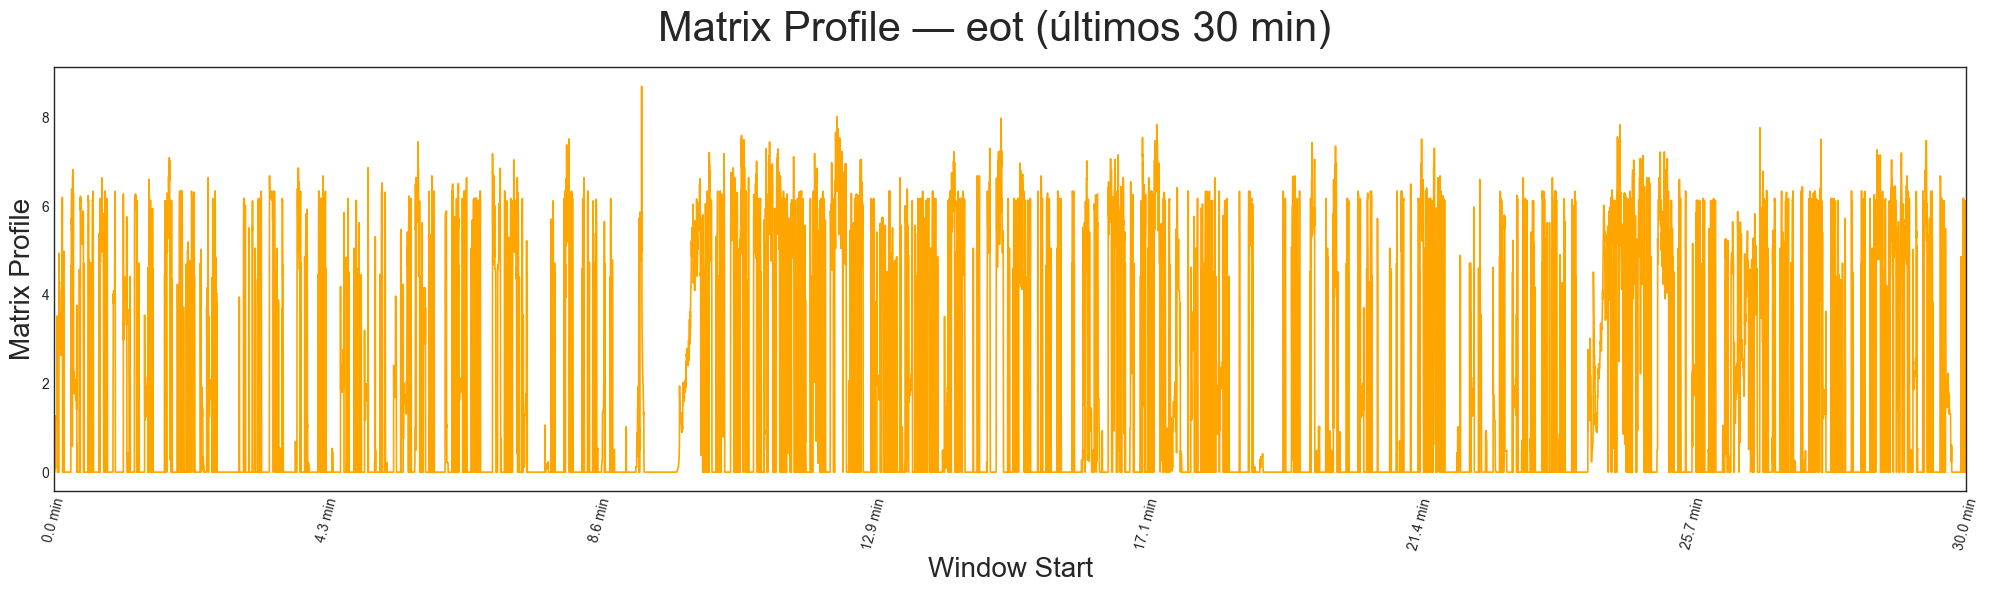

In [78]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_eot[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — eot (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [79]:
# --- motif + vecino más cercano ---
signal = df_MP['eot'].to_numpy()
motif_idx = int(np.argsort(mp_eot[:, 0])[0])
nearest_neighbor_idx = int(mp_eot[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")


The motif is located at index 943535
The nearest neighbor is located at index 943285


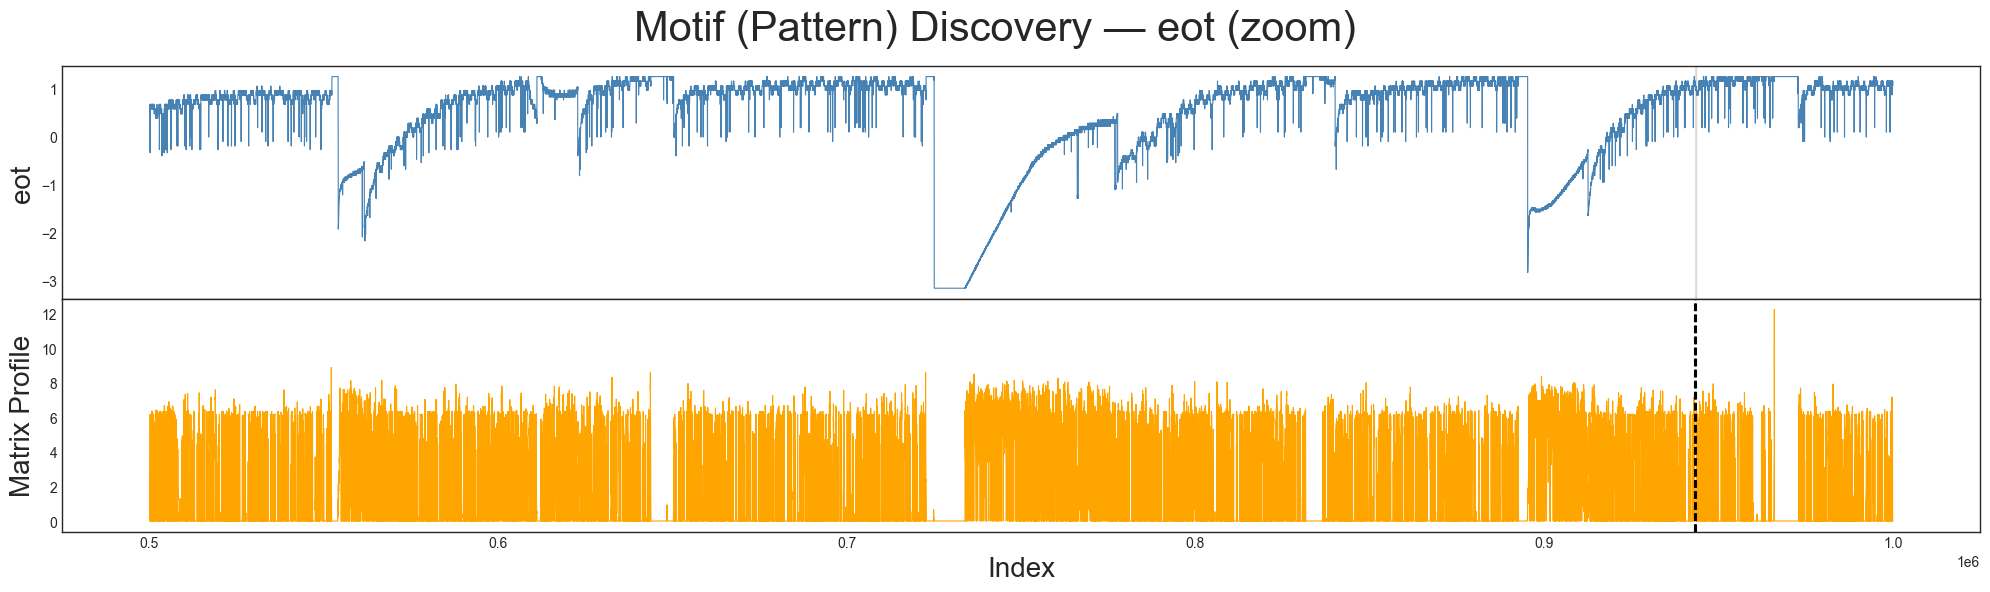

In [80]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — eot (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('eot', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_eot[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [81]:
serie = df_MP['eot'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_eot[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [82]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_eot[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1034817
The nearest neighbor subsequence to this discord is 8.7082 units away


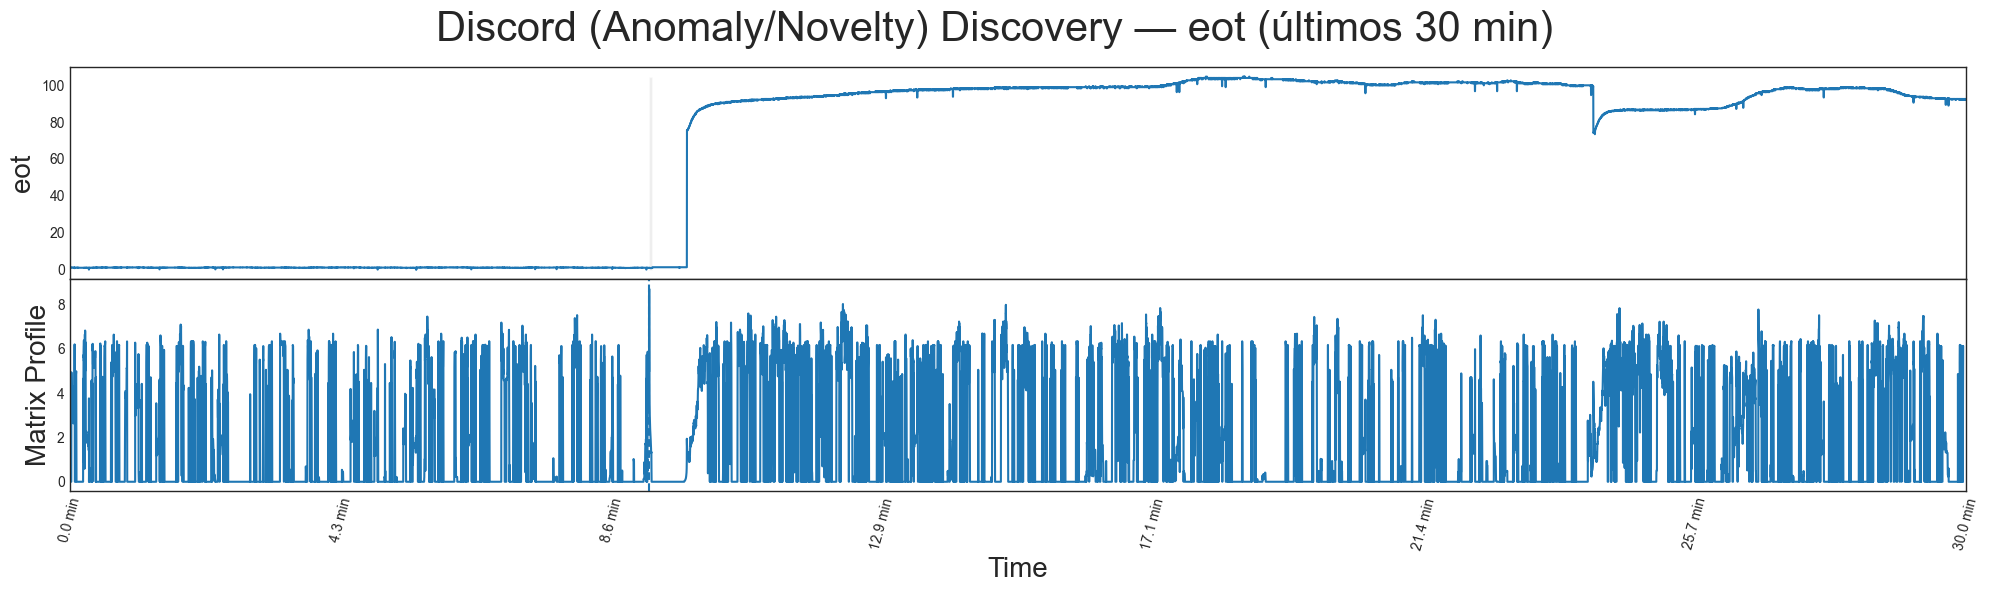

In [83]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — eot (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('eot', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [77]:
mp_gsp= stumpy.stump(df_MP['gsp'], m=150)

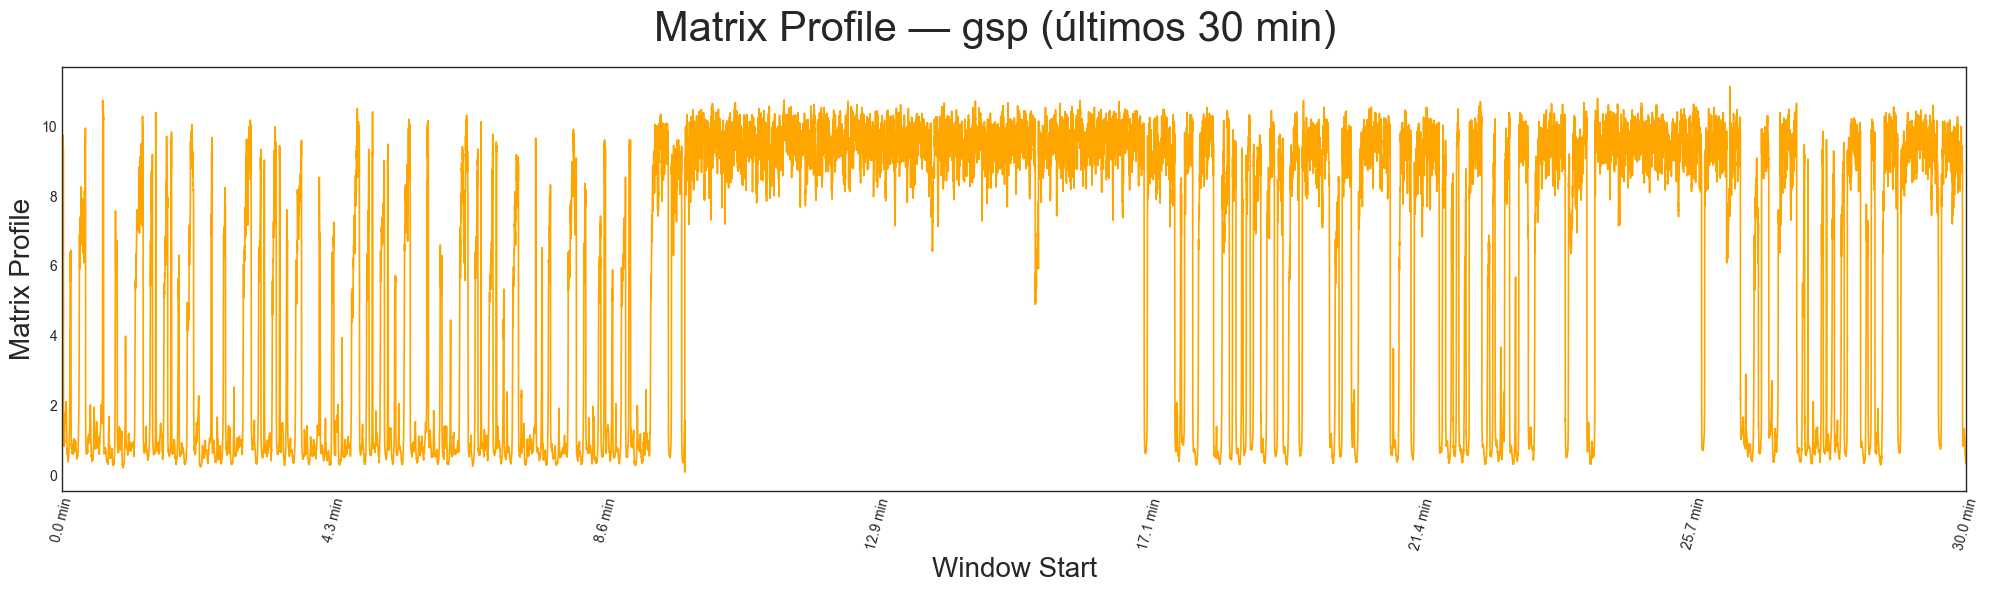

In [78]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_gsp[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — gsp (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [79]:
# --- motif + vecino más cercano ---
signal = df_MP['gsp'].to_numpy()
motif_idx = int(np.argsort(mp_gsp[:, 0])[0])
nearest_neighbor_idx = int(mp_gsp[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")


The motif is located at index 15408
The nearest neighbor is located at index 15447


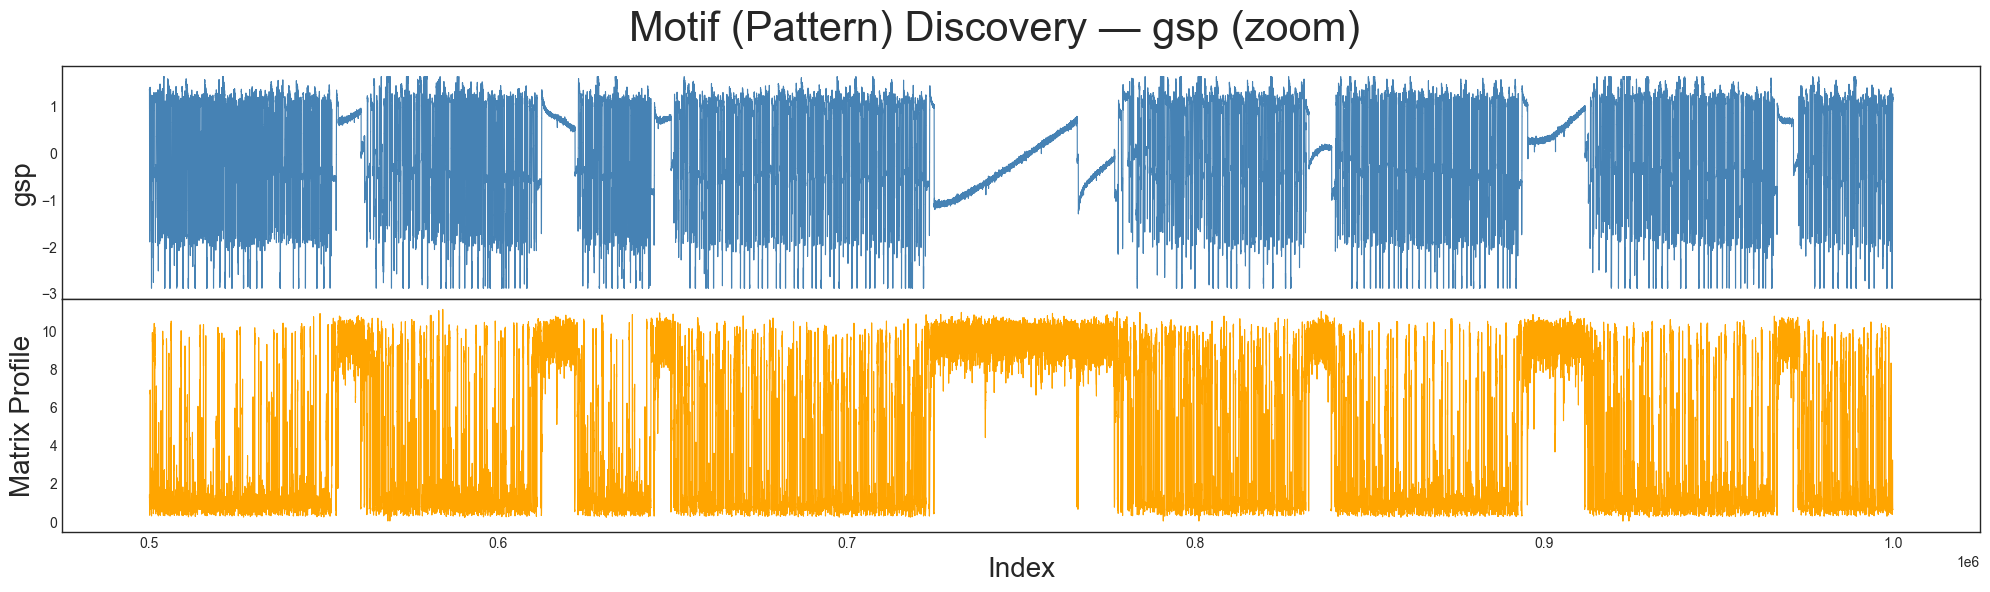

In [80]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — gsp (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('gsp', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_gsp[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [81]:
serie = df_MP['gsp'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_gsp[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [82]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_gsp[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1085992
The nearest neighbor subsequence to this discord is 11.1552 units away


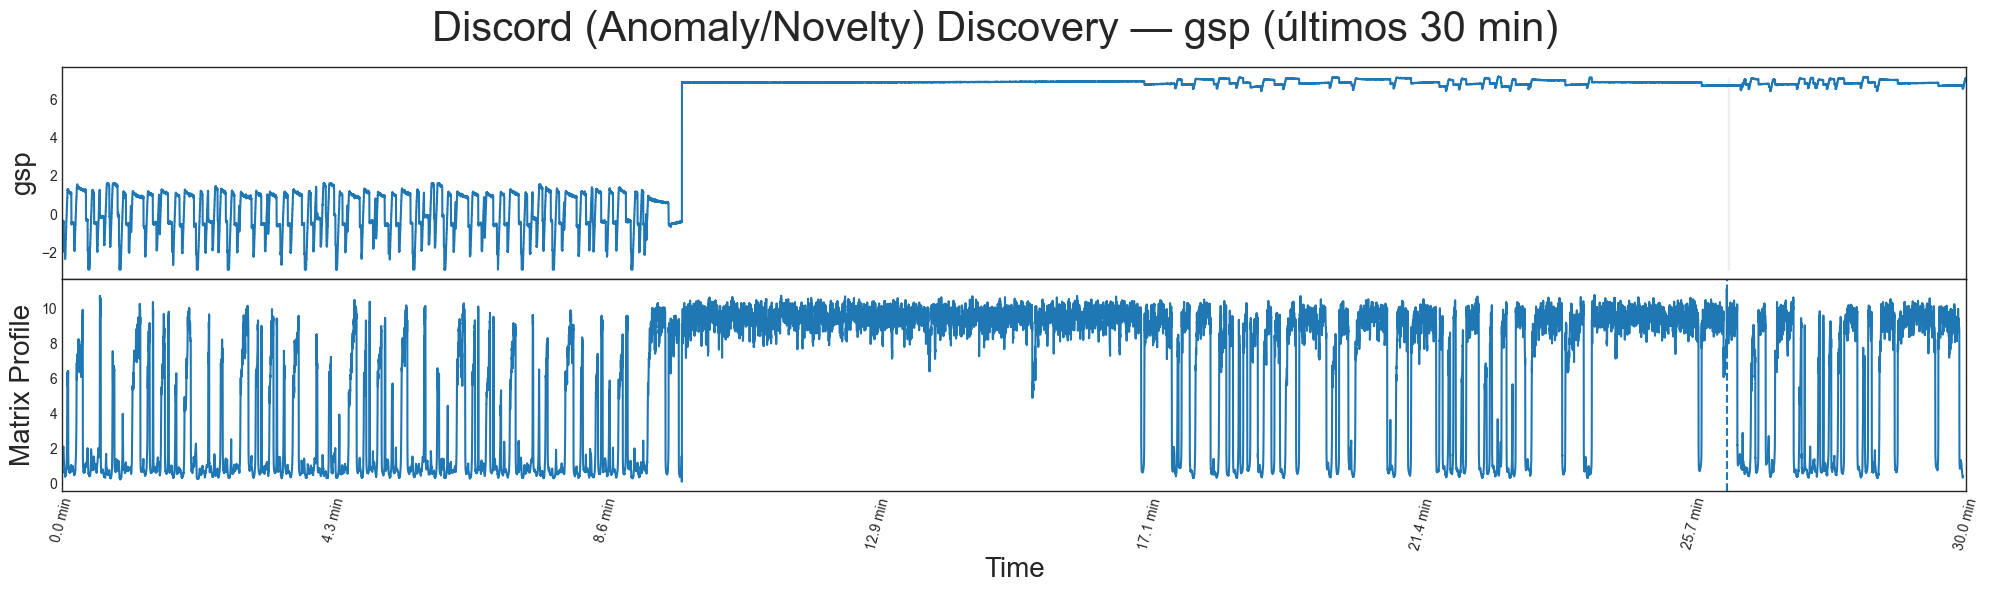

In [83]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — gsp (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('gsp', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [91]:
mp_rpm= stumpy.stump(df_MP['rpm'], m=150)

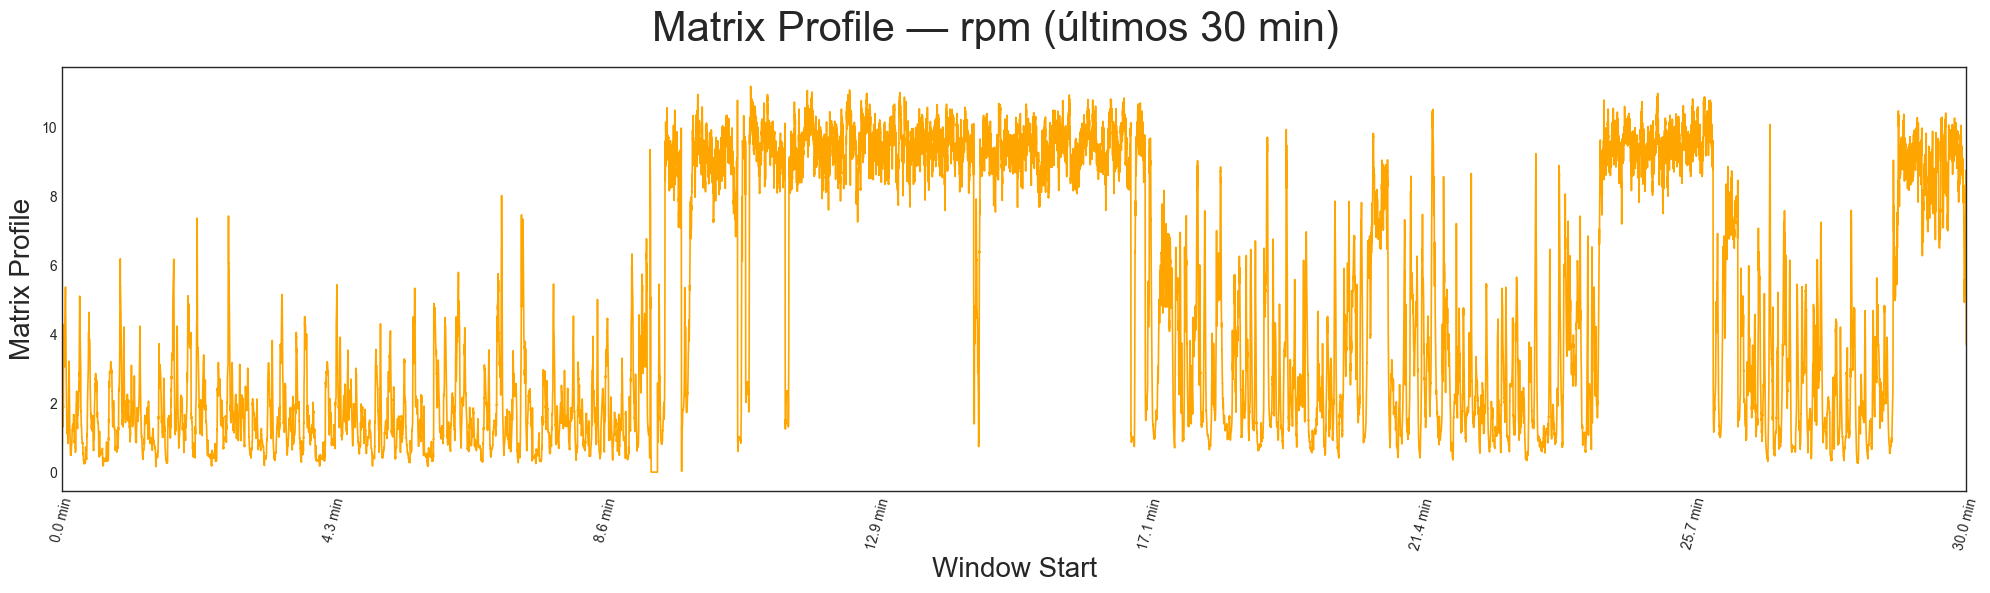

In [92]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_rpm[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — rpm (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [93]:
# --- motif + vecino más cercano ---
signal = df_MP['rpm'].to_numpy()
motif_idx = int(np.argsort(mp_rpm[:, 0])[0])
nearest_neighbor_idx = int(mp_rpm[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")


The motif is located at index 293728
The nearest neighbor is located at index 293689


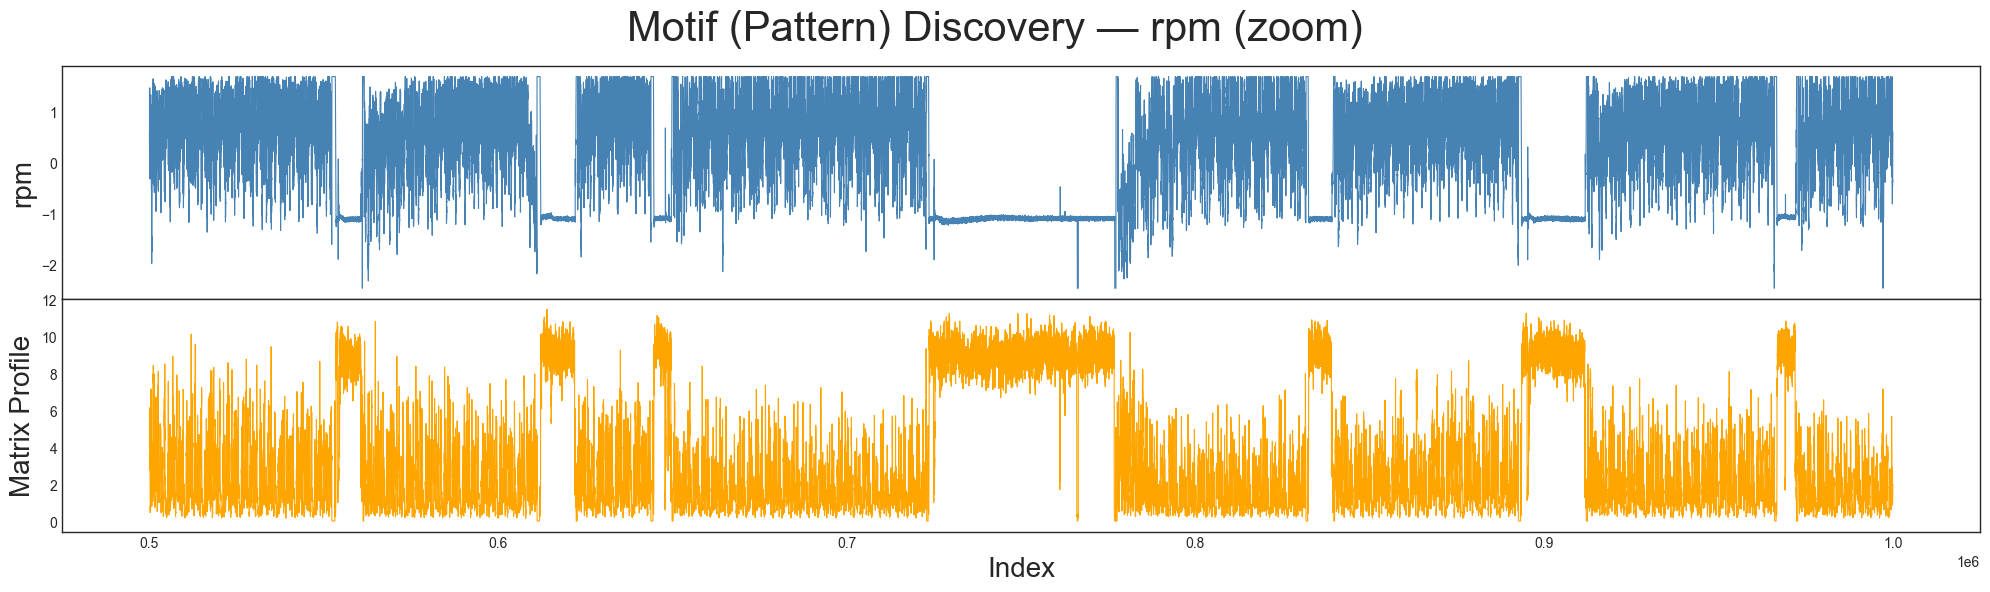

In [94]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — rpm (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('rpm', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_rpm[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [95]:
serie = df_MP['rpm'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_rpm[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [96]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_rpm[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1039717
The nearest neighbor subsequence to this discord is 11.1974 units away


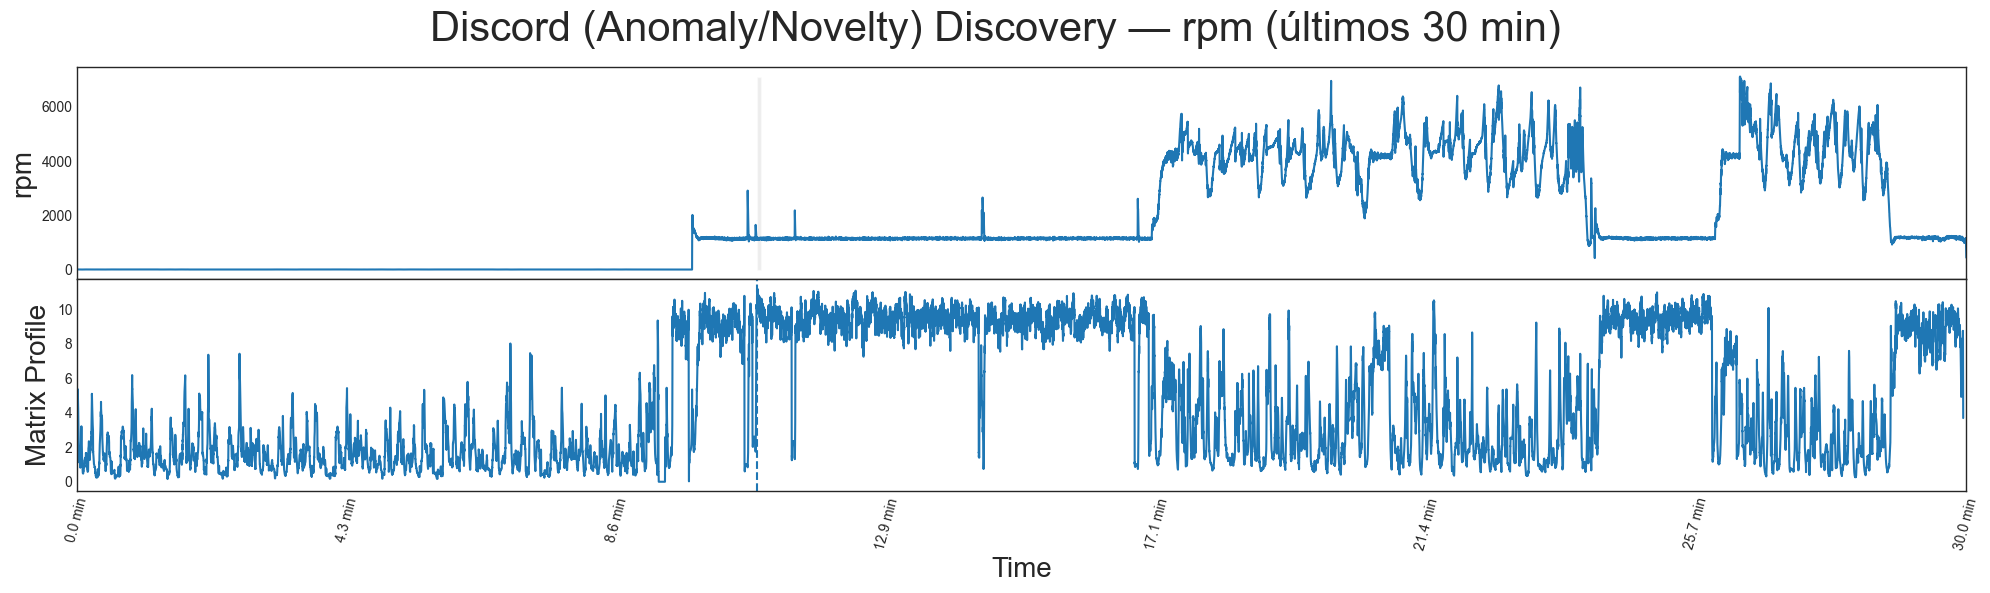

In [97]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — rpm (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('rpm', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [80]:
mp_tps= stumpy.stump(df_MP['tps1'], m=150)

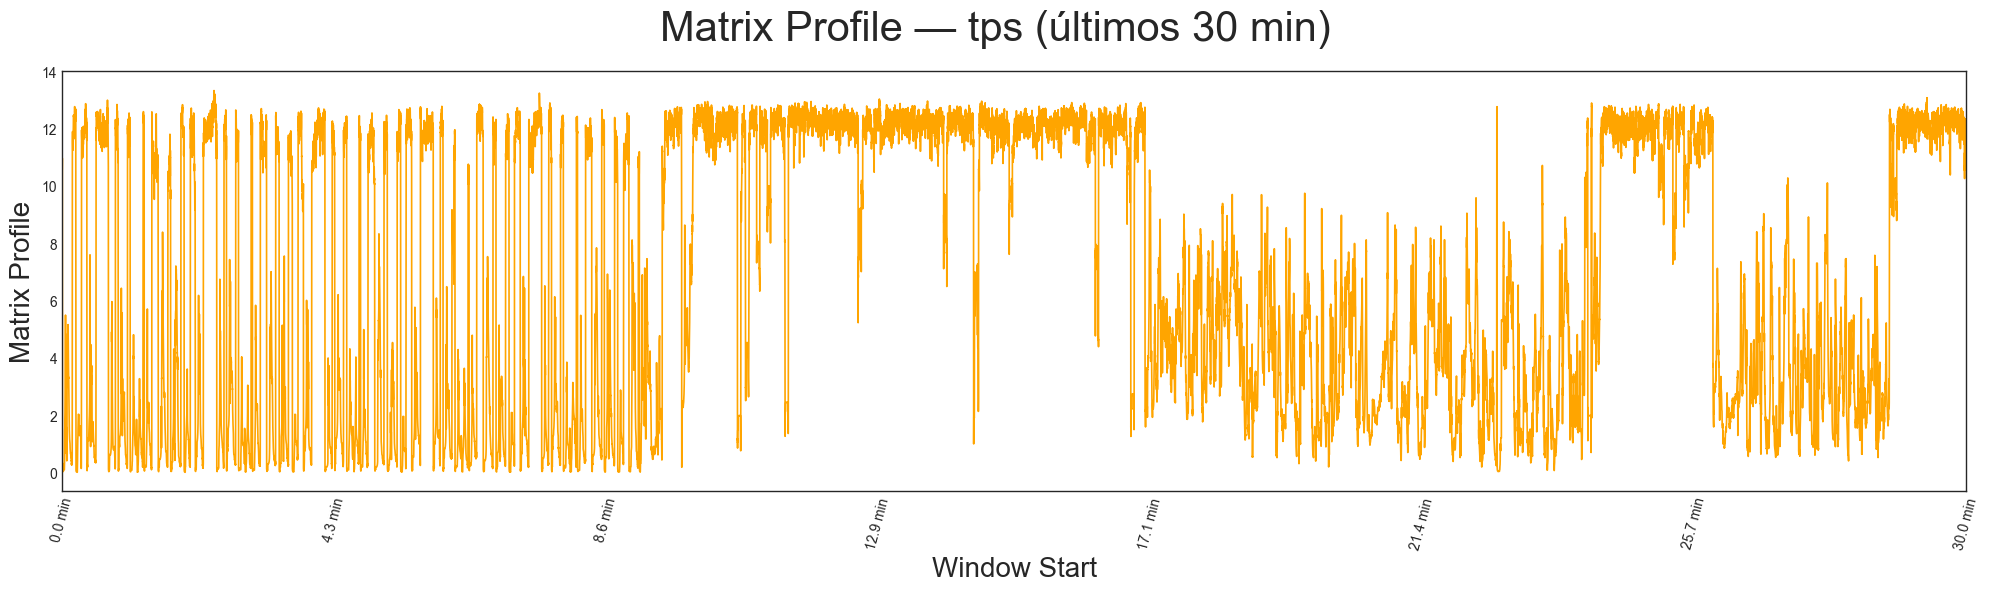

In [81]:
m = 150
FS = 50 
tramo_final = 30 * 60 * FS   # 30 minutos → 90 000 muestras

mp_valores = mp_tps[:, 0]
mp_tramo_final = mp_valores[-tramo_final:]

# índice corregido → mismo tamaño que mp_tramo_final
indice_tramo_final = np.arange(len(mp_valores) - tramo_final, len(mp_valores))

plt.suptitle('Matrix Profile — tps (últimos 30 min)', fontsize=30)
plt.xlabel('Window Start', fontsize=20)
plt.ylabel('Matrix Profile', fontsize=20)
plt.plot(indice_tramo_final, mp_tramo_final, color='orange', linewidth=1.2)

# eje X con minutos
plt.xticks(
    np.linspace(indice_tramo_final[0], indice_tramo_final[-1], 8),
    [f'{i/FS/60:.1f} min' for i in np.linspace(0, tramo_final, 8)]
)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

In [82]:
# --- motif + vecino más cercano ---
signal = df_MP['tps1'].to_numpy()
motif_idx = int(np.argsort(mp_tps[:, 0])[0])
nearest_neighbor_idx = int(mp_tps[motif_idx, 1])

print(f"The motif is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")


The motif is located at index 1012985
The nearest neighbor is located at index 825096


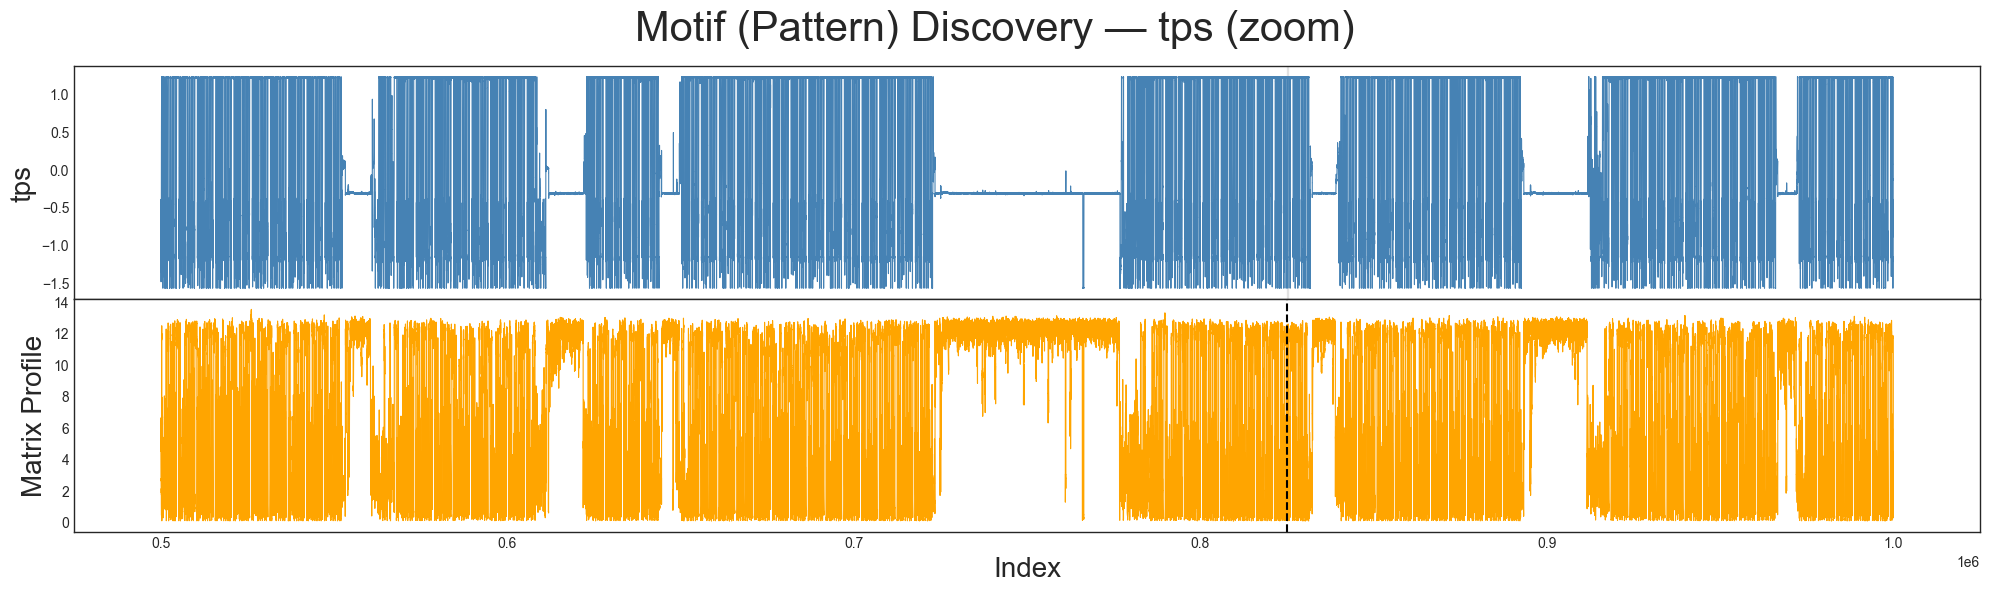

In [83]:
start = 500000
end   = 1000000

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery — tps (zoom)', fontsize=30)

# Señal
axs[0].plot(np.arange(start, end), signal[start:end], color='steelblue', linewidth=0.8)
axs[0].set_ylabel('tps', fontsize=20)

# Rectángulos visibles solo si están dentro del rango
ymin, ymax = np.nanmin(signal[start:end]), np.nanmax(signal[start:end])
if start <= motif_idx <= end:
    axs[0].axvspan(motif_idx, motif_idx + m, color='lightgrey', alpha=0.5)
if start <= nearest_neighbor_idx <= end:
    axs[0].axvspan(nearest_neighbor_idx, nearest_neighbor_idx + m, color='lightgrey', alpha=0.5)

# Matrix Profile
axs[1].plot(np.arange(start, end), mp_tps[start:end, 0], color='orange', linewidth=0.8)
axs[1].set_xlabel('Index', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Líneas verticales si están dentro del rango
if start <= motif_idx <= end:
    axs[1].axvline(motif_idx, linestyle='dashed', color='black')
if start <= nearest_neighbor_idx <= end:
    axs[1].axvline(nearest_neighbor_idx, linestyle='dashed', color='black')

plt.tight_layout()
plt.show()

In [84]:
serie = df_MP['tps1'].values
n = len(serie)

# Ventana de interés: últimos 30 minutos
tramo_final = 30 * 60 * FS
raw_start = max(0, n - tramo_final)
raw_end = n

# --- Matrix Profile: restringimos al tramo final (solo starts contenidos en la ventana) ---
# Los start indices válidos para subsecuencias de longitud m en el último tramo son [raw_start, n-m]
mp_start = raw_start
mp_end = n - m + 1  # exclusivo
mp_segment = mp_tps[mp_start:mp_end, 0]            # valores MP en el tramo final
mp_segment_x = np.arange(mp_start, mp_end)         # índices de inicio (en eje de la serie)


In [85]:
discord_local_idx = int(np.argmax(mp_segment))
discord_start_idx = int(mp_segment_x[discord_local_idx])
nearest_neighbor_distance = float(mp_tps[discord_start_idx, 0])

print(f"The discord (last 30 min) is located at start index {discord_start_idx}")
print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance:.4f} units away")

The discord (last 30 min) is located at start index 1014356
The nearest neighbor subsequence to this discord is 13.3659 units away


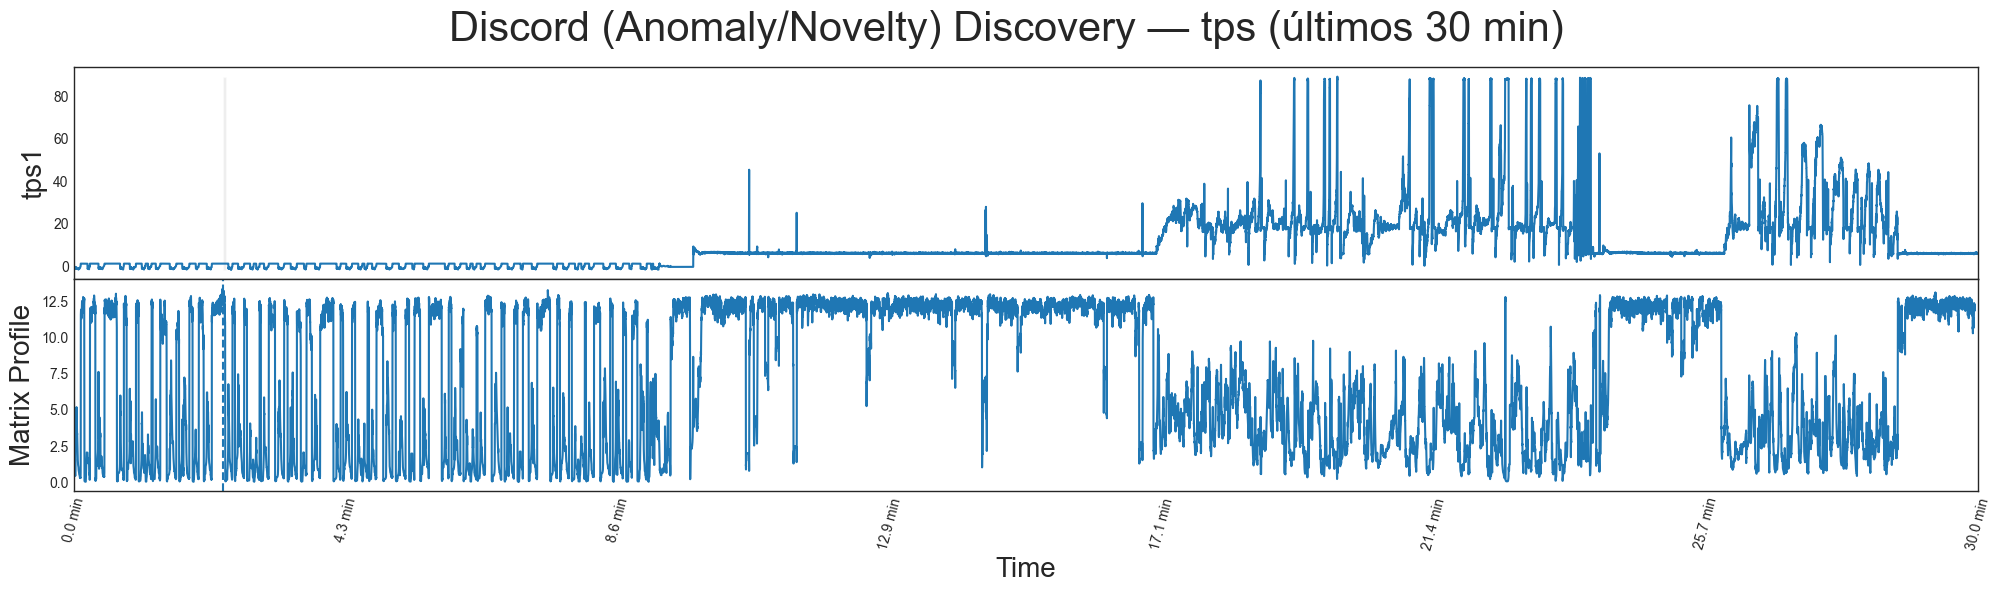

In [86]:
# --- Gráfica: arriba la señal bpr en los últimos 30 min con el rectángulo del discord,
#               abajo la MP del tramo con la línea discontinua ---
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery — tps (últimos 30 min)', fontsize=30)

# Señal bruta
axs[0].plot(np.arange(raw_start, raw_end), serie[raw_start:raw_end])
axs[0].set_ylabel('tps1', fontsize=20)
ymin = np.nanmin(serie[raw_start:raw_end])
ymax = np.nanmax(serie[raw_start:raw_end])
axs[0].add_patch(Rectangle((discord_start_idx, ymin), m, ymax - ymin,
                           facecolor='lightgrey', alpha=0.4, zorder=0))

# Matrix Profile
axs[1].plot(mp_segment_x, mp_segment)
axs[1].axvline(x=discord_start_idx, linestyle="dashed")
axs[1].set_xlabel('Time', fontsize=20)
axs[1].set_ylabel('Matrix Profile', fontsize=20)

# Eje X en minutos relativos 0–30
ticks  = np.linspace(raw_start, raw_end-1, 8)
labels = [f'{(t-raw_start)/FS/60:.1f} min' for t in ticks]
plt.xticks(ticks, labels, rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.tight_layout()
plt.show()

### HTM

El HTM (Hierarchical Temporal Memory) es un modelo inspirado en la neocorteza cerebral.
Su objetivo es aprender patrones temporales secuenciales y detectar anomalías cuando las predicciones esperadas no coinciden con la realidad. La línea de funcionamiento es la siguiente:
1. Encoder: transforma los valores numéricos o categóricos en representaciones binarias (SDRs).
2. Spatial Pooler: aprende las representaciones espaciales estables (patrones de “qué ocurre”).
3. Temporal Memory: aprende la secuencia temporal (patrones de “qué ocurre después”).
4. Anomaly Likelihood: calcula cuán anómalo es cada punto.

In [97]:
import htm
import htm.bindings
from htm.bindings.sdr import SDR
from htm.bindings.algorithms import SpatialPooler, TemporalMemory
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters


El primer paso es buscar un encoder que sea adecuado para el tipo de variables de nuestro dataset. Al disponer de variables numéricas, el mejor encoder es *ScalarEncoder*. 

In [85]:
df_tst_pit.describe().T

count         mean          std          min  \
Time               60713.0   607.140000   350.529556     0.020000   
bpr                60713.0     2.335554     3.153010     0.330000   
eop1               60713.0     4.444598     0.735995     3.439263   
eot                60713.0    98.331840     4.550985    83.559641   
gear               60713.0     1.102449     1.256180     0.000000   
gearShiftDecision  60713.0     0.009948     0.199237     0.000000   
gearShiftState     60713.0     0.035824     0.348724     0.000000   
gsp                60713.0     6.891545     0.111838     6.558000   
gspControl         60713.0     0.035709     0.238056    -1.000000   
lapCount           60713.0     0.308665     0.461947     0.000000   
pitLimitActive     60713.0     0.555202     0.496947     0.000000   
rpm                60713.0  3365.690896  1198.448677  2271.312945   
tps1               60713.0    19.656814    13.456032     5.800000   
session_id         60713.0     1.291585     0.454496     1.000000   

                           25%          50%          75%          max  
Time                303.580000   607.140000   910.700000  1214.260000  
bpr                   0.610000     0.710133     2.410133    14.710000  
eop1                  3.788263     4.224263     5.041000     6.292263  
eot                  95.959641   100.459641   101.559641   103.900000  
gear                  0.000000     1.000000     2.000000     5.000000  
gearShiftDecision     0.000000     0.000000     0.000000     4.000000  
gearShiftState        0.000000     0.000000     0.000000     6.000000  
gsp                   6.839000     6.891602     6.931602     7.147000  
gspControl            0.000000     0.000000     0.000000     1.000000  
lapCount              0.000000     0.000000     1.000000     1.000000  
pitLimitActive        0.000000     1.000000     1.000000     1.000000  
rpm                2348.312945  2407.312945  4436.000000  6204.000000  
tps1                 13.645102    13.845102    20.100000    88.300000  
session_id            1.000000     1.000000     2.000000     2.000000

In [98]:
configuracion_encoder = {}  #vamos a ir añadiendo los distintos encoders

#Los parámetros que controlamos al definir los encoders son:
#   Cada encoder transforma un número (por ejemplo, temperatura = 92.4 ºC) en un vector de n bits, de los cuales sólo w bits son 1s.
#   valor mínimo y máximo (lo observamos en la tab)

# presión del aceite del líquido de caja de cambios
vmin = 6
vmax = 8
configuracion_encoder['gsp'] = dict(n=300, w=15, min=vmin, max=vmax)

# presión del aceite del motor
vmin =2
vmax = 7
configuracion_encoder['eop1'] = dict(n=300, w=15, min=vmin, max=vmax)

# RPM
vmin =2000
vmax = 7000
configuracion_encoder['rpm'] = dict(n=300, w=15, min=vmin, max=vmax)

# Temperaturas
vmin =80
vmax = 135
configuracion_encoder['eot'] = dict(n=300, w=15, min=vmin, max=vmax)

# porcentaje apertura mariposa
vmin= 0
vmax = 100
configuracion_encoder['tps1'] = dict(n=200, w=11, min=vmin, max=vmax)

# variables discretas 
def disc_cfg(serie, n_bits, w):
    vals = sorted(serie.dropna().unique().tolist())
    lo, hi = float(min(vals)), float(max(vals))
    if lo == hi: 
        hi = lo + 1.0  
    return dict(n=n_bits, w=w, min=lo, max=hi)

# gearShiftDecision, gearShiftState y gspControl
for col in ['gearShiftDecision', 'gearShiftState', 'gspControl']:
    configuracion_encoder[col] = disc_cfg(df_tst_pit[col], 200, 11)

# Gear 
configuracion_encoder['gear'] = disc_cfg(df_tr_pit['gear'], n_bits=200, w=11)

# Conjunto de encoders
encoders = {}
for nombre, par in configuracion_encoder.items():
    params = ScalarEncoderParameters()
    params.size       = int(par['n'])
    params.activeBits = int(par['w'])
    params.minimum    = float(par['min'])
    params.maximum    = float(par['max'])
    # opcional:
    # params.clipInput = True
    encoders[nombre] = ScalarEncoder(params)

total_n = int(sum(par['n'] for par in configuracion_encoder.values()))

El Spatial Pooler (SP) recibe un vector binario procedente del encoder y selecciona un pequeño porcentaje de columnas ganadoras (2–3% típicamente). Aprende reforzando sinapsis proximales de las columnas ganadoras hacia los bits de entrada activos. Resultado: una SDR de columnas activas con sparsity estable, que maximiza diferenciación entre patrones similares pero preserva similitud semántica (columnas “parecidas” responden a entradas parecidas). 

La Temporal Memory (TM) aprende secuencias de las SDR generadas por el Spatial Pooler (SP) y mantiene contexto para predecir qué patrones de columnas deberían activarse a continuación. A nivel de neurona HTM, la TM utiliza segmentos distales con sinapsis binarias y un valor de permanencia; cuando el número de sinapsis conectadas activas en un segmento supera un umbral, la celda entra en estado predictivo. Así, una misma columna puede tener varias celdas activas en contextos distintos (memoria de orden variable). El aprendizaje sigue reglas Hebbian-like: sinapsis activas se refuerzan (permanence↑) y las inactivas se debilitan (permanence↓) .


In [99]:
# fijamos los hiperparámetros del modelo

sp = SpatialPooler(
    inputDimensions=[int(total_n)], #longitud del vector de entrada
    columnDimensions=[2048],        #dimensión de la SDR de salida
    potentialPct=0.85,              # % de conexiones posibles entre columnas e inputs. Cuántos bits de entrada puede ver cada columna. 
    potentialRadius=int(total_n),
    globalInhibition=True,          #En global=true, todas las columnas compiten, en local, por vecindarios. Usamos global pues es más simple y funciona bien también
    localAreaDensity=0.0,
    numActiveColumnsPerInhArea=40,  #nºcolumnas activas simultáneamente. Cuántas columnas 'encienden' a la vez, alrededor del 2-3% de 2048  
    synPermActiveInc=0.03,          #Incremento de permanencia al reforzar sinapsis activas, ie, qué rápido aprende un patrón. Si se ponen valores mayores, el modelo tiende a sobreajustar
    synPermInactiveDec=0.015,       #Qué rapido olvida patrones antiguos. Cuanto más bajo, la memoria es más estable.
    synPermConnected=0.1,           #Ya viene por defecto en el modelo. Umbral para considerar una sinapsis 'conectada'. Determina cuándo una conexión es funcional, se fija el valor estándar
    boostStrength=1.0,              # 0 desactiva boost; 1.0 está bien al inicio
    seed =57
)



tm = TemporalMemory(
    columnDimensions=[2048],       #Debe coincidir con las columnas del SP. Define el espacio de entrada temporal
    cellsPerColumn=32,              #nº de celdas por columna. Capacidad para representar distintos contextos dentro de la misma columna. Más celdas implican más transiciones de alto orden que el modelo puede distinguir
    activationThreshold=17,         #nº sinapsis conectadas activa. Subirlo reduce predicciones débiles y bajarlo hace la TM más sensible
    minThreshold=10,                #nº mínimo de sinapsis potenciales activas para que un segmento cuente como matching y pueda crecer o ajustar la sinapsis. Controla cuándo formar o actualizar contexto nuevo durante bursting
    maxNewSynapseCount=25,          #nºmáximo de sinapsis nuevas que se añaden en el segmento ganador al aprender un contexto nuevo. 
    initialPermanence=0.21,         #permanencia inicial de sinapsis nuevas
    connectedPermanence=0.50,        #umbral para considerar las sinapsis conectadas
    permanenceIncrement = 0.10,      #tasa de refuerzo distal
    permanenceDecrement= 0.05,      #tasa de debilitamiento distal
    seed = 99
)


In [100]:
ncols = int(sp.getColumnDimensions()[0])
CELLS_PER_COLUMN = int(32) 


def encode_row_sdr(row):
    active = []
    offset = 0
    for name, enc in encoders.items():
        v = float(row[name])
        out = enc.encode(v)

        if hasattr(out, "sparse"):                # SDR
            idx = np.asarray(out.sparse, dtype=np.int32)
            enc_size = getattr(out, "size", None) or getattr(enc, "size", None)
        elif isinstance(out, np.ndarray):         # vector 0/1
            idx = np.flatnonzero(out).astype(np.int32)
            enc_size = out.size
        else:                                     # lista de índices
            idx = np.asarray(out, dtype=np.int32)
            enc_size = getattr(enc, "size", None)

        if enc_size is None:
            try:
                enc_size = int(configuracion_encoder[name]['n'])
            except Exception:
                raise ValueError(f"No se pudo inferir el tamaño del encoder para '{name}'.")

        active.extend((idx + offset).tolist())
        offset += int(enc_size)

    s = SDR(total_n)
    s.sparse = np.asarray(active, dtype=np.int32)
    return s


def sp_compute_sdr(x_sdr, learn=True):
    active_cols = SDR(ncols)
    sp.compute(x_sdr, learn, active_cols)
    return active_cols


def predictive_columns_from_tm(tm_obj):
    pc = tm_obj.getPredictiveCells()  # requiere activateDendrites() antes
    if hasattr(pc, "sparse"):
        idx_cells = np.asarray(pc.sparse, dtype=np.int32)
    elif isinstance(pc, np.ndarray):
        idx_cells = pc.astype(np.int32)
    else:
        idx_cells = np.asarray(pc, dtype=np.int32)

    cpc = getattr(tm_obj, "cellsPerColumn", CELLS_PER_COLUMN) or CELLS_PER_COLUMN
    return set((idx_cells // int(cpc)).tolist())


def anomaly_from_prediction(active_cols_sdr, predicted_cols_prev):
    act = set(active_cols_sdr.sparse.tolist())
    if not act:
        return 0.0
    miss = len(act - predicted_cols_prev)
    return miss / float(len(act))


def training(df):
    an_scores = []
    pred_cols_prev = set()
    sample_counts = []

    tm.reset()  # importante: estado limpio

    for i, (_, r) in enumerate(df.iterrows()):
        x = encode_row_sdr(r)
        active_cols = sp_compute_sdr(x, learn=True)

        # a) predicciones de t basadas en t-1
        tm.activateDendrites(learn=True)
        predicted_cols = predictive_columns_from_tm(tm)

        # anomalía en t vs predicción de t-1
        an_scores.append(anomaly_from_prediction(active_cols, pred_cols_prev))

        # c) aplicar entrada de t y aprender
        tm.activateCells(active_cols, learn=True)

        # book-keeping
        if i < 200:
            sample_counts.append(len(active_cols.sparse))
        pred_cols_prev = predicted_cols

    if sample_counts:
        print(f"Sparsity SP media (primeras 200 muestras): {np.mean(sample_counts):.1f} columnas activas")
    return np.asarray(an_scores, dtype=np.float32)


def validating(df):
    an_scores = []
    pred_cols_prev = set()

    tm.reset()

    for _, r in df.iterrows():
        x = encode_row_sdr(r)
        active_cols = sp_compute_sdr(x, learn=False)

        # predicciones sin aprendizaje
        tm.activateDendrites(learn=False)
        predicted_cols = predictive_columns_from_tm(tm)

        an_scores.append(anomaly_from_prediction(active_cols, pred_cols_prev))

        tm.activateCells(active_cols, learn=False)

        pred_cols_prev = predicted_cols

    return np.asarray(an_scores, dtype=np.float32)

In [101]:
anomaly_train = training(df_tr_pit)

Sparsity SP media (primeras 200 muestras): 40.0 columnas activas


In [102]:
anomaly_val   = validating(df_tst_pit)

In [103]:
print(anomaly_train.shape, anomaly_val.shape)

(1036603,) (60713,)


In [104]:
# =======================================
# Visualización posterior a la evaluación
# =======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- helpers básicos ----------
def moving_avg(x, w=25):
    x = np.asarray(x, dtype=float)
    if len(x) == 0 or w <= 1: 
        return x
    return np.convolve(x, np.ones(w)/w, mode='same')

def anomaly_likelihood(x, w_short=10, w_long=200, eps=1e-6):
    """
    Likelihood ligera estilo Numenta:
      - media y sigma de ventana larga
      - z-score de media de ventana corta
      - compresión 1-exp(-z+)
    """
    x = np.asarray(x, dtype=float)
    s = pd.Series(x)
    mu = s.rolling(w_long, min_periods=max(5, w_long//10)).mean()
    sd = s.rolling(w_long, min_periods=max(5, w_long//10)).std().replace(0, eps)
    z  = (s.rolling(w_short, min_periods=max(3, w_short//2)).mean() - mu) / sd
    z  = z.fillna(0.0).to_numpy()
    z_pos = np.clip(z, 0, None)
    return 1.0 - np.exp(-z_pos)

def auto_threshold(x, q=0.98):
    """ Umbral por cuantil; devuelve (tau, idx_mayores). """
    x = np.asarray(x, dtype=float)
    if x.size == 0:
        return 1.0, np.array([], dtype=int)
    tau = float(np.quantile(x, q))
    idx = np.flatnonzero(x > tau)
    return tau, idx

def precision_recall_f1(y_true, y_score, tau):
    """ Métricas sencillas si hay etiquetas (0/1). """
    yt = np.asarray(y_true, dtype=int)
    yp = (np.asarray(y_score) > float(tau)).astype(int)
    tp = int(((yt==1) & (yp==1)).sum())
    fp = int(((yt==0) & (yp==1)).sum())
    fn = int(((yt==1) & (yp==0)).sum())
    prec = tp / (tp + fp) if (tp+fp)>0 else 0.0
    rec  = tp / (tp + fn) if (tp+fn)>0 else 0.0
    f1   = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0.0
    return prec, rec, f1

# ---------- 1) Curvas de anomalía (train/val) ----------
def plot_anomaly_series(df_tr, anomaly_train, df_va=None, anomaly_val=None,
                        use_likelihood=True, smooth_w=25, q_tau=0.98,
                        title_prefix="HTM – Detección de anomalías"):
    """
    Dibuja anomalía (bruta), suavizada y (opcional) likelihood para train/val.
    Marca picos según cuantil q_tau.
    """
    # TRAIN
    an_tr = np.asarray(anomaly_train, dtype=float)
    sm_tr = moving_avg(an_tr, w=smooth_w)
    lk_tr = anomaly_likelihood(an_tr) if use_likelihood else an_tr
    tau_tr, peaks_tr = auto_threshold(lk_tr, q=q_tau)

    fig, axs = plt.subplots(
        2 if anomaly_val is not None else 1, 1,
        figsize=(12, 6 if anomaly_val is None else 10),
        sharex=False, facecolor='white'
    )
    if not isinstance(axs, np.ndarray):
        axs = np.array([axs])

    # --- ENTRENAMIENTO ---
    ax = axs[0]
    ax.plot(an_tr, color="#7f7f7f", linewidth=0.8, label='Anomalía (bruta)')
    ax.plot(sm_tr, color="#1f77b4", linewidth=1.0,
            label=f'Anomalía suavizada (w={smooth_w})')
    if use_likelihood:
        ax.plot(lk_tr, color="#d62728", linewidth=1.2, label='Anomaly likelihood')
        ax.axhline(tau_tr, color="#2ca02c", linestyle='--', linewidth=1.0,
                   label=f'Umbral {q_tau*100:.0f}%', alpha=0.8)
        ax.scatter(peaks_tr, lk_tr[peaks_tr], color="#d62728", marker='o', s=18,
                   label='Picos > umbral')
    ax.set_title(f"{title_prefix} – Entrenamiento", fontsize=11)
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.25)
    ax.legend(loc='upper right', fontsize=9, frameon=True)

    # --- VALIDACIÓN ---
    if anomaly_val is not None:
        an_va = np.asarray(anomaly_val, dtype=float)
        sm_va = moving_avg(an_va, w=smooth_w)
        lk_va = anomaly_likelihood(an_va) if use_likelihood else an_va
        tau_va, peaks_va = auto_threshold(lk_va, q=q_tau)

        ax = axs[1]
        ax.plot(an_va, color="#7f7f7f", linewidth=0.8, label='Anomalía (bruta)')
        ax.plot(sm_va, color="#1f77b4", linewidth=1.0,
                label=f'Anomalía suavizada (w={smooth_w})')
        if use_likelihood:
            ax.plot(lk_va, color="#d62728", linewidth=1.2, label='Anomaly likelihood')
            ax.axhline(tau_va, color="#2ca02c", linestyle='--', linewidth=1.0,
                       label=f'Umbral {q_tau*100:.0f}%', alpha=0.8)
            ax.scatter(peaks_va, lk_va[peaks_va], color="#d62728", marker='o', s=18,
                       label='Picos > umbral')
        ax.set_title(f"{title_prefix} – Validación", fontsize=11)
        ax.set_xlabel("Índice temporal")
        ax.set_ylabel("Score")
        ax.grid(True, alpha=0.25)
        ax.legend(loc='upper right', fontsize=9, frameon=True)

    plt.tight_layout()
    plt.show()


# ---------- 2) Overlay señal + anomalía ----------
def plot_overlay_signal_anomaly(df, anomaly, signal_name,
                                use_likelihood=True, smooth_w=25, q_tau=0.98,
                                title="Señal vs Anomalía"):
    """
    Superpone una señal concreta con la anomalía/likelihood y marca picos.
    """
    assert signal_name in df.columns, f"{signal_name} no está en el DataFrame."

    sig = df[signal_name].astype(float).to_numpy()
    an  = np.asarray(anomaly, dtype=float)
    lk  = anomaly_likelihood(an) if use_likelihood else an
    tau, peaks = auto_threshold(lk, q=q_tau)

    # Normalizar señal para comparar
    sig_norm = (sig - np.nanmin(sig)) / (np.nanmax(sig) - np.nanmin(sig) + 1e-9)

    fig, ax1 = plt.subplots(figsize=(12, 5), facecolor='white')

    # Señal principal (azul)
    ax1.plot(sig_norm, color="#1f77b4", linewidth=1.3, label=f'{signal_name} (normalizada)')
    ax1.set_ylabel(signal_name, color="#1f77b4", fontsize=10)
    ax1.tick_params(axis='y', labelcolor="#1f77b4")
    ax1.grid(True, alpha=0.2)

    # Anomaly likelihood (rojo) en eje secundario
    ax2 = ax1.twinx()
    ax2.plot(lk, color="#d62728", linewidth=1.4,
             label='Anomaly likelihood' if use_likelihood else 'Anomalía')
    ax2.axhline(tau, color="#2ca02c", linestyle='--', linewidth=1.2,
                label=f'Umbral {q_tau*100:.0f}%')
    ax2.scatter(peaks, lk[peaks], color="#d62728", marker='o', s=25, alpha=0.8,
                label='Picos detectados')
    ax2.set_ylabel('Anomalía / Likelihood', color="#d62728", fontsize=10)
    ax2.tick_params(axis='y', labelcolor="#d62728")

    # Leyenda combinada
    lines, labels = [], []
    for ax in (ax1, ax2):
        L = ax.get_lines()
        lines += L
        labels += [l.get_label() for l in L]
    ax1.legend(lines, labels, loc='upper right', frameon=True, fontsize=9)

    plt.title(title, fontsize=12, pad=12)
    plt.tight_layout()
    plt.show()

# ---------- 3) Histogramas / distribución ----------
def plot_anomaly_distributions(anomaly_train, anomaly_val=None, use_likelihood=True, bins=50):
    an_tr = np.asarray(anomaly_train, dtype=float)
    lk_tr = anomaly_likelihood(an_tr) if use_likelihood else an_tr

    fig, axs = plt.subplots(1, 2 if anomaly_val is not None else 1, figsize=(12,4))
    if not isinstance(axs, np.ndarray):
        axs = np.array([axs])

    axs[0].hist(lk_tr, bins=bins, alpha=0.85)
    axs[0].set_title('Distribución – Entrenamiento')
    axs[0].set_xlabel('Anomaly likelihood' if use_likelihood else 'Anomalía')
    axs[0].set_ylabel('Frecuencia')
    axs[0].grid(True, alpha=0.2)

    if anomaly_val is not None:
        an_va = np.asarray(anomaly_val, dtype=float)
        lk_va = anomaly_likelihood(an_va) if use_likelihood else an_va
        axs[1].hist(lk_va, bins=bins, alpha=0.85)
        axs[1].set_title('Distribución – Validación')
        axs[1].set_xlabel('Anomaly likelihood' if use_likelihood else 'Anomalía')
        axs[1].set_ylabel('Frecuencia')
        axs[1].grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show()

# ---------- 4) Top picos: tabla/inspección ----------
def inspect_top_peaks(df, anomaly, top_k=20, use_likelihood=True, q_tau=None):
    """
    Devuelve un DataFrame con las filas de mayor anomalía (o > umbral si se da q_tau).
    Útil para ver valores de variables en los picos.
    """
    an = np.asarray(anomaly, dtype=float)
    score = anomaly_likelihood(an) if use_likelihood else an

    if q_tau is not None:
        tau, idx = auto_threshold(score, q=q_tau)
        top_idx = idx
    else:
        top_idx = np.argsort(-score)[:top_k]

    out = df.iloc[top_idx].copy()
    out.insert(0, 'anomaly_score', score[top_idx])
    out.insert(1, 'rank', np.arange(1, len(top_idx)+1))
    return out.sort_values('rank')

# ---------- 5) Todas las variables (panorámica) ----------
def plot_all_variables(df, max_plots=12, normalize=True, smooth_w=None, title="Variables (panorámica)"):
    """
    Muestra hasta max_plots variables en una rejilla.
    Si normalize=True, cada variable se escala 0-1 para compararlas.
    """
    cols = list(df.columns)[:max_plots]
    m = len(cols)
    ncols = 3
    nrows = int(np.ceil(m / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 2.6*nrows), sharex=True)
    axes = np.ravel(axes)

    for i, c in enumerate(cols):
        y = df[c].astype(float).to_numpy()
        if normalize:
            y = (y - np.nanmin(y)) / (np.nanmax(y) - np.nanmin(y) + 1e-9)
        if smooth_w and smooth_w > 1:
            y = moving_avg(y, w=smooth_w)
        axes[i].plot(y, linewidth=1)
        axes[i].set_title(c)
        axes[i].grid(True, alpha=0.2)

    # eliminar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()




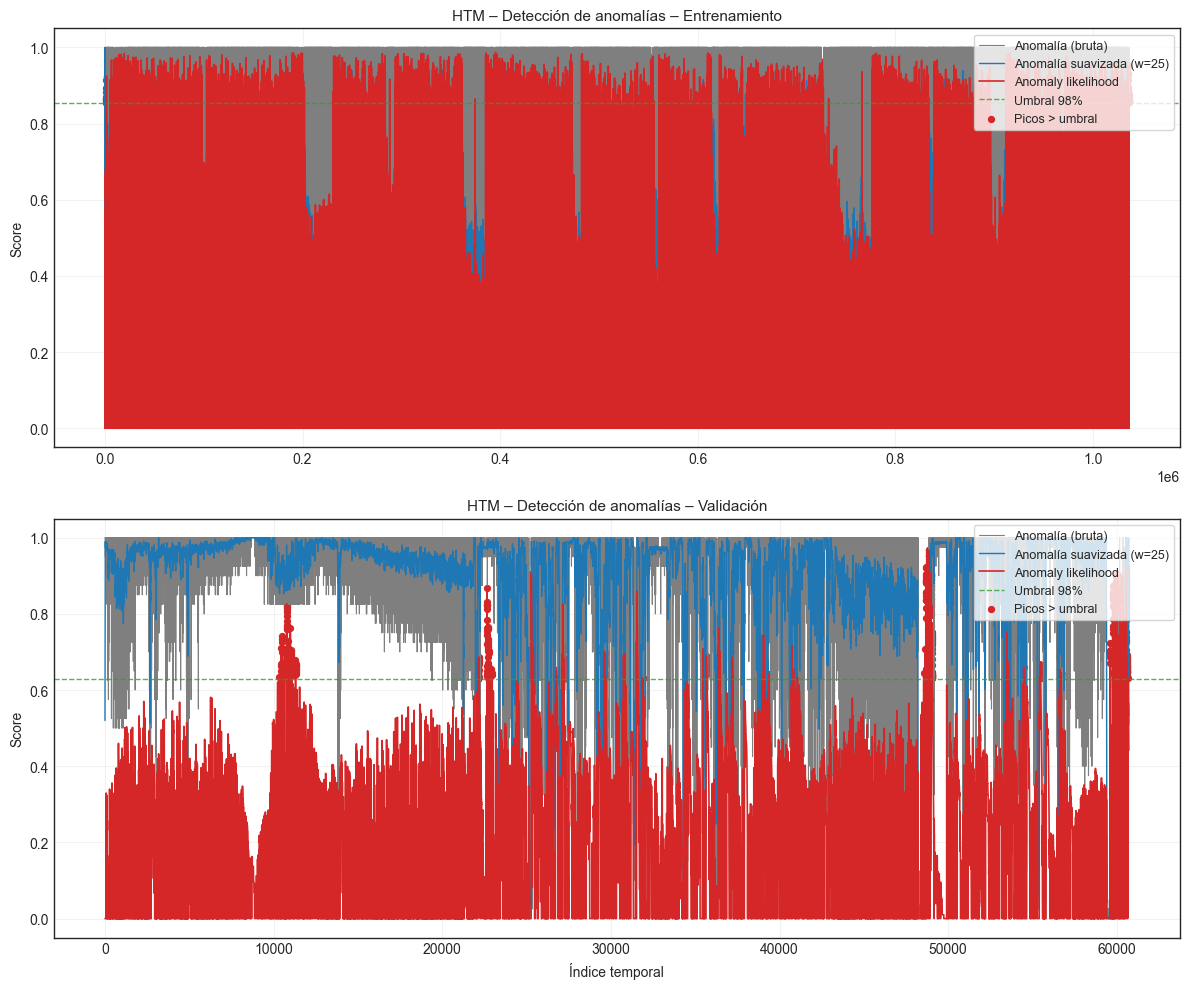

In [105]:
# 1) Curvas principales:
plot_anomaly_series(df_tr_pit, anomaly_train, df_tst_pit, anomaly_val, use_likelihood=True, q_tau=0.98)


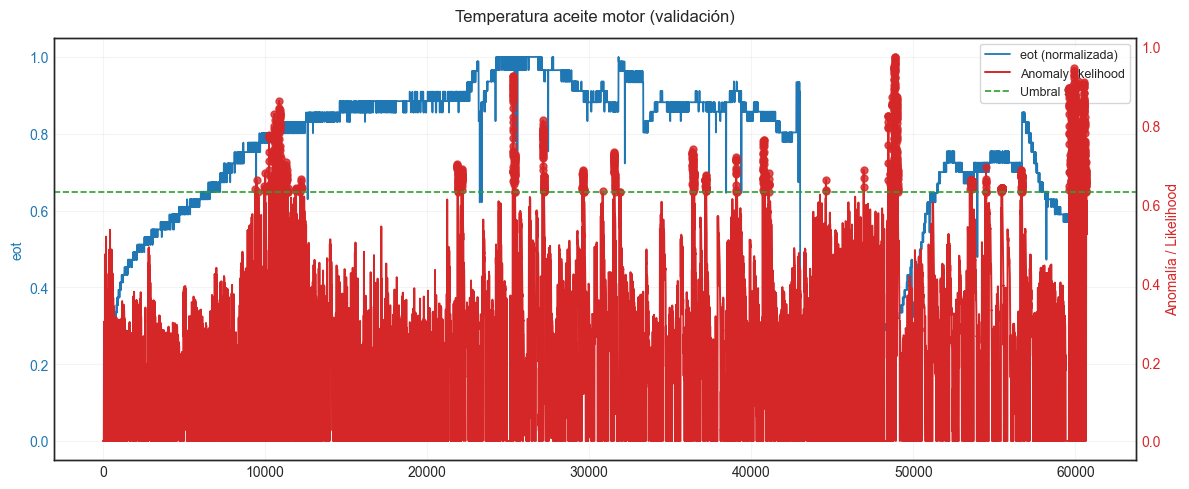

In [121]:
# 2) Overlay con una señal clave:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='eot', use_likelihood=True, q_tau=0.98, title='Temperatura aceite motor (validación)')


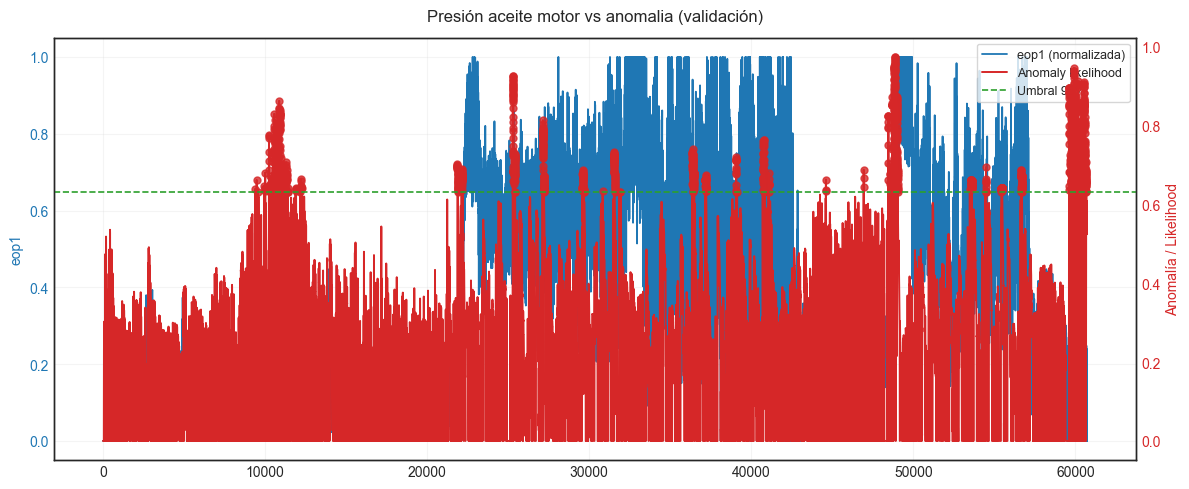

In [124]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='eop1', use_likelihood=True, q_tau=0.98, title='Presión aceite motor vs anomalia (validación)')


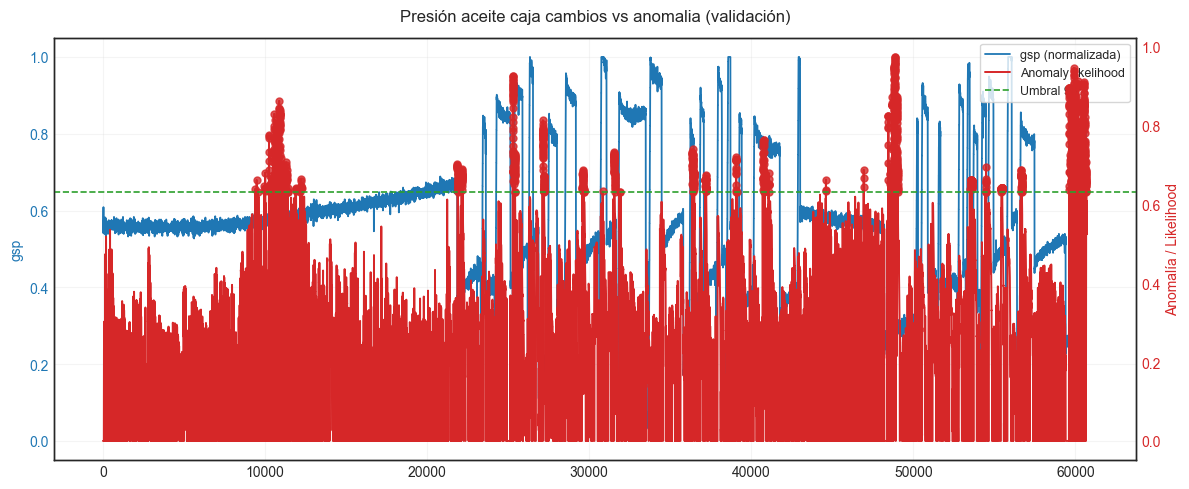

In [122]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='gsp', use_likelihood=True, q_tau=0.98, title='Presión aceite caja cambios vs anomalia (validación)')


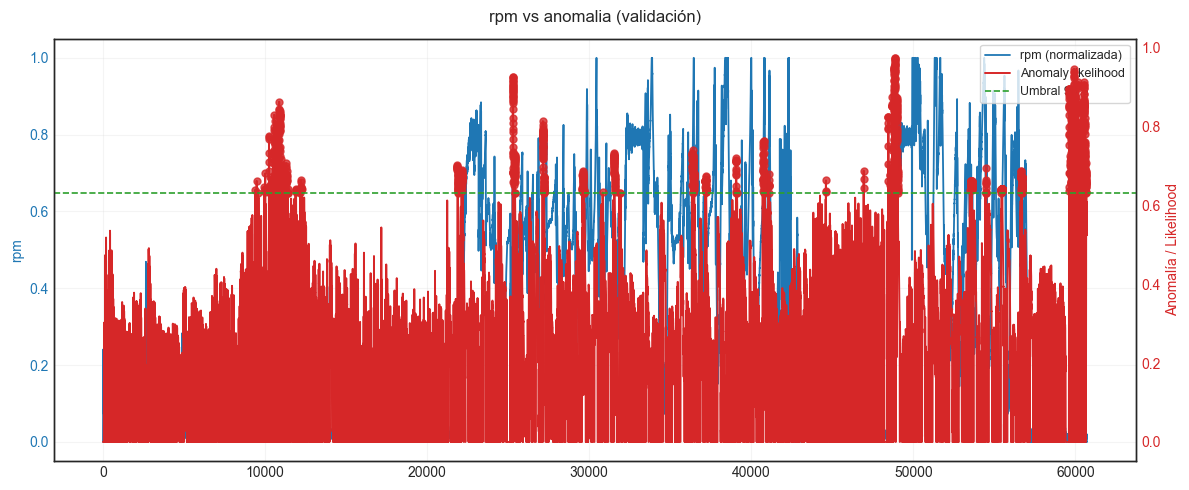

In [123]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='rpm', use_likelihood=True, q_tau=0.98, title='rpm vs anomalia (validación)')

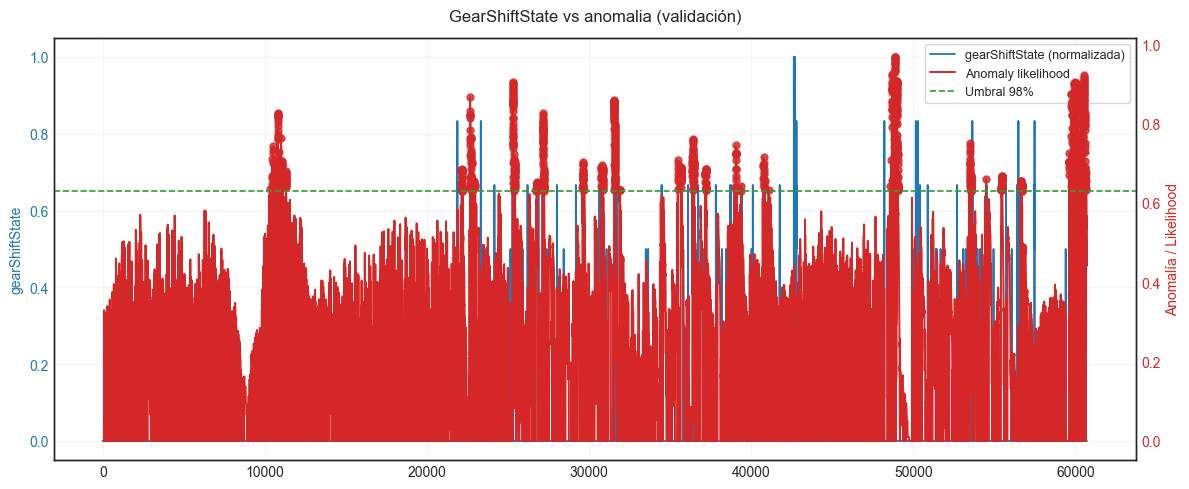

In [106]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='gearShiftState', use_likelihood=True, q_tau=0.98, title='GearShiftState vs anomalia (validación)')


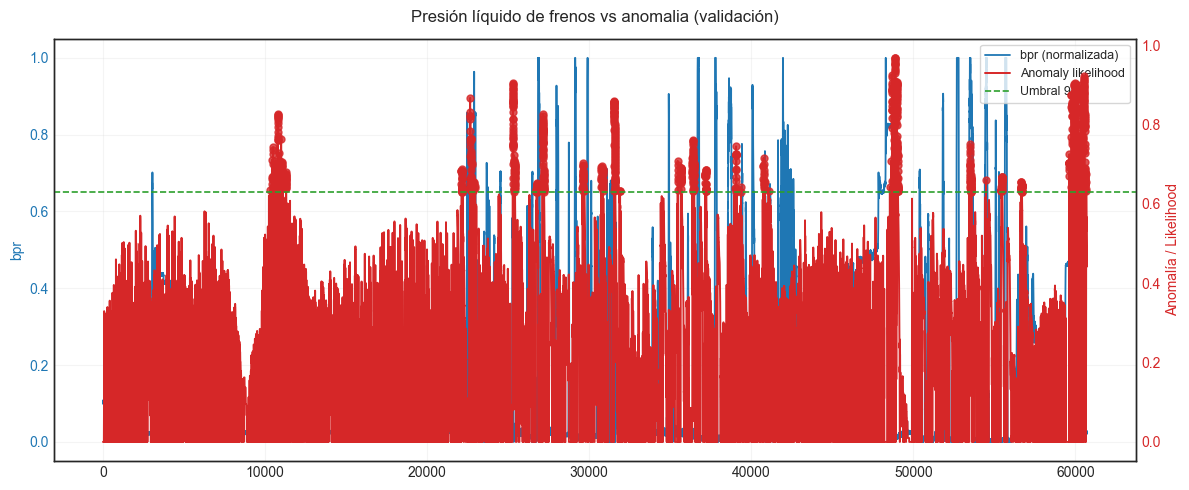

In [107]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='bpr', use_likelihood=True, q_tau=0.98, title='Presión líquido de frenos vs anomalia (validación)')


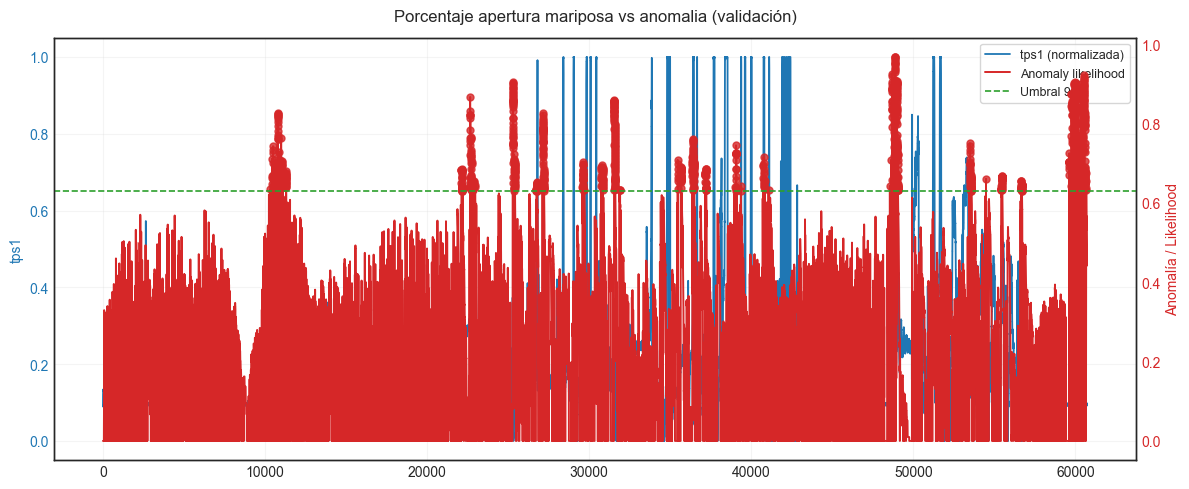

In [108]:
plot_overlay_signal_anomaly(df_tst_pit, anomaly_val, signal_name='tps1', use_likelihood=True, q_tau=0.98, title='Porcentaje apertura mariposa vs anomalia (validación)')


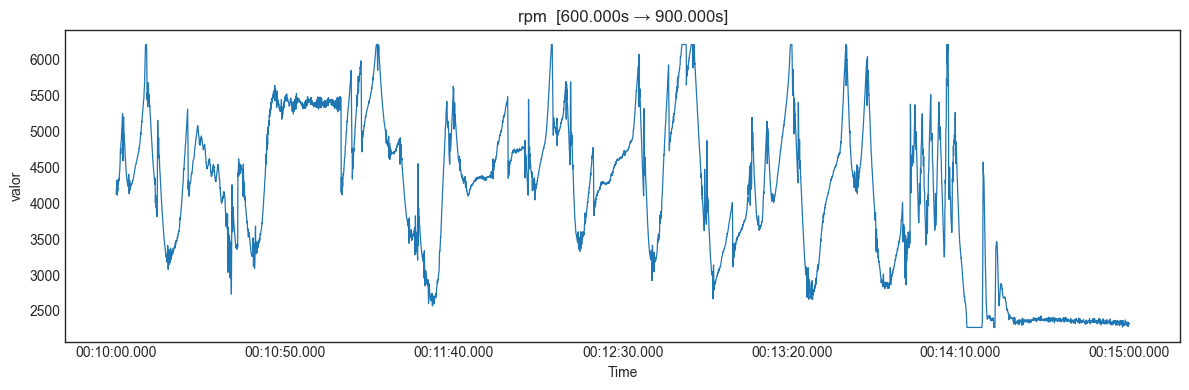

In [109]:
graficar_serie_temporal(df_tst_pit, ['rpm'], 60*10, 60*15)

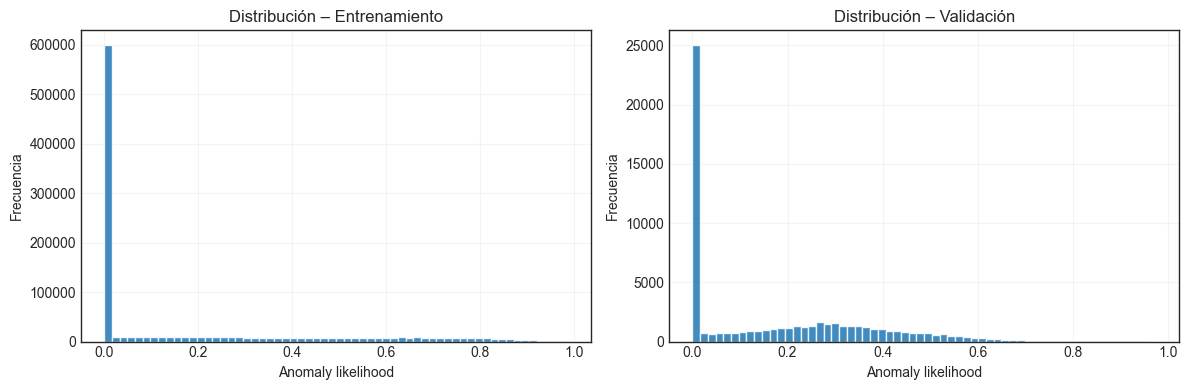

In [108]:
# 3) Histogramas / distribución:
plot_anomaly_distributions(anomaly_train, anomaly_val, use_likelihood=True, bins=60)

### USAD

In [76]:
import os, sys, importlib
from usad.usad import UsadModel, training, testing     # igual que en el repo
from usad.utils import get_default_device, to_device    # igual que en el repo
import torch.utils.data as data_utils
from torch.utils.data import RandomSampler, DataLoader, TensorDataset, Subset
import torch
import torch.nn as nn

sys.path.insert(0, os.path.abspath("."))

print("✅ Imports OK")


✅ Imports OK


In [77]:
device = get_default_device()

In [78]:
window_size = 12

In [79]:
#construimos las ventanas con los valores normalizados minmax de train
windows_tr=df_mm.values[np.arange(window_size)[None, :] + np.arange(df_mm.shape[0]-window_size)[:, None]]
windows_tr.shape

(1036591, 12, 11)

In [80]:
#construimos las ventanas con los valores normalizados minmax de test
windows_tst=df_test_mm.values[np.arange(window_size)[None, :] + np.arange(df_test_mm.shape[0]-window_size)[:, None]]
windows_tst.shape

(60701, 12, 11)

In [81]:
BATCH_SIZE =  7919
N_EPOCHS = 100
hidden_size = 100

w_size=windows_tr.shape[1]*windows_tr.shape[2]
z_size=windows_tr.shape[1]*hidden_size

windows_normal_train = windows_tr[:int(np.floor(.8 *  windows_tr.shape[0]))]
windows_normal_val = windows_tr[int(np.floor(.8 *  windows_tr.shape[0])):int(np.floor(windows_tr.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_tst).float().view(([windows_tst.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [82]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0388, val_loss2: 0.0362
Epoch [1], val_loss1: 0.0357, val_loss2: -0.0026
Epoch [2], val_loss1: 0.0406, val_loss2: -0.0157
Epoch [3], val_loss1: 0.0447, val_loss2: -0.0250
Epoch [4], val_loss1: 0.0574, val_loss2: -0.0393
Epoch [5], val_loss1: 0.0512, val_loss2: -0.0365
Epoch [6], val_loss1: 0.0539, val_loss2: -0.0417
Epoch [7], val_loss1: 0.0788, val_loss2: -0.0647
Epoch [8], val_loss1: 0.0723, val_loss2: -0.0586
Epoch [9], val_loss1: 0.0623, val_loss2: -0.0521
Epoch [10], val_loss1: 0.0592, val_loss2: -0.0502
Epoch [11], val_loss1: 0.0670, val_loss2: -0.0580
Epoch [12], val_loss1: 0.0686, val_loss2: -0.0606
Epoch [13], val_loss1: 0.0678, val_loss2: -0.0607
Epoch [14], val_loss1: 0.0673, val_loss2: -0.0606
Epoch [15], val_loss1: 0.0676, val_loss2: -0.0616
Epoch [16], val_loss1: 0.0680, val_loss2: -0.0627
Epoch [17], val_loss1: 0.0697, val_loss2: -0.0645
Epoch [18], val_loss1: 0.0700, val_loss2: -0.0657
Epoch [19], val_loss1: 0.0723, val_loss2: -0.0682
Epoch [20],

In [87]:
import matplotlib.pyplot as plt

def plot_history(history):
    if isinstance(history, dict):
        train_obj = history.get('train_obj') or history.get('train') or []
        val_rec1  = history.get('val_loss1') or history.get('val_rec1') or []
        val_rec21 = history.get('val_loss2') or history.get('val_rec21') or []

    elif isinstance(history, (list, tuple)) and len(history) > 0:
        first = history[0]
        # lista de tuplas/listas -> (train_obj, val1, val2)
        if isinstance(first, (list, tuple)) and len(first) >= 3:
            train_obj = [h[0] for h in history]
            val_rec1  = [h[1] for h in history]
            val_rec21 = [h[2] for h in history]
        # lista de dicts
        elif isinstance(first, dict):
            train_obj = [h.get('train_obj', h.get('train', None)) for h in history]
            val_rec1  = [h.get('val_loss1', h.get('val_rec1', None)) for h in history]
            val_rec21 = [h.get('val_loss2', h.get('val_rec21', None)) for h in history]
        else:
            raise ValueError("Formato de 'history' no reconocido.")
    else:
        raise ValueError("Formato de 'history' no reconocido.")

    # Comprobaciones básicas
    if not (len(train_obj) == len(val_rec1) == len(val_rec21)):
        raise ValueError("Las series de 'history' tienen longitudes distintas.")

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(val_rec1,  label='Val AE1 Reconstruction', linestyle='--', linewidth=2)
    plt.plot(val_rec21, label='Val AE2 AE1 Reconstruction', linestyle='--', linewidth=2)
    plt.xlabel('Epoch'); plt.ylabel('Loss / MSE')
    plt.title('Evolución del entrenamiento – USAD')
    plt.grid(alpha=0.3); plt.legend(); plt.tight_layout()
    plt.show()


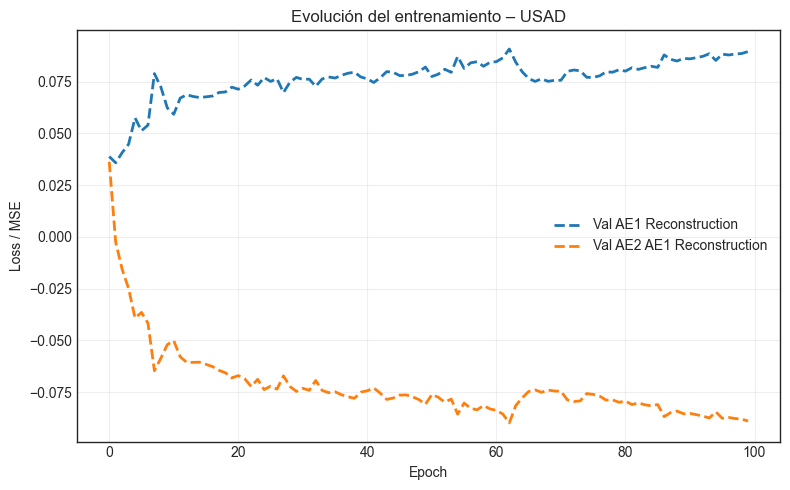

In [88]:
plot_history(history)

In [90]:
results = testing(model, test_loader)

In [91]:
batches = testing(model, test_loader, alpha=0.5, beta=0.5)
scores   = torch.cat([b.detach().cpu() for b in batches]).numpy()

In [92]:
# --- 1) SCORE POR VENTANA -----------------------------------------------
import numpy as np
import torch
import matplotlib.pyplot as plt

def usad_scores_from_loader(model, loader, device='cpu', alpha=0.5, beta=0.5):
    model.eval()
    rec1, rec21 = [], []
    with torch.no_grad():
        for (xb,) in loader:
            xb = xb.to(device)
            z   = model.encoder(xb)
            w1  = model.decoder1(z)           # AE1(x)
            z1  = model.encoder(w1)
            w21 = model.decoder2(z1)          # AE2(AE1(x))

            r1   = torch.mean((xb - w1 )**2, dim=1).cpu().numpy()
            r21  = torch.mean((xb - w21)**2, dim=1).cpu().numpy()
            rec1.append(r1); rec21.append(r21)

    rec1  = np.concatenate(rec1)
    rec21 = np.concatenate(rec21)
    score = alpha*rec1 + beta*rec21
    return rec1, rec21, score

# Nota: si prefieres usar TU testing():
# batches = testing(model, test_loader, alpha=0.5, beta=0.5)
# score   = torch.cat([b.detach().cpu() for b in batches]).numpy()
# (con eso ya tendrías "score" por ventana; si quieres rec1/rec21, usa la función de arriba)


In [ ]:
# --- 2) VENTANA -> TIMELINE ----------------------------------------------
def windows_to_timeline(scores, n_samples, window_size, stride=1, agg='max'):
    scores = np.asarray(scores, dtype=float)
    idx_starts = np.arange(0, n_samples - window_size + 1, stride)

    if agg == 'max':
        tl = np.full(n_samples, -np.inf, dtype=float)
        for s, start in enumerate(idx_starts):
            end = start + window_size
            tl[start:end] = np.maximum(tl[start:end], scores[s])
        tl[~np.isfinite(tl)] = 0.0
        return tl

    tl = np.zeros(n_samples, dtype=float)
    cnt = np.zeros(n_samples, dtype=int)
    for s, start in enumerate(idx_starts):
        end = start + window_size
        tl[start:end] += scores[s]
        cnt[start:end] += 1
    if agg == 'mean':
        cnt[cnt == 0] = 1
        tl = tl / cnt
    return tl


In [94]:
# --- 3) GRÁFICA ----------------------------------------------------------
def plot_usad_results(timeline_score, signal_1d=None, threshold=None, q=0.995,
                      title='USAD – Resultados', timestamps=None):
    x = np.arange(len(timeline_score)) if timestamps is None else np.asarray(timestamps)
    thr = np.quantile(timeline_score[~np.isnan(timeline_score)], q) if threshold is None else float(threshold)
    anom_idx = np.where(timeline_score >= thr)[0]

    plt.figure(figsize=(12,6))
    if signal_1d is not None:
        ax1 = plt.gca()
        ax1.plot(x, signal_1d, label='Señal', linewidth=1.0, alpha=0.85)
        ax1.set_ylabel('Señal')
        ax2 = ax1.twinx()
        ax2.plot(x, timeline_score, '--', linewidth=1.2, label='Anomaly score')
        ax2.axhline(thr, linestyle=':', linewidth=1.2, label=f'Umbral = {thr:.4f}')
        if anom_idx.size:
            ax2.scatter(x[anom_idx], timeline_score[anom_idx], s=18, label='Outliers')
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        plt.legend(lines1+lines2, labels1+labels2, loc='upper right')
    else:
        plt.plot(x, timeline_score, '--', linewidth=1.4, label='Anomaly score')
        plt.axhline(thr, linestyle=':', linewidth=1.2, label=f'Umbral = {thr:.4f}')
        if anom_idx.size:
            plt.scatter(x[anom_idx], timeline_score[anom_idx], s=18, label='Outliers')
        plt.legend()
        plt.ylabel('Anomaly score')

    plt.xlabel('Tiempo'); plt.title(title); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


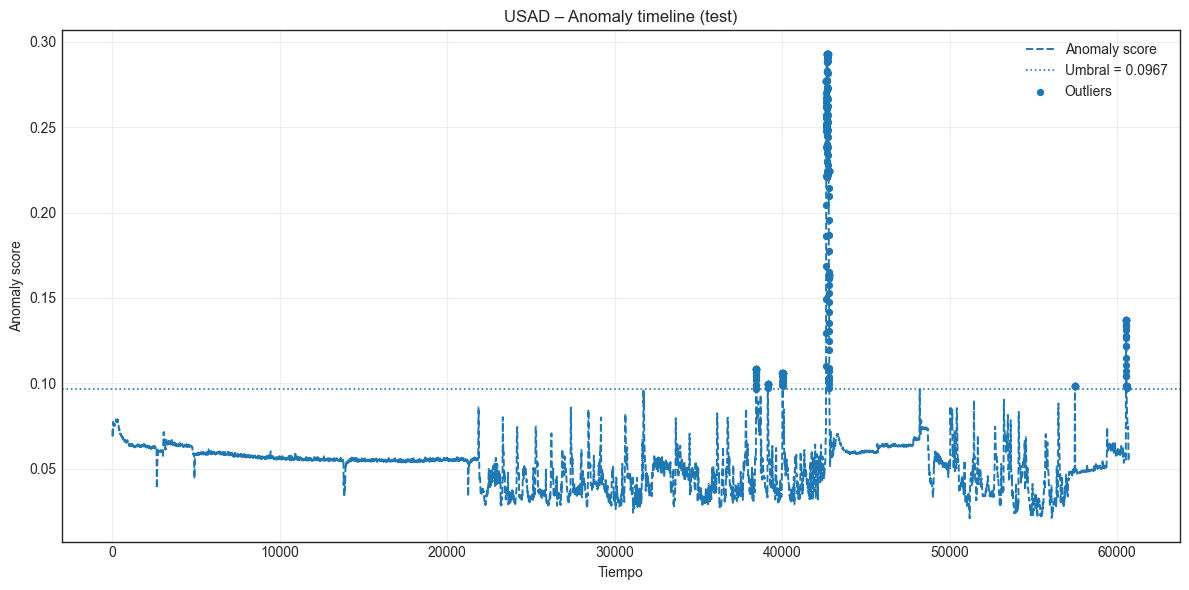

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

rec1, rec21, score_win = usad_scores_from_loader(model, test_loader, device=device, alpha=0.5, beta=0.5)

batches = testing(model, test_loader, alpha=0.5, beta=0.5)
score_win = torch.cat([b.detach().cpu() for b in batches]).numpy()

window_size = windows_tr.shape[1]     
stride      = 1                       
N_win       = len(score_win)
n_samples   = (N_win - 1)*stride + window_size
score_tl    = windows_to_timeline(score_win, n_samples, window_size, stride=stride, agg='max')


#signal = df_test_mm['1'].to_numpy()  # ejemplo
signal = None

plot_usad_results(score_tl, signal_1d=signal, q=0.995, title='USAD – Anomaly timeline (test)')


In [96]:
from scipy.signal import find_peaks

anomaly_score = np.array(scores)  

max_idx = np.argmax(anomaly_score)
max_val = anomaly_score[max_idx]

print(f"Índice del máximo anomaly score: {max_idx}")
print(f"Valor máximo: {max_val:.4f}")


Índice del máximo anomaly score: 42695
Valor máximo: 0.2931


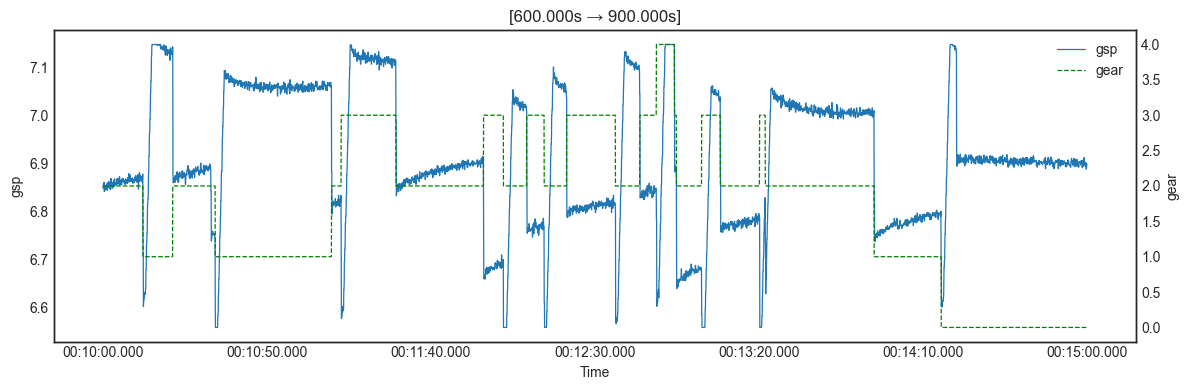

In [105]:
graficar_serie_temporal_dos_ejes(df_tst_pit, ['gsp'], ['gear'], 60*10, 60*15)

### CAD

In [183]:
import networkx as nx
from scipy.stats import pearsonr
from collections import defaultdict
from community import community_louvain

In [184]:
def sliding_windows(T: np.ndarray, w: int, s: int):
    """
    T: matriz (n_sensores x T_len)
    w: tamaño de ventana
    s: step (s < w)
    Devuelve lista de submatrices [T1,...,TR], todas (n x w)
    """
    n, L = T.shape
    assert 1 <= w <= L and 1 <= s < w
    R = (L - w) // s + 1
    windows = [T[:, i*s : i*s + w] for i in range(R)]
    return windows


In [201]:
def _pearson_safe(a, b):
    # Si alguna varianza es ~0 en la ventana, devolver 0.0
    if np.allclose(np.std(a), 0) or np.allclose(np.std(b), 0):
        return 0.0
    r, _ = pearsonr(a, b)
    return 0.0 if np.isnan(r) else r

def build_tsg(window: np.ndarray, k: int, tau: float):
    n, w = window.shape
    corr = np.eye(n)
    for i in range(n):
        for j in range(i+1, n):
            r = _pearson_safe(window[i], window[j])
            corr[i, j] = corr[j, i] = r

    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        # ordenar por |corr| (excluye i)
        order = np.argsort(-np.abs(corr[i]))
        order = order[order != i][:k]
        for j in order:
            w_ij = corr[i, j]
            if np.abs(w_ij) >= tau:
                if G.has_edge(i, j):
                    if abs(G[i][j]['weight']) < abs(w_ij):
                        G[i][j]['weight'] = w_ij
                else:
                    G.add_edge(i, j, weight=abs(w_ij))
    return G, corr



In [186]:
def louvain_partition(G: nx.Graph):
    """
    Devuelve dict {v: comunidad_id}. Louvain usa pesos si existen.
    """
    if G.number_of_edges() == 0:
        # sin aristas: cada nodo es su propia comunidad
        return {v: v for v in G.nodes()}
    part = community_louvain.best_partition(G, weight='weight', random_state=0)
    return part


In [187]:
def coappearance_counts(part_prev: dict, part_curr: dict):
    """
    Calcula S_r(v) para todos v:
    S_r(v) = |{u != v: u en comunidad_de_v en r-1 y también en r}| = 
             tamaño_intersección(com_prev(v), com_curr(v)) - 1
    Devuelve dict {v: S_r(v)}.
    """
    # Invertir particiones a conjuntos por comunidad
    from collections import defaultdict
    comm_prev = defaultdict(set)
    comm_curr = defaultdict(set)
    for v, c in part_prev.items():
        comm_prev[c].add(v)
    for v, c in part_curr.items():
        comm_curr[c].add(v)

    S = {}
    for v in part_curr.keys():
        c_prev = part_prev[v]
        c_curr = part_curr[v]
        inter = comm_prev[c_prev].intersection(comm_curr[c_curr])
        # excluye a v
        S[v] = max(len(inter) - 1, 0)
    return S

class RCAggregator:
    """
    Mantiene sumas acumuladas de S_i(v) para calcular RC_{v,r}.
    RC_{v,r} = (sum_{i<=r} S_i(v)) / (r*(n-1))
    """
    def __init__(self, n):
        self.n = n
        self.cum = np.zeros(n, dtype=float)
        self.r = 0

    def update(self, S_dict):
        self.r += 1
        for v, val in S_dict.items():
            self.cum[v] += val

    def rc(self):
        if self.r == 0: 
            return np.zeros(self.n)
        return self.cum / (self.r * (self.n - 1) + 1e-12)


In [188]:
def outlier_set(rc_vec: np.ndarray, theta: float):
    """
    Or = {v: RC_{v,r} < theta}
    """
    return set(np.where(rc_vec < theta)[0])

def variation_count(O_prev: set, O_curr: set):
    """
    n_r = |(O_{r-1} Δ O_r)|  (cambio de estado)
    """
    return len(O_prev.symmetric_difference(O_curr))


In [189]:
def outlier_detection_round(window_prev, window_curr, k, tau, theta, 
                            part_prev, rc_agg, O_prev):
    """
    Ejecuta Fases 1-3 para la ronda actual:
    - Construye TSG(G_r) y comunidades (part_curr)
    - S_r(v), actualiza RC, calcula O_r
    - n_r respecto a O_prev
    Devuelve: part_curr, O_curr, n_r, G_r (opcional)
    """
    G_curr, _ = build_tsg(window_curr, k, tau)
    part_curr = louvain_partition(G_curr)

    # si es primera ronda, definimos S_r(v) con part_prev=part_curr (no cuenta transición)
    if part_prev is None:
        part_prev = part_curr

    S_r = coappearance_counts(part_prev, part_curr)
    rc_agg.update(S_r)
    RC = rc_agg.rc()
    O_curr = outlier_set(RC, theta)

    if O_prev is None:
        n_r = 0
    else:
        n_r = variation_count(O_prev, O_curr)

    return part_curr, O_curr, n_r, G_curr


In [190]:
def warmup(T_his: np.ndarray, w: int, s: int, k: int, tau: float, theta: float):
    windows = sliding_windows(T_his, w, s)
    n = T_his.shape[0]
    rc_agg = RCAggregator(n)

    part_prev = None
    O_prev = None
    ns = []

    for r in range(len(windows)):
        # Definir window_prev solo para coherencia; Alg. usa r-1 y r
        window_curr = windows[r]
        part_prev, O_prev, n_r, _ = outlier_detection_round(
            window_prev=None, window_curr=window_curr, k=k, tau=tau, theta=theta,
            part_prev=part_prev, rc_agg=rc_agg, O_prev=O_prev
        )
        ns.append(n_r)

    mu = float(np.mean(ns)) if len(ns) else 0.0
    sigma = float(np.std(ns, ddof=0)) if len(ns) else 0.0
    return mu, sigma


In [191]:
def CAD(T: np.ndarray, T_his: np.ndarray, w: int, s: int, 
        k: int, tau: float, theta: float, eta: float = 3.0):
    """
    Devuelve lista de anomalías Z = [{'VZ': set(), 'RZ': list()}].
    Las rondas se indexan desde 1 (como en el paper).
    """
    # 1) Warm-up
    mu, sigma = warmup(T_his, w, s, k, tau, theta)

    # 2) Preparación
    windows = sliding_windows(T, w, s)
    n = T.shape[0]
    rc_agg = RCAggregator(n)

    anomalies = []
    VZ = set()
    RZ = []

    part_prev = None
    O_prev = None

    for idx, window in enumerate(windows, start=1):
        part_prev, O_curr, n_r, _ = outlier_detection_round(
            window_prev=None, window_curr=window, k=k, tau=tau, theta=theta,
            part_prev=part_prev, rc_agg=rc_agg, O_prev=O_prev
        )

        # Criterio de anormalidad por Chebyshev: |n_r - mu| >= eta*sigma
        abnormal = (sigma > 0 and abs(n_r - mu) >= eta * sigma)

        if abnormal:
            VZ |= O_curr
            RZ.append(idx)
        else:
            # Si estábamos dentro de un bloque anómalo, lo cerramos
            if len(RZ) > 0:
                anomalies.append({'VZ': set(VZ), 'RZ': list(RZ)})
                VZ.clear()
                RZ.clear()

        # actualizar para siguiente ronda
        O_prev = O_curr

        # actualizar estadísticos online de n_r (como hace el paper con N)
        # aquí usamos media/desv típica “corriente” para robustecer con más rondas
        # (efecto equivalente a "Update μ and σ from N")
        # Nota: si prefieres fijar mu/sigma solo del histórico, comenta estas líneas.
        # incremental update
        if idx == 1:
            mu_online = n_r
            var_online = 0.0
        else:
            delta = n_r - mu
            mu += delta / idx
            var_online = ((idx - 2) / (idx - 1)) * var_online + (delta ** 2) / idx
            sigma = float(np.sqrt(var_online))

    # si terminamos dentro de un bloque anómalo, cerrarlo
    if len(RZ) > 0:
        anomalies.append({'VZ': set(VZ), 'RZ': list(RZ)})

    return anomalies, mu, sigma


In [192]:
df_tr_pit.head()

Time       bpr   eop1        eot  gear  gearShiftDecision  gearShiftState  \
0  0.02  2.453068  2.736  98.176953     0                  0               0   
1  0.04  2.523068  2.736  98.176953     0                  0               0   
2  0.06  2.503068  2.736  98.176953     0                  0               0   
3  0.08  2.423068  2.736  98.176953     0                  0               0   
4  0.10  2.443068  2.736  98.176953     0                  0               0   

        gsp  gspControl  lapCount  pitLimitActive          rpm       tps1  \
0  6.918976           0       0.0               0  4591.285845  46.048581   
1  6.918976           0       0.0               0  4715.285845  46.048581   
2  6.918976           0       0.0               0  4838.285845  46.248581   
3  6.918976           0       0.0               0  4944.285845  46.248581   
4  6.918976           0       0.0               0  4985.285845  46.048581   

   session_id  
0           1  
1           1  
2           1  
3           1  
4           1

In [194]:
df_tr_CAD = df_tr_pit.drop(['Time', 'lapCount', 'session_id'], axis=1)
df_tst_CAD = df_tst_pit.drop(['Time', 'lapCount', 'session_id'], axis=1)


Necesitamos pasar de serie temporal a la matriz que vamos a introducir al algoritmo

In [198]:
# Convertir a matriz (n_sensores x T) en float
T_his = df_tr_CAD.to_numpy(dtype=float).T   # filas = sensores, columnas = tiempo
T_run = df_tst_CAD.to_numpy(dtype=float).T
n_tr, L_tr = T_his.shape
n_tst, L_tst = T_run.shape
print(T_his.shape, T_run.shape)  

(11, 1036603) (11, 60713)


In [202]:
# Parámetros de arranque (ajústalos a tu muestreo):
w    = 256    # ventana en muestras
s    = 32     # paso en muestras
k    = 5      # k vecinos
tau  = 0.3    # poda por |corr|
theta= 0.25   # umbral RC
eta  = 3.0    # k-sigma para anormalidad

anoms, mu, sigma = CAD(T_run, T_his, w, s, k, tau, theta, eta=eta)
print("Anomalías:", anoms)
print("mu, sigma:", mu, sigma)


Anomalías: [{'VZ': {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)}, 'RZ': [14]}]
mu, sigma: 0.002645502645502644 0.06081662588033597


In [ ]:
def rounds_to_time_ranges(anoms, df_index, w, s, offset_cols=0):
    """
    df_index: índice temporal del tramo analizado (el de T_run).
    offset_cols: nº de columnas que “saltaste” por usar histórico al inicio.
    Devuelve lista con (inicio, fin, sensores) por anomalía.
    """
    out = []
    for Z in anoms:
        RZ = Z['RZ']               # rondas 1-based
        if not RZ: 
            continue
        r_start, r_end = RZ[0], RZ[-1]
        c_start = offset_cols + (r_start-1)*s
        c_end   = offset_cols + (r_end-1)*s + (w-1)
        t0 = df_index[c_start]
        t1 = df_index[min(c_end, len(df_index)-1)]
        out.append((t0, t1, sorted(Z['VZ'])))
    return out



[416 → 671]  sensores anómalos idx=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


In [206]:
sensor_names = np.array(df_tst_CAD.columns)

ranges = rounds_to_time_ranges(anoms, df_tst_CAD.index, w, s, offset_cols=0)
for (t0, t1, vz) in ranges:
    print(f"[{t0} → {t1}]  sensores = {list(sensor_names[vz])}")


[416 → 671]  sensores = ['bpr', 'eop1', 'eot', 'gear', 'gearShiftDecision', 'gearShiftState', 'gsp', 'gspControl', 'pitLimitActive', 'rpm', 'tps1']


In [207]:
Z = anoms[0]  
print("Rondas:", Z['RZ'])
print("Sensores:", list(sensor_names[sorted(Z['VZ'])]))


Rondas: [14]
Sensores: ['bpr', 'eop1', 'eot', 'gear', 'gearShiftDecision', 'gearShiftState', 'gsp', 'gspControl', 'pitLimitActive', 'rpm', 'tps1']


In [208]:
def plot_anomaly_window(df, r, w, s, sensors=None, normalize='z'):
    """
    df: DataFrame del test (index temporal), columnas = sensores
    r : ronda (1-based)
    w,s: ventana y paso
    sensors: lista de columnas a mostrar (por defecto, todas)
    normalize: 'z' para z-score por serie en la ventana; None para valores crudos
    """
    start = (r-1)*s
    end   = start + (w-1)
    seg = df.iloc[start:end+1]
    if sensors is None:
        sensors = list(df.columns)

    fig, axes = plt.subplots(len(sensors), 1, figsize=(12, 1.8*len(sensors)), sharex=True)
    if len(sensors) == 1: axes = [axes]

    for ax, col in zip(axes, sensors):
        y = seg[col].astype(float).to_numpy()
        if normalize == 'z':
            y = (y - np.nanmean(y)) / (np.nanstd(y) + 1e-9)
        ax.plot(seg.index, y, lw=1.2)
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.25)

    axes[0].set_title(f"Ronda {r}  |  filas [{start}–{end}]  |  {seg.index[0]} → {seg.index[-1]}")
    axes[-1].set_xlabel("Tiempo")
    plt.tight_layout()


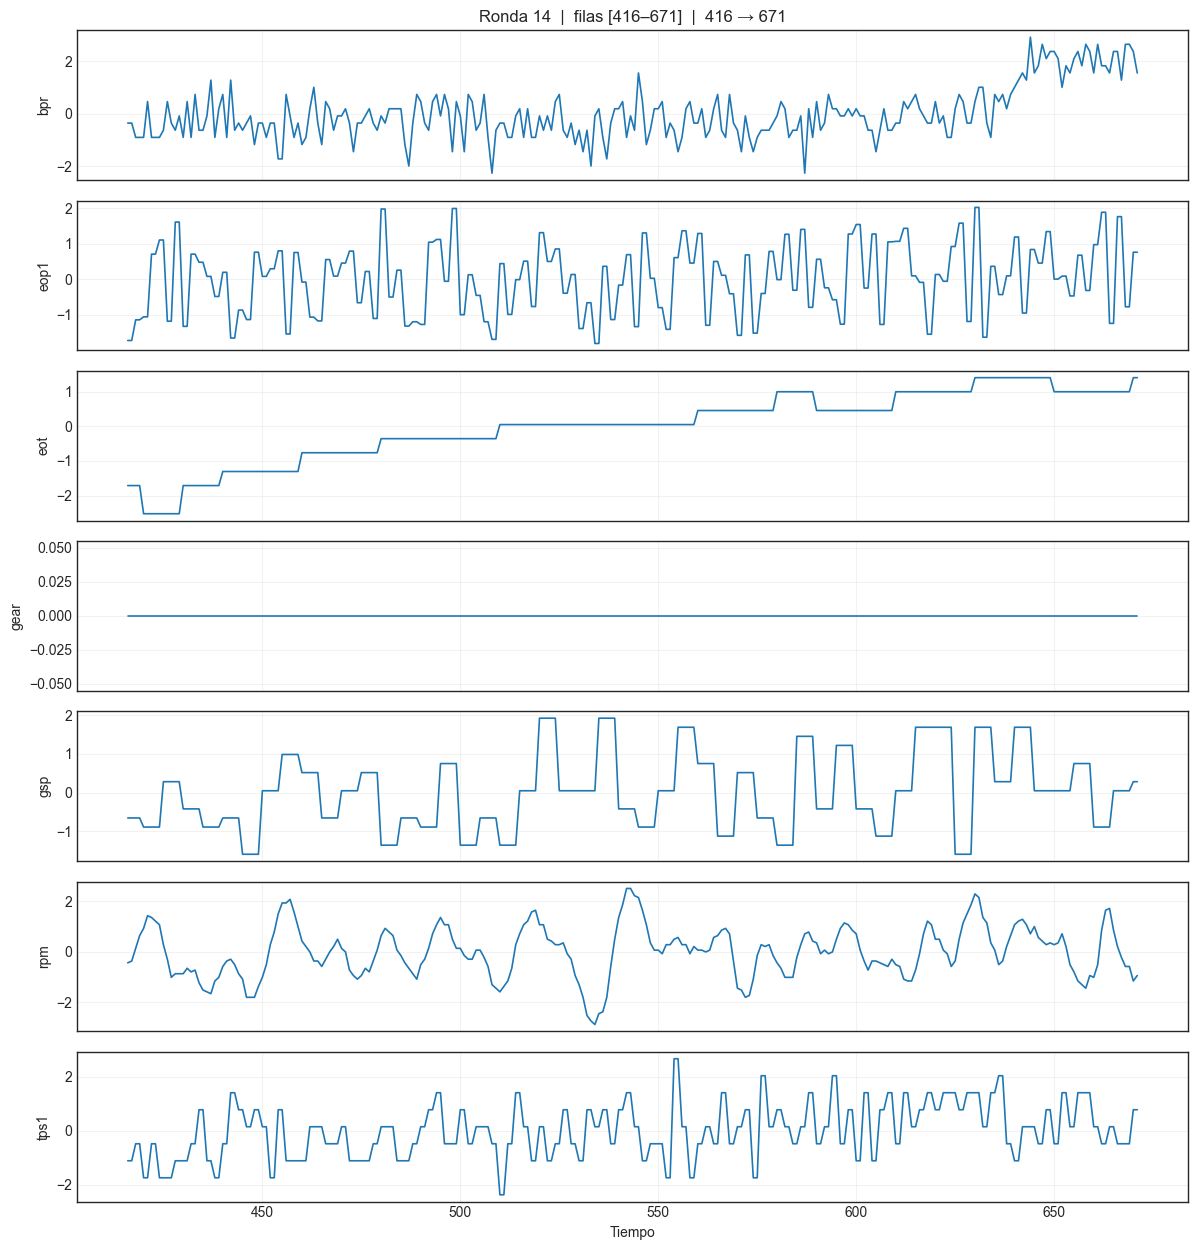

In [212]:
Z = anoms[0]
r = Z['RZ'][0]

candidatos = ['bpr','eop1','eot','gear','gsp','rpm','tps1']
sensors = [c for c in candidatos if c in df_tst_CAD.columns]

plot_anomaly_window(df_tst_CAD, r, w, s, sensors=sensors, normalize='z')

In [216]:
# Partiendo del DF original con la columna Time:
df_tst_CAD.index = pd.to_timedelta(df_tst_pit['Time'], unit='s')                    

# Ahora calcula el intervalo de la ronda r (p.ej., r=14):
r = anoms[0]['RZ'][0]
start = (r-1)*s
end   = start + (w-1)
t0, t1 = df_tst_CAD.index[start], df_tst_CAD.index[end]
print(t0, '→', t1, 'duración:', t1 - t0)


0 days 00:00:08.340000 → 0 days 00:00:13.440000 duración: 0 days 00:00:05.100000


In [ ]:
def plot_anomaly_context(df, r, w, s, sensors, pre_rounds=3, post_rounds=3, normalize='z'):
    start_anom = (r-1)*s
    end_anom   = start_anom + (w-1)

    start = max(0, start_anom - pre_rounds*s)
    end   = min(len(df)-1, end_anom + post_rounds*s)
    seg = df.iloc[start:end+1].copy()

    # posiciones relativas dentro de 'seg'
    start_rel = start_anom - start
    end_rel   = end_anom   - start

    fig, axes = plt.subplots(len(sensors), 1, figsize=(12, 1.8*len(sensors)), sharex=True)
    if len(sensors) == 1: axes = [axes]

    for ax, col in zip(axes, sensors):
        y = seg[col].astype(float).to_numpy()
        if normalize == 'z':
            y = (y - np.nanmean(y)) / (np.nanstd(y) + 1e-9)
        x = seg.index.total_seconds().to_numpy()
        ax.plot(x, y, lw=1.0)
        ax.axvspan(x[start_rel], x[end_rel], alpha=0.15)
        ax.set_xlabel("Tiempo")
        ax.grid(True, alpha=0.25)

    axes[0].set_title(f"Contexto ronda {r} | {seg.index[0]} → {seg.index[-1]}")
    axes[-1].set_xlabel("Tiempo")
    plt.tight_layout()


In [ ]:
start_idx = 30000
end_idx   = 45000

# 1) Recorte por índices
df_focus = df_tst_CAD.iloc[start_idx:end_idx+1]

# Verificación mínima
assert len(df_focus) >= w, f"El tramo necesita al menos w={w} muestras"

# 2) A matriz y CAD solo en ese tramo (reutiliza T_tr para warm-up)
T_focus = df_focus.to_numpy(dtype=float).T
anoms_focus, _, _ = CAD(T_focus, T_his, w, s, k, tau, theta, eta=3.0)

# 3) Mapeo a tiempos reales del propio tramo
ranges_focus = rounds_to_time_ranges(anoms_focus, df_focus.index, w, s, offset_cols=0)
sensor_names = np.array(df_focus.columns)

print(f"Tramo analizado: idx [{start_idx} → {end_idx}]  |  tiempo {df_focus.index[0]} → {df_focus.index[-1]}")
for (t0, t1, vz) in ranges_focus:
    print(f"[{t0} → {t1}]  sensores = {list(sensor_names[vz])}")


Tramo analizado: idx [30000 → 45000]  |  tiempo 0 days 00:10:00.020000 → 0 days 00:15:00.020000


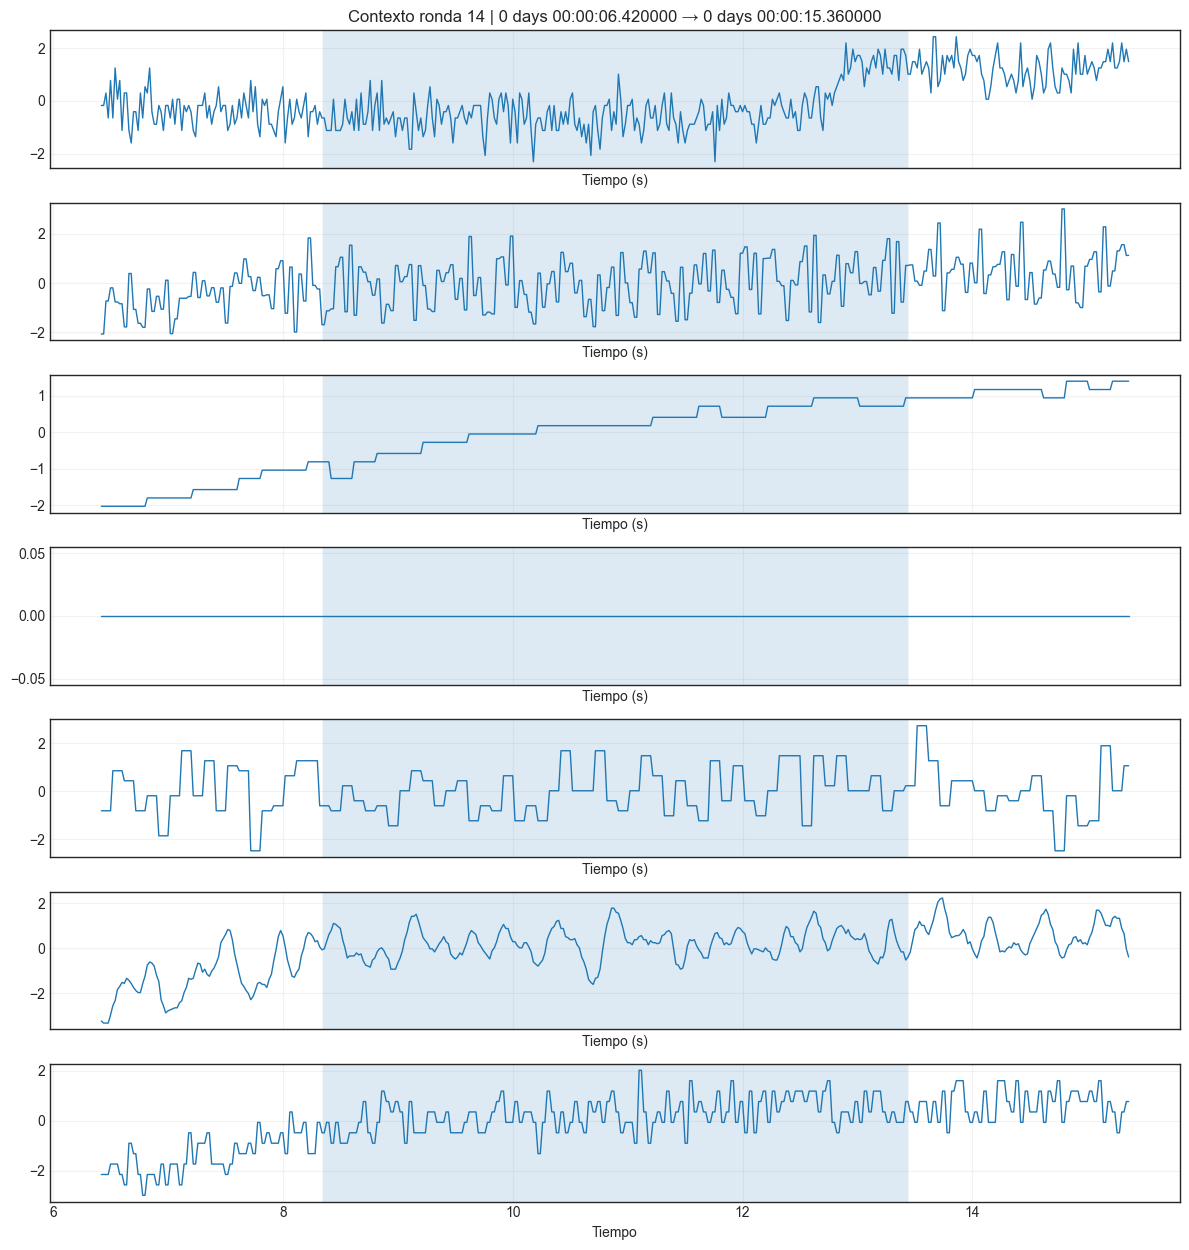

In [223]:
plot_anomaly_context(df_tst_CAD, r, w, s, sensors=sensors, pre_rounds=3, post_rounds=3, normalize='z')
